# Header

In [1]:
from utils import *
from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA
import pickle as pkl
from glob import glob
import forestplot as fp
from statannotations.Annotator import Annotator

def join_with_linebreaks(words):
    modified_words = [word if i%3 != 0 and (i<len(words)-1) else word + '\n' for i, word in enumerate(words)]
    
#     modified_words = [word if i==0 else word.capitalize() for i,word in enumerate(modified_words)]
    
    return ' '.join(modified_words)

In [2]:
sns.set(style='white', font_scale=1)
plt.rcParams['figure.dpi'] = 300  # set default dpi to 300

# Vectra

## Distribution

In [11]:
dat1 = pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='vectra_v1')
dat2 = pd.read_csv('../data/raw/Meta_BulkRNAseqCohort_updated.csv')#pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='patient', index_col=0)

dat = pd.merge(dat2,dat1, left_on='Sample ID', right_on='Slide ID')
dat

Patient ID   Sample ID Tumor type  Age at diagnosis   Race  Postmenopausal  \
0   TP17_M510  PBC_PR_758        ILC                44  White               0   
1   TP17_M510  PBC_PR_758        ILC                44  White               0   
2   TP17_M510  PBC_PR_758        ILC                44  White               0   
3   TP17_M510  PBC_PR_758        ILC                44  White               0   
4   TP17_M510  PBC_PR_758        ILC                44  White               0   
..        ...         ...        ...               ...    ...             ...   
92  TP18_M403  PBC_PR_771        ILC                67  White               1   
93  TP18_M403  PBC_PR_771        ILC                67  White               1   
94  TP18_M403  PBC_PR_771        ILC                67  White               1   
95  TP18_M403  PBC_PR_771        ILC                67  White               1   
96  TP18_M403  PBC_PR_771        ILC                67  White               1   

    Pathological grade Pathological stage  Ki67  ER   ...  \
0                    2                 1A    15    1  ...   
1                    2                 1A    15    1  ...   
2                    2                 1A    15    1  ...   
3                    2                 1A    15    1  ...   
4                    2                 1A    15    1  ...   
..                 ...                ...   ...  ...  ...   
92                   1                 1A     1    1  ...   
93                   1                 1A     1    1  ...   
94                   1                 1A     1    1  ...   
95                   1                 1A     1    1  ...   
96                   1                 1A     1    1  ...   

    Stromal CD4 T cells Stromal CD8 T cells  Stromal Treg cells  \
0           1445.530589          127.946168            7.311210   
1           1454.560435          387.288711           10.282001   
2            561.699570          234.587357            0.000000   
3           1034.642032          307.693544           12.595642   
4            644.698879          140.963099           18.656881   
..                  ...                 ...                 ...   
92           225.867078           91.229699            8.828681   
93           370.547126          500.730778            2.540169   
94           459.051417          296.760512            5.667301   
95            73.963500           14.917008            0.000000   
96             0.000000           19.569550            0.000000   

   Stromal Macrophages Tumor B cells  Tumor CD4 T cells  Tumor CD8 T cells  \
0           428.227992     44.145958          30.902171           3.433575   
1          1104.286928      2.099531           9.237934           2.099531   
2           725.050975      6.438246          17.475240           4.138873   
3           714.352847      0.000000          50.910054          10.717906   
4           842.669113      4.273107          76.559841          12.819322   
..                 ...           ...                ...                ...   
92          447.319815      0.000000          45.406179          19.586979   
93         2684.640917      0.000000           0.000000           0.000000   
94          509.541921      0.000000           0.000000           0.000000   
95          415.190065      0.000000           0.000000           0.000000   
96           77.127052      0.000000          35.652580           0.000000   

    Tumor Treg cells  Tumor Macrophages  Tumor PanCK cells  
0           0.000000          98.592640        4514.169488  
1           0.839812         122.192678        3987.008507  
2           0.000000          58.404092        4351.334822  
3           2.679477         219.717073        5133.341081  
4           0.000000         399.535542        3477.241151  
..               ...                ...                ...  
92          2.225793         162.037738        4375.464097  
93          0.000000        2544.051463        2228.080271  
94    

TP18_M121    13
TP18_M251    13
TP18_M403     9
TP17_M510     8
TP18_M302     8
TP17_M802     7
TP18_M95      7
TP17_M882     6
TP18_M278     6
TP18_M329     6
TP18_M355     6
TP18_M372     5
TP18_M202     3
Name: Patient ID, dtype: int64


Text(0, 0.5, 'Number of ROIs')

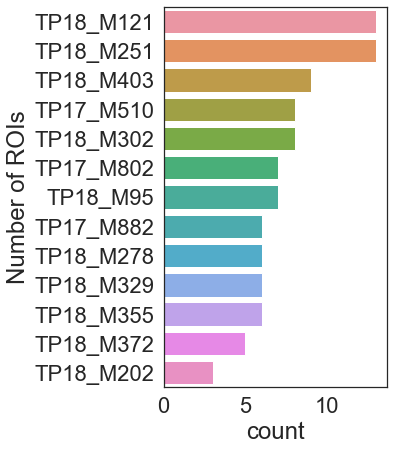

In [12]:
sns.set(style='white', font_scale=2)

df_p = dat.copy()
print(df_p['Patient ID'].value_counts())

fig, ax = plt.subplots(figsize=(4,7))
g = sns.countplot(data=df_p, y='Patient ID', 
                  order=df_p['Patient ID'].value_counts().index, ax=ax)
# ax.set_xticks(ax.get_xticks())
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.set_ylabel('Number of ROIs')

In [13]:
meta = pd.read_csv('../data/classifier/2_class_pam50.csv', index_col=0)
meta['ILC Subtype'] = meta['class_2c']

In [25]:
dat3 = meta[["PAM50","ILC Subtype"]]
dat3['Patient ID'] = dat3.index


mg = pd.merge(dat, dat3, on='Patient ID').set_index('Sample ID')
mg = mg.fillna('NA')

mg['Pathological stage'] = [str(x).strip() for x in mg['Pathological stage']]
mg['Age at Diagnosis'] = mg['Age at diagnosis']
mg['Pathological Grade'] =  mg['Pathological grade']
mg['Pathological Stage'] =  mg['Pathological stage']
mg['ER IHC Score'] =  mg['ER IHC score']

mg['ER'] = mg['ER '].map({0:'Negative',1:'Positive'})
mg = mg.drop('ER ', axis=1)
mg['PR'] = mg['PR'].map({0:'Negative',1:'Positive'})
mg['HER2'] = mg['HER2'].map({'0':'Negative',1:'Positive'})

mg['Postmenopausal'] = mg['Postmenopausal'].map({0:'No',1:'Yes'})

mg['Sample ID'] = mg.index
mg = mg.reset_index(drop=True)

mg

Patient ID Tumor type  Age at diagnosis   Race Postmenopausal  \
0   TP17_M510        ILC                44  White             No   
1   TP17_M510        ILC                44  White             No   
2   TP17_M510        ILC                44  White             No   
3   TP17_M510        ILC                44  White             No   
4   TP17_M510        ILC                44  White             No   
..        ...        ...               ...    ...            ...   
92  TP18_M403        ILC                67  White            Yes   
93  TP18_M403        ILC                67  White            Yes   
94  TP18_M403        ILC                67  White            Yes   
95  TP18_M403        ILC                67  White            Yes   
96  TP18_M403        ILC                67  White            Yes   

    Pathological grade Pathological stage  Ki67        PR      HER2  ...  \
0                    2                 1A    15  Positive  Negative  ...   
1                    2                 1A    15  Positive  Negative  ...   
2                    2                 1A    15  Positive  Negative  ...   
3                    2                 1A    15  Positive  Negative  ...   
4                    2                 1A    15  Positive  Negative  ...   
..                 ...                ...   ...       ...       ...  ...   
92                   1                 1A     1  Negative  Negative  ...   
93                   1                 1A     1  Negative  Negative  ...   
94                   1                 1A     1  Negative  Negative  ...   
95                   1                 1A     1  Negative  Negative  ...   
96                   1                 1A     1  Negative  Negative  ...   

    Tumor Macrophages Tumor PanCK cells   PAM50        ILC Subtype  \
0           98.592640       4514.169488    LumB      Proliferative   
1          122.192678       3987.008507    LumB      Proliferative   
2           58.404092       4351.334822    LumB      Proliferative   
3          219.717073       5133.341081    LumB      Proliferative   
4          399.535542       3477.241151    LumB      Proliferative   
..                ...               ...     ...                ...   
92         162.037738       4375.464097  Normal  Non-proliferative   
93        2544.051463       2228.080271  Normal  Non-proliferative   
94         325.718517       6989.667749  Normal  Non-proliferative   
95           0.000000       9690.349293  Normal  Non-proliferative   
96           0.000000       9804.459574  Normal  Non-proliferative   

    Age at Diagnosis  Pathological Grade  Pathological Stage  ER IHC Score  \
0                 44                   2                  1A         240.0   
1                 44                   2                  1A         240.0   
2                 44                   2                  1A         240.0   
3                 44                   2                  1A         240.0   
4                 44                   2                  1A         240.0   
..               ...                 ...                 ...           ...   
92                67                   1                  1A         140.0   
93                67                   1                  1A         140.0   
94                67                   1                  1A         140.0   
95                67                   1                  1A         140.0   
96                67                   1                  1A         140.0   

          ER   Sample ID  
0   Positive  PBC_PR_758  
1   Positive  PBC_PR_758  
2   Positive  PBC_PR_758  
3   Positive  PBC_PR_758  
4   Positive  PBC_PR_758  
..       ...         ...  
92  Positive  PBC_PR_771  
93  Positive  PBC_PR_771  
94  Positive  PBC_PR_771  
95  Positive  PBC_PR_771  
96  Positive  PBC_PR_771  

[97 rows x 32 columns]

In [26]:
mg.to_csv('../data/heatmap/heatmap_vectra.csv')

In [8]:
# Then run 06_Vectra_Heatmap.R
os.system('Rscript 06_Vectra_Heatmap.R')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘matrixStats’

The following object is masked from ‘package:dplyr’:

    count

ComplexHeatmap version 2.15.3
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))

circl

256

In [155]:
sel_cols = [
'Stromal B cells','Stromal CD4 T cells','Stromal CD8 T cells','Stromal Treg cells','Stromal Macrophages',
'Tumor B cells','Tumor CD4 T cells','Tumor CD8 T cells','Tumor Treg cells','Tumor Macrophages',
]

dfp = dat[sel_cols]

dfp

Stromal B cells  Stromal CD4 T cells  Stromal CD8 T cells  \
0       2986.629132          1445.530589           127.946168   
1       1152.269600          1454.560435           387.288711   
2        447.067004           561.699570           234.587357   
3        346.380159          1034.642032           307.693544   
4        136.298879           644.698879           140.963099   
..              ...                  ...                  ...   
92         2.836019          1513.488907          1606.604871   
93         0.000000           296.088415           625.615974   
94         0.000000          1263.241173          1732.243026   
95         0.000000           173.931845           297.547691   
96        10.592093          1127.528270          1075.627016   

    Stromal Treg cells  Stromal Macrophages  Tumor B cells  Tumor CD4 T cells  \
0             7.311210           428.227992      44.145958          30.902171   
1            10.282001          1104.286928       2.099531           9.237934   
2             0.000000           725.050975       6.438246          17.475240   
3            12.595642           714.352847       0.000000          50.910054   
4            18.656881           842.669113       4.273107          76.559841   
..                 ...                  ...            ...                ...   
92            5.672038          1227.523639       0.000000          28.190133   
93            0.000000          1944.942177       1.569522          60.688200   
94           22.978734          1610.868175       0.000000         145.975154   
95            0.000000          1993.383177       0.000000          38.695597   
96            6.355256          1092.044759       0.000000          58.102074   

    Tumor CD8 T cells  Tumor Treg cells  Tumor Macrophages  
0            3.433575          0.000000          98.592640  
1            2.099531          0.839812         122.192678  
2            4.138873          0.000000          58.404092  
3           10.717906          2.679477         219.717073  
4           12.819322          0.000000         399.535542  
..                ...               ...                ...  
92          30.662952          0.000000         116.717044  
93         103.065304          1.569522         461.962761  
94         186.244162          2.237167         281.883056  
95          38.695597          2.814225         517.817442  
96          38.279014          0.000000         384.840798  

[97 rows x 10 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CD4 T cells_Stromal vs. CD4 T cells_Tumor: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:7.766e-23 U_stat=8.552e+03
Macrophages_Stromal vs. Macrophages_Tumor: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.214e-10 U_stat=7.099e+03
CD8 T cells_Stromal vs. CD8 T cells_Tumor: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.303e-21 U_stat=8.438e+03
Treg cells_Stromal vs. Treg cells_Tumor: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:7.404e-08 U_stat=6.785e+03
B cells_Stromal vs. B cells_Tumor: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.495e-22 U_stat=8.304e+03


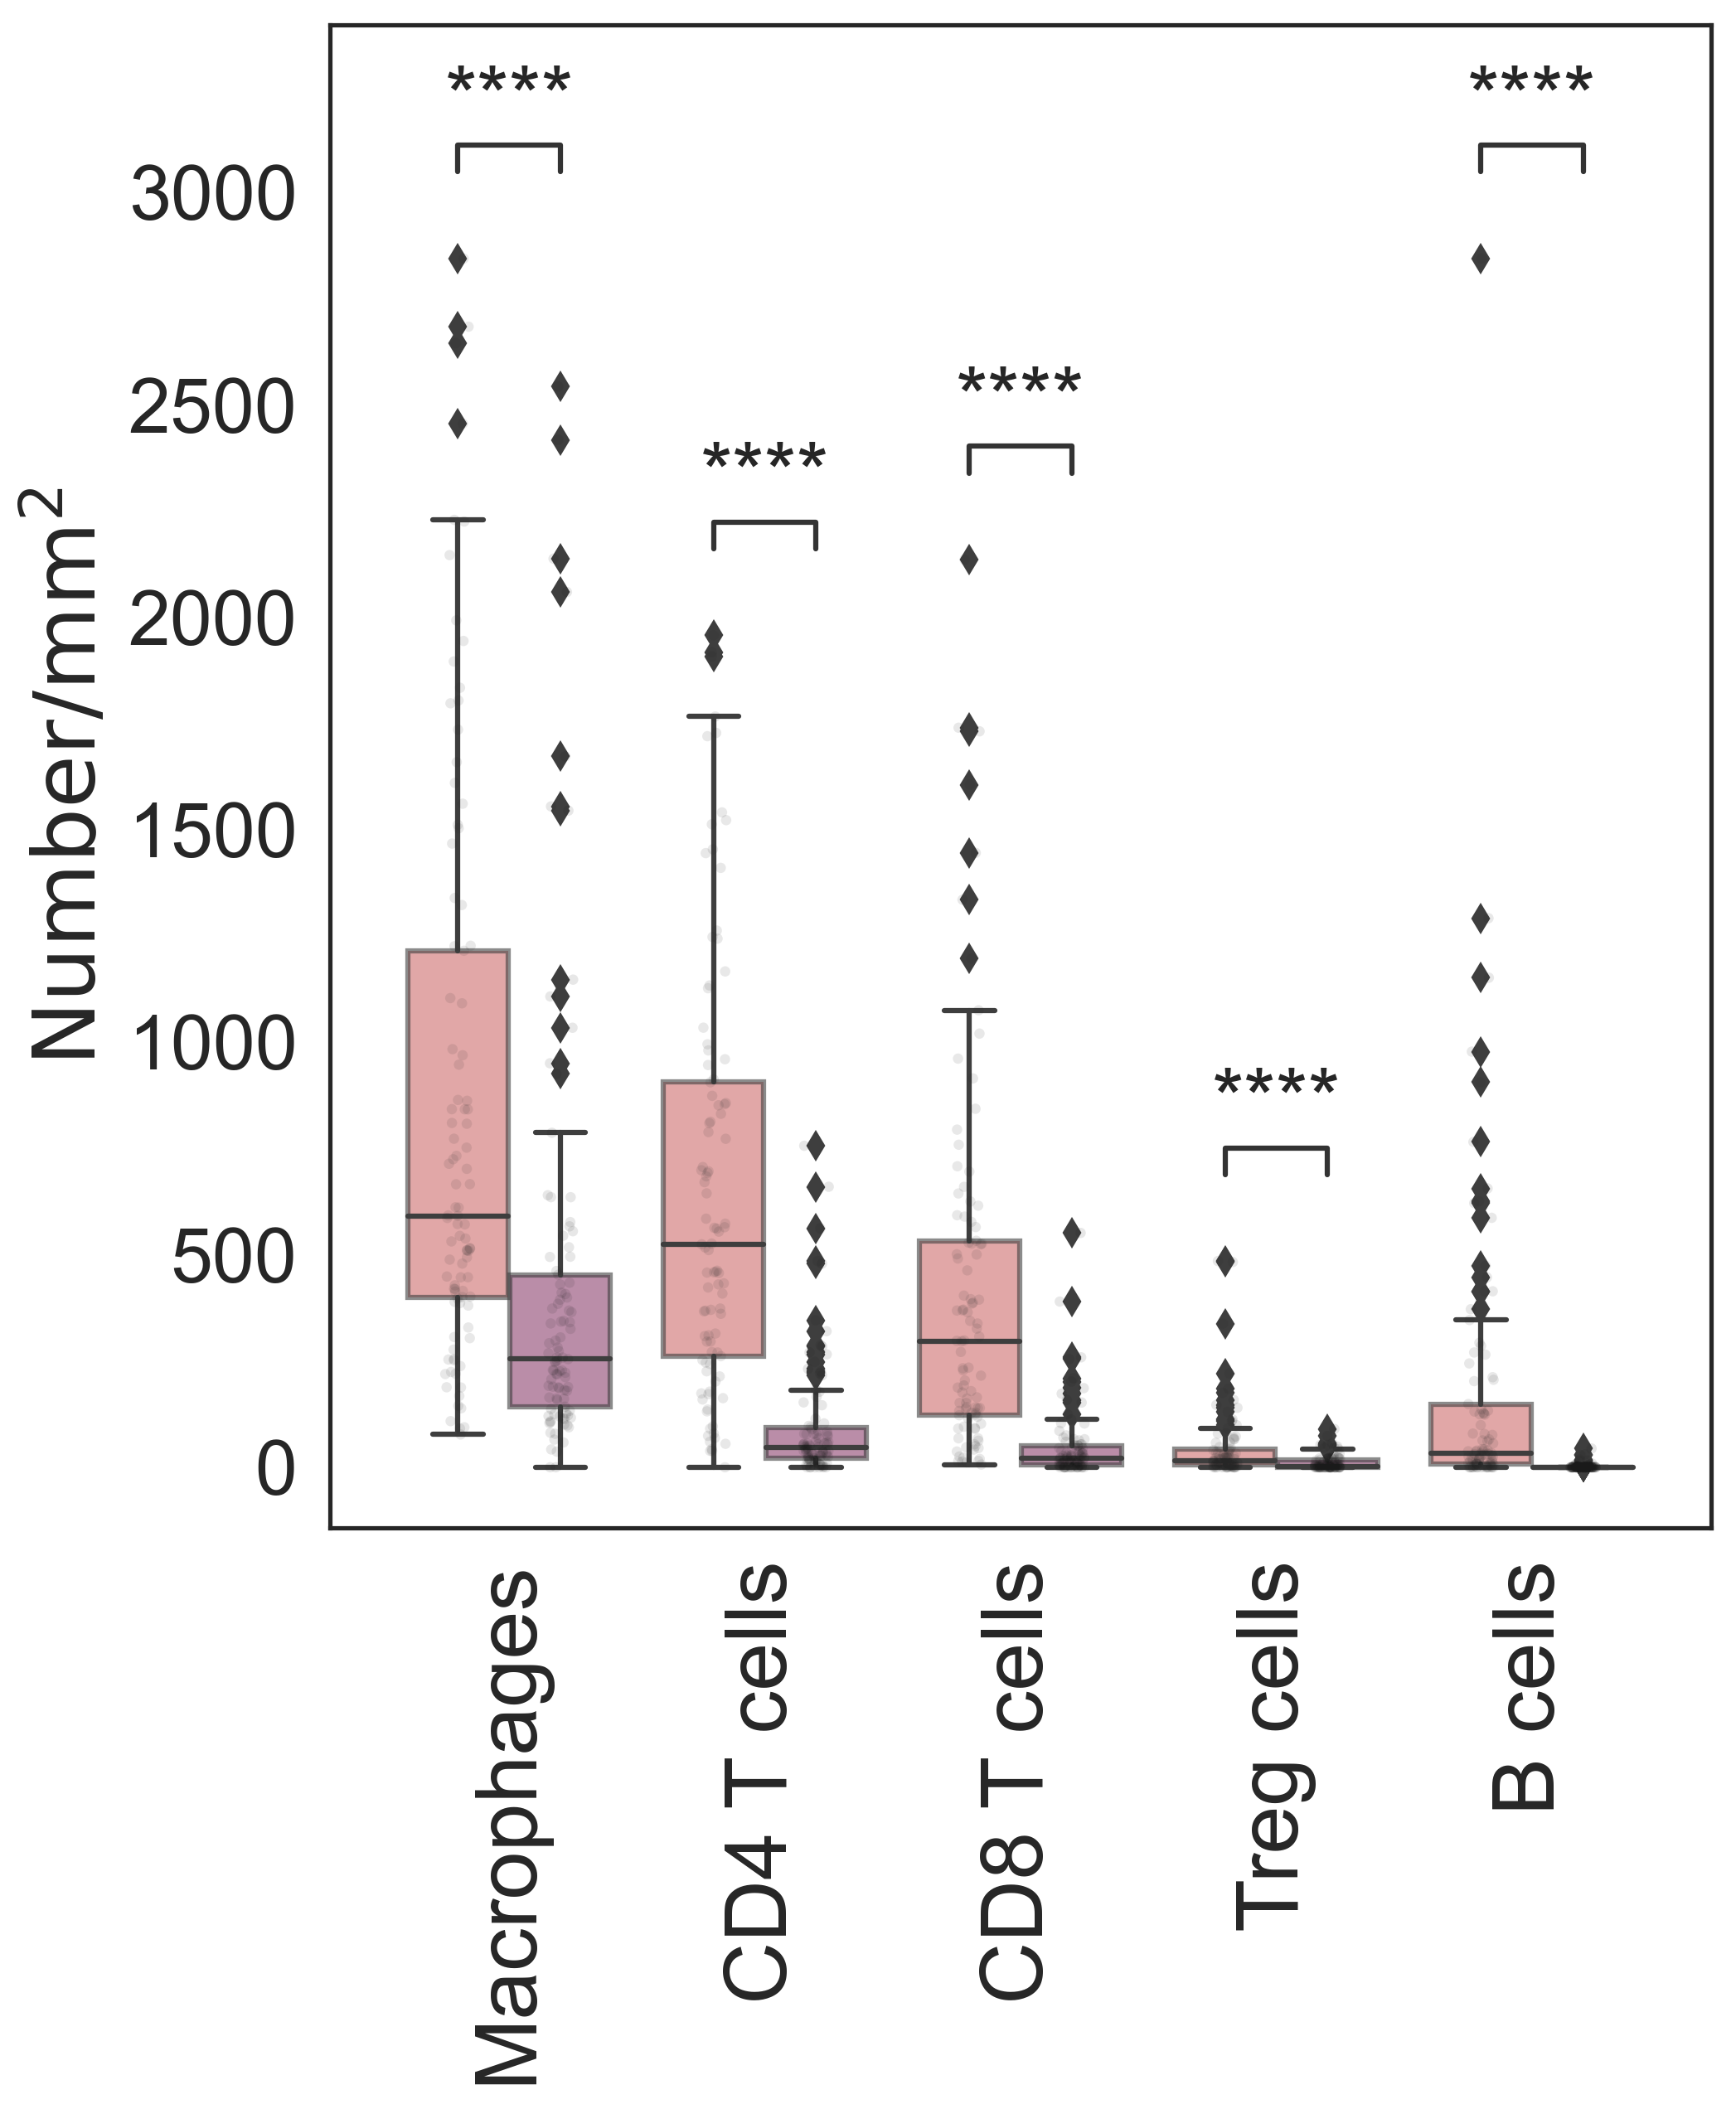

In [161]:
# dfp = dfp.drop(columns=["Tumor PanCK cells"])
thres = dfp.quantile(0.99).max() # capped by 99% of overall max
dfp_capped = dfp.clip(upper=thres)

df_long = dfp_capped.melt(var_name='Column', value_name='Value')
df_long['Region'] = ['Stromal' if x.startswith('Stromal') else 'Tumor' for x in df_long['Column']]
df_long['Cell'] = [x.strip('Stromal').strip('Tumor').strip() for x in df_long['Column']]

# Calculate median for each column and sort
median_values = df_long.groupby('Cell')['Value'].median().sort_values(ascending=False)
sorted_cells = median_values.index

# Filter the long DataFrame based on the sorted columns
df_long_sorted = df_long[df_long['Cell'].isin(sorted_cells)]

# Create the boxplot with jitter
plt.figure(figsize=(7.5, 9))
ax = sns.boxplot(x='Cell', y='Value', hue='Region', data=df_long_sorted, order=sorted_cells, 
                 boxprops=dict(alpha=.6), palette='flare')
sns.stripplot(x='Cell', y='Value', hue='Region',data=df_long_sorted, order=sorted_cells, 
              dodge=True, color='k',alpha=0.1, size=3,jitter=True)


pairs = [(("Macrophages", "Stromal"), ("Macrophages", "Tumor")),
         (("CD4 T cells", "Stromal"), ("CD4 T cells", "Tumor")),
         (("CD8 T cells", "Stromal"), ("CD8 T cells", "Tumor")),
         (("Treg cells", "Stromal"), ("Treg cells", "Tumor")),
         (("B cells", "Stromal"), ("B cells", "Tumor"))]


annotator = Annotator(ax, pairs, data=df_long_sorted, x='Cell', y='Value', hue='Region', order=sorted_cells)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate()


# Improve the plot aesthetics
plt.xticks(rotation=90, fontsize=25)  # Rotate labels for better readability if necessary
plt.xlabel('')
plt.ylabel('$\mathrm{Number/mm^2}$',fontsize=25)
ax.legend(loc='upper right')  # Adjust legend position if needed

ax.legend(loc='upper left', bbox_to_anchor=(.5, 1), title='', fontsize=15)
plt.tight_layout() 

ax.get_legend().remove()


## Immune Infiltration per RNA ILC Subtypes

In [61]:
dat1 = pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='vectra_v1')
dat2 = pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='patient', index_col=0)

dat = pd.merge(dat2,dat1, on='Slide ID')
dat

Patient ID    Slide ID Tumor type  Age at diagnosis   Race  Postmenopausal  \
0   TP17_M510  PBC_PR_758        ILC               NaN    NaN             NaN   
1   TP17_M510  PBC_PR_758        ILC               NaN    NaN             NaN   
2   TP17_M510  PBC_PR_758        ILC               NaN    NaN             NaN   
3   TP17_M510  PBC_PR_758        ILC               NaN    NaN             NaN   
4   TP17_M510  PBC_PR_758        ILC               NaN    NaN             NaN   
..        ...         ...        ...               ...    ...             ...   
92   TP18_M95  PBC_PR_762        ILC              68.0  White             1.0   
93   TP18_M95  PBC_PR_762        ILC              68.0  White             1.0   
94   TP18_M95  PBC_PR_762        ILC              68.0  White             1.0   
95   TP18_M95  PBC_PR_762        ILC              68.0  White             1.0   
96   TP18_M95  PBC_PR_762        ILC              68.0  White             1.0   

    Pathological grade           Pathological stage  Pathological stage brief  \
0                  NaN                          NaN                       NaN   
1                  NaN                          NaN                       NaN   
2                  NaN                          NaN                       NaN   
3                  NaN                          NaN                       NaN   
4                  NaN                          NaN                       NaN   
..                 ...                          ...                       ...   
92                 2.0  1A                                                1.0   
93                 2.0  1A                                                1.0   
94                 2.0  1A                                                1.0   
95                 2.0  1A                                                1.0   
96                 2.0  1A                                                1.0   

    Ki67  ...  Stromal CD4 T cells  Stromal CD8 T cells Stromal Treg cells  \
0    NaN  ...          1445.530589           127.946168           7.311210   
1    NaN  ...          1454.560435           387.288711          10.282001   
2    NaN  ...           561.699570           234.587357           0.000000   
3    NaN  ...          1034.642032           307.693544          12.595642   
4    NaN  ...           644.698879           140.963099          18.656881   
..   ...  ...                  ...                  ...                ...   
92   NaN  ...          1513.488907          1606.604871           5.672038   
93   NaN  ...           296.088415           625.615974           0.000000   
94   NaN  ...          1263.241173          1732.243026          22.978734   
95   NaN  ...           173.931845           297.547691           0.000000   
96   NaN  ...          1127.528270          1075.627016           6.355256   

    Stromal Macrophages Tumor B cells  Tumor CD4 T cells Tumor CD8 T cells  \
0            428.227992     44.145958          30.902171          3.433575   
1           1104.286928      2.099531           9.237934          2.099531   
2            725.050975      6.438246          17.475240          4.138873   
3            714.352847      0.000000          50.910054         10.717906   
4            842.669113      4.273107          76.559841         12.819322   
..                  ...           ...                ...               ...   
92          1227.523639      0.000000          28.190133         30.662952   
93          1944.942177      1.569522          60.688200        103.065304   
94          1610.868175      0.000000         145.975154        186.244162   
95          1993.383177      0.000000          38.695597         38.695597   
96          1092.044759      0.000000          58.102074         38.279014   

    Tumor Treg cells  Tumor Macrophages  Tumor PanCK cells  
0           0.000000          98.592640        4514.169488  
1           0.839812         122.192678        3987.008507  


In [62]:
meta = pd.read_csv('../data/classifier/2_class_pam50.csv', index_col=0)
meta['Patient ID'] = meta.index
meta['ILC Subtype'] = meta['class_2c']
meta

PAM50     ADH1B     ADH1C   ALDH1L1    AQP7P1     BBOX1   C2orf40  \
TP17_M605  Normal  2.216732  2.243131  3.057598  4.052967  0.086482  0.532357   
TP18_M403  Normal  0.933985  0.902377 -0.642738  1.732441  0.390396  0.222004   
TP17_M383    Her2  0.447186  0.403479 -0.249879  0.766307 -1.139162 -0.897606   
TP18_M202  Normal  0.567718  1.100668 -0.249642 -0.151507  0.059297  0.227326   
TP18_M355  Normal  0.672538  1.513375 -0.648330  0.595814 -0.714074 -0.218622   
TP17_M510    LumB  0.830330  0.131490  0.100744  0.155720  0.828979 -1.804247   
TP17_M802    LumA  0.375887 -0.585520 -0.570657 -0.759950 -0.164619 -1.804247   
TP17_M882    LumB -0.542579 -0.717786 -1.241718 -0.937231 -1.247996 -1.238878   
TP18_M329   Basal -0.073613  0.744683 -0.938536  1.020368  0.408761 -1.155406   
TP17_M378    LumB -2.450577 -1.509660 -1.550600 -0.695033 -1.544119 -1.804247   
TP17_M384    LumA  0.150357  0.363820 -0.256393 -0.254560 -1.544119 -1.215822   
TP17_M559    LumA  0.735329  1.052076  0.226357  0.030718 -1.487956 -0.691991   
TP18_M121  Normal  1.088317  0.974793  0.812011  1.338709  0.331189  0.450679   
TP18_M278  Normal  0.817529  0.929124  0.447646  0.855444  0.324414 -0.611650   
TP18_M302  Normal  1.079029  1.562837  0.335068  0.838566  0.187715  0.648315   
TP18_M372    LumA -0.352259 -0.371564 -0.970231 -0.562181 -1.213064 -0.529141   
TP18_M95     LumB  0.086025 -0.727389 -1.550600 -0.937231 -1.544119 -1.804247   
TP18_M251    LumB -0.630991 -1.735907 -1.208298 -0.875797 -1.544119 -1.673275   
TP17_M622   Basal -0.144736 -0.833726 -1.031509 -0.025977  0.290788 -1.729581   
TP17_M899  Normal  0.255436  0.776637 -0.858541 -0.801629 -0.156329  0.128473   
TP17_M901  Normal  2.277764  5.380004  4.144805  1.012687  1.492712 -1.107871   

              CAPN6   CD300LG    CHRDL1  ...     STX11  TMEM132C      TNMD  \
TP17_M605  1.635425  2.176191  2.184944  ...  2.059167  3.019646  2.782020   
TP18_M403  0.388856  0.012006  0.673717  ...  0.553468  0.711447 -1.259790   
TP17_M383  0.244929  0.147138  0.256099  ... -1.536797  0.864486 -0.091378   
TP18_M202  0.811840 -0.355994  0.515171  ...  0.201882  0.153577 -0.387166   
TP18_M355  0.809317 -1.017934  1.021178  ... -0.277383  0.553212  0.780105   
TP17_M510 -1.384409 -0.256367  0.310411  ... -1.502332 -0.776591 -1.069007   
TP17_M802 -1.423712 -1.417968 -0.897053  ... -1.074886 -0.912153 -0.229906   
TP17_M882 -1.583364 -1.391339 -0.740829  ... -0.939527 -0.877570 -0.577537   
TP18_M329 -0.481491 -0.378645  0.249028  ...  0.658627 -0.887453  0.193058   
TP17_M378 -1.591658 -1.417968 -2.025407  ... -2.432829 -1.587066 -1.259790   
TP17_M384 -0.657944 -0.720590 -0.251579  ... -1.632126  0.038893 -0.194731   
TP17_M559 -0.239150  0.112307  0.887136  ...  0.519854 -0.171419 -1.042415   
TP18_M121  0.868007  0.035689  1.103727  ...  0.025477  1.094350  0.819268   
TP18_M278  0.904911 -0.566758  1.417727  ...  0.227547  0.918322 -0.941454   
TP18_M302  0.787776 -0.098492  0.613780  ... -0.484489  0.480602  0.190383   
TP18_M372 -1.012996 -1.323841 -0.355782  ... -0.595131 -0.788806 -0.844217   
TP18_M95  -1.059795 -1.417968 -1.536918  ... -2.046498 -1.637376 -1.259790   
TP18_M251 -1.382902 -1.395454 -2.018669  ... -2.174944 -1.194575 -1.259790   
TP17_M622 -0.883408 -0.434175  0.063856  ... -1.588676 -0.731844  0.972610   
TP17_M899  0.992113 -0.990553  0.671751  ... -1.628143  0.377553 -0.476405   
TP17_M901 -0.745519 -0.789767 -0.713734  ... -1.060206 -0.900982 -1.194036   

               TNXB      TP63  pred  dataset           class_2c  Patient ID  \
TP17_M605  3.840547  0.161899     1      ILC  Non-proliferative   TP17_M605   
TP18_M403  2.591020 -0.545052     1      ILC  Non-proliferative   TP18_M403   
TP17_M383  1.674882 -0.475650     2      ILC      Proliferative   TP17_M383   
TP18_M202  2.466430  0.299445     0      ILC  Non-proliferative   TP18_M202   
TP18_M355  2.808701 -0.044340     1      ILC  Non-proliferative   TP18_M355   
TP17_M510  1.392548  0.065155     2   

In [63]:
mg = pd.merge(meta, dat[[x for x in dat.columns if (x.startswith('Stromal') or x.startswith('Tumor')) or x=='Patient ID']], on='Patient ID')
mg

PAM50     ADH1B     ADH1C   ALDH1L1    AQP7P1     BBOX1   C2orf40  \
0   Normal  0.933985  0.902377 -0.642738  1.732441  0.390396  0.222004   
1   Normal  0.933985  0.902377 -0.642738  1.732441  0.390396  0.222004   
2   Normal  0.933985  0.902377 -0.642738  1.732441  0.390396  0.222004   
3   Normal  0.933985  0.902377 -0.642738  1.732441  0.390396  0.222004   
4   Normal  0.933985  0.902377 -0.642738  1.732441  0.390396  0.222004   
..     ...       ...       ...       ...       ...       ...       ...   
92    LumB -0.630991 -1.735907 -1.208298 -0.875797 -1.544119 -1.673275   
93    LumB -0.630991 -1.735907 -1.208298 -0.875797 -1.544119 -1.673275   
94    LumB -0.630991 -1.735907 -1.208298 -0.875797 -1.544119 -1.673275   
95    LumB -0.630991 -1.735907 -1.208298 -0.875797 -1.544119 -1.673275   
96    LumB -0.630991 -1.735907 -1.208298 -0.875797 -1.544119 -1.673275   

       CAPN6   CD300LG    CHRDL1  ...  Stromal CD4 T cells  \
0   0.388856  0.012006  0.673717  ...            68.882352   
1   0.388856  0.012006  0.673717  ...           261.461733   
2   0.388856  0.012006  0.673717  ...            90.744066   
3   0.388856  0.012006  0.673717  ...           271.221296   
4   0.388856  0.012006  0.673717  ...           225.867078   
..       ...       ...       ...  ...                  ...   
92 -1.382902 -1.395454 -2.018669  ...           246.381676   
93 -1.382902 -1.395454 -2.018669  ...           874.245312   
94 -1.382902 -1.395454 -2.018669  ...           135.841314   
95 -1.382902 -1.395454 -2.018669  ...           563.477553   
96 -1.382902 -1.395454 -2.018669  ...           408.881678   

    Stromal CD8 T cells  Stromal Treg cells  Stromal Macrophages  \
0             46.865162            3.145313           187.775180   
1            132.620952            8.190368           253.586380   
2             45.267248            4.610553           167.866043   
3            164.538184            0.000000           386.521121   
4             91.229699            8.828681           447.319815   
..                  ...                 ...                  ...   
92            90.725382          220.587204          2229.887586   
93           590.014556           72.741521           514.578905   
94            11.393143          130.582941          2226.044766   
95           139.549327           91.272803           572.529401   
96           102.381397           65.678632           773.333694   

    Tumor B cells  Tumor CD4 T cells  Tumor CD8 T cells  Tumor Treg cells  \
0        0.000000           4.967195           0.000000          0.000000   
1        0.000000          26.619176          13.091398          0.000000   
2        0.000000           0.000000           9.025910          0.000000   
3        0.000000          97.360350          69.798780          0.000000   
4        0.000000          45.406179          19.586979          2.225793   
..            ...                ...                ...               ...   
92       1.469839          24.987260           0.000000         20.577743   
93       0.000000         270.364164          85.706219         42.853110   
94       0.000000          30.374148           4.925537         20.523073   
95       0.000000          17.644210           0.000000         17.644210   
96       0.000000         113.955928          34.507781         11.235092   

    Tumor Macrophages  Tumor PanCK cells  
0           78.765519        2290.586450  
1          246.991047        4333.689199  
2          100.710151        4750.478830  
3           41.879268        3340.677003  
4          162.037738        4375.464097  
..                ...                ...  
92         555.599069        6897.953521  
93         113.755527        6759.104089  
94         640.319871        7252.033002  
95         186.524502        7496.268495  
96         410.883348        7313.242082  

[97 rows x 75 columns]

In [73]:
immune_cells = ['Stromal B cells', 'Stromal CD4 T cells',
       'Stromal CD8 T cells', 'Stromal Treg cells', 'Stromal Macrophages',
       'Tumor B cells', 'Tumor CD4 T cells', 'Tumor CD8 T cells',
       'Tumor Treg cells', 'Tumor Macrophages']

df_wide = mg[['ILC Subtype']+[x for x in mg.columns if x in immune_cells]]
             
df_long = pd.melt(df_wide, id_vars=['ILC Subtype'], var_name='cell type', value_name='count')
df_long['region'] = ['Stromal' if x.startswith('Stromal') else 'Tumor' for x in df_long['cell type']]

df_long['cell type'] = pd.Categorical(df_long['cell type'], categories=immune_cells, ordered=True)
df_long

ILC Subtype          cell type       count   region
0    Non-proliferative    Stromal B cells   56.301101  Stromal
1    Non-proliferative    Stromal B cells    8.190368  Stromal
2    Non-proliferative    Stromal B cells    0.000000  Stromal
3    Non-proliferative    Stromal B cells   24.619180  Stromal
4    Non-proliferative    Stromal B cells   78.354540  Stromal
..                 ...                ...         ...      ...
965      Proliferative  Tumor Macrophages  555.599069    Tumor
966      Proliferative  Tumor Macrophages  113.755527    Tumor
967      Proliferative  Tumor Macrophages  640.319871    Tumor
968      Proliferative  Tumor Macrophages  186.524502    Tumor
969      Proliferative  Tumor Macrophages  410.883348    Tumor

[970 rows x 4 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Stromal CD4 T cells_Non-proliferative vs. Stromal CD4 T cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.695e-07 U_stat=4.730e+02
Stromal B cells_Non-proliferative vs. Stromal B cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.369e-01 U_stat=1.037e+03
Stromal CD8 T cells_Non-proliferative vs. Stromal CD8 T cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.824e-04 U_stat=6.940e+02
Stromal Treg cells_Non-proliferative vs. Stromal Treg cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.228e-07 U_stat=4.640e+02
Stromal Macrophages_Non-proliferative vs. Stromal Macrophages_Proliferative: Mann-Whit

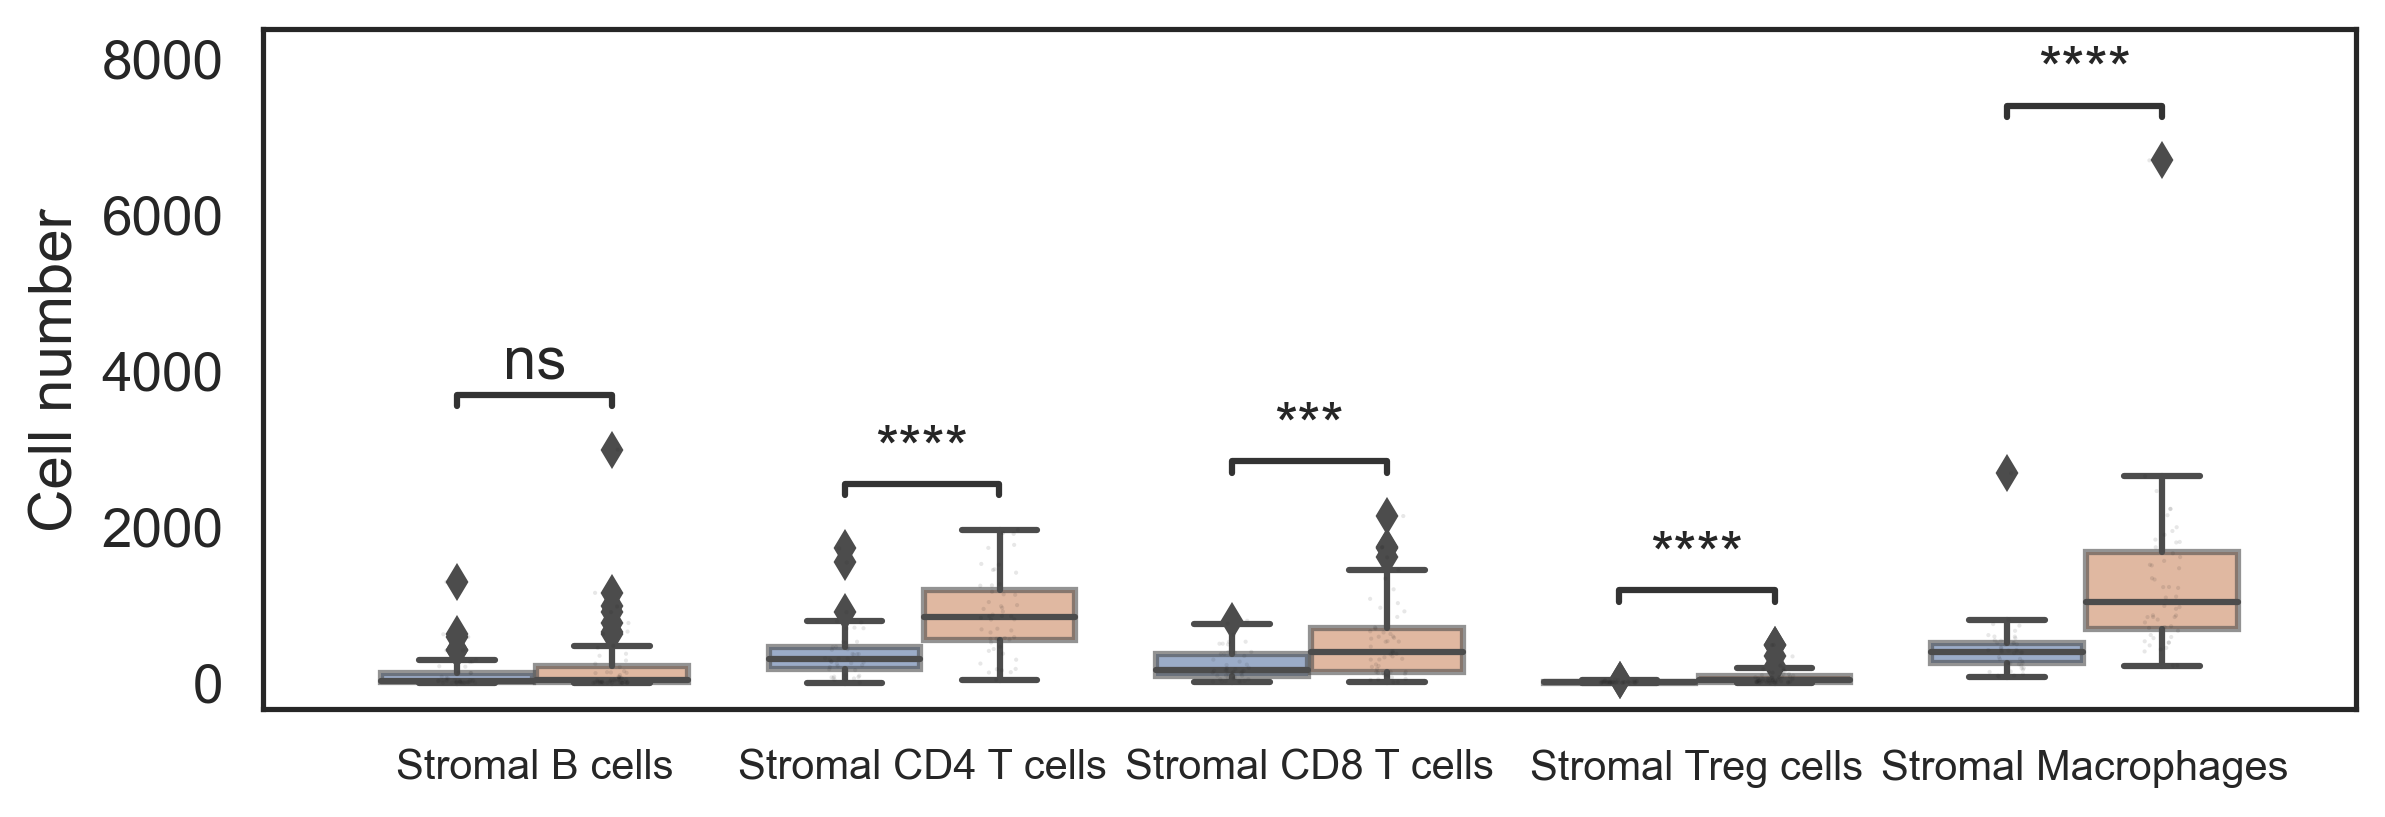

In [123]:
fig,ax = plt.subplots(figsize=(9,3))


immune_cells = ['Stromal B cells', 'Stromal CD4 T cells',
       'Stromal CD8 T cells', 'Stromal Treg cells', 'Stromal Macrophages'
       ]
dfpp = df_long[df_long['cell type'].isin(immune_cells)]
dfpp['cell type'] = dfpp['cell type'].cat.remove_unused_categories()

prolif_groups = ['Non-proliferative', 'Proliferative']

pairs = [tuple((immune_cells[i],prolif_groups[j]) for j in range(2)) for i in range(len(immune_cells)) ]

ax = sns.boxplot(data=dfpp, hue='ILC Subtype',x='cell type', y='count',
                order=immune_cells, boxprops=dict(alpha=.6))
sns.stripplot(data=dfpp, hue='ILC Subtype',x='cell type', y='count',
              order=immune_cells,
              dodge=True, color='k',alpha=0.1, size=1,jitter=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)

annotator = Annotator(ax, pairs, data=dfpp, hue='ILC Subtype',x='cell type', y='count')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate()

ax.set_xlabel('')
ax.set_ylabel('Cell number')

ax.get_legend().remove()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Tumor CD4 T cells_Non-proliferative vs. Tumor CD4 T cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.369e-06 U_stat=5.020e+02
Tumor B cells_Non-proliferative vs. Tumor B cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.939e-03 U_stat=8.955e+02
Tumor CD8 T cells_Non-proliferative vs. Tumor CD8 T cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:7.880e-03 U_stat=8.030e+02
Tumor Treg cells_Non-proliferative vs. Tumor Treg cells_Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.867e-08 U_stat=4.465e+02
Tumor Macrophages_Non-proliferative vs. Tumor Macrophages_Proliferative: Mann-Whitney-Wilcoxon test tw

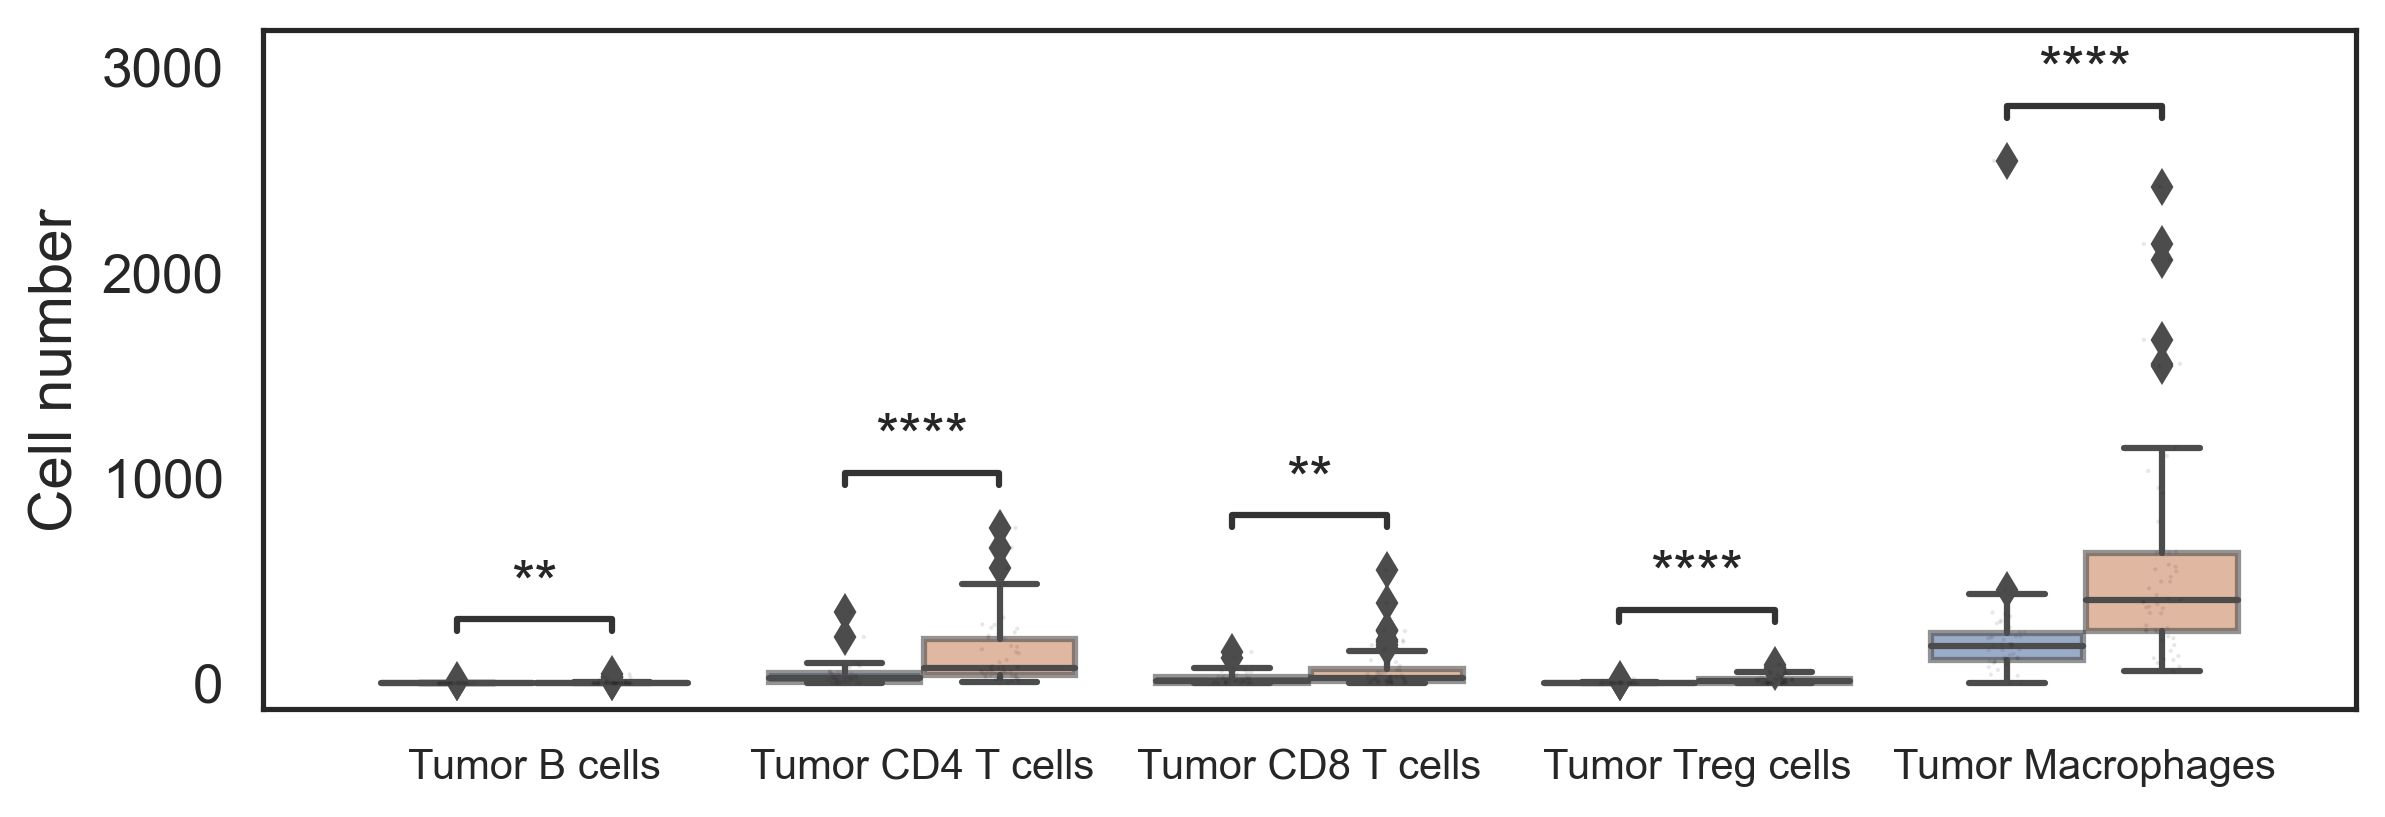

In [124]:
fig,ax = plt.subplots(figsize=(9,3))


immune_cells = ['Tumor B cells', 'Tumor CD4 T cells', 'Tumor CD8 T cells',
       'Tumor Treg cells', 'Tumor Macrophages'
       ]
dfpp = df_long[df_long['cell type'].isin(immune_cells)]
dfpp['cell type'] = dfpp['cell type'].cat.remove_unused_categories()

prolif_groups = ['Non-proliferative', 'Proliferative']

pairs = [tuple((immune_cells[i],prolif_groups[j]) for j in range(2)) for i in range(len(immune_cells)) ]

ax = sns.boxplot(data=dfpp, hue='ILC Subtype',x='cell type', y='count',
                order=immune_cells, boxprops=dict(alpha=.6))
sns.stripplot(data=dfpp, hue='ILC Subtype',x='cell type', y='count',
              order=immune_cells,
              dodge=True, color='k',alpha=0.1, size=1,jitter=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)

annotator = Annotator(ax, pairs, data=dfpp, hue='ILC Subtype',x='cell type', y='count')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate()

ax.set_xlabel('')
ax.set_ylabel('Cell number')

ax.get_legend().remove()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.369e-01 U_stat=1.037e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.695e-07 U_stat=4.730e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.824e-04 U_stat=6.940

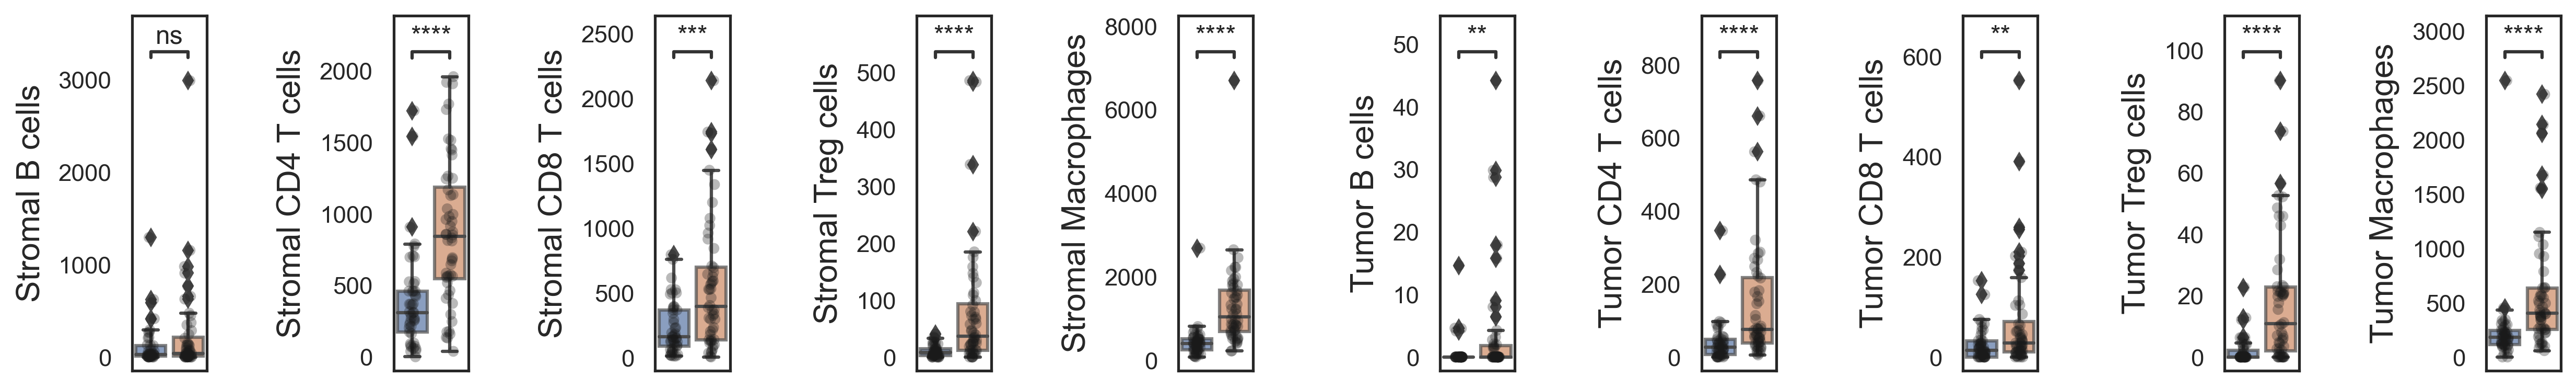

In [172]:
immune_cells = ['Stromal B cells', 'Stromal CD4 T cells',
       'Stromal CD8 T cells', 'Stromal Treg cells', 'Stromal Macrophages',
       'Tumor B cells', 'Tumor CD4 T cells', 'Tumor CD8 T cells',
       'Tumor Treg cells', 'Tumor Macrophages']


group_name = 'ILC Subtype'
terms = immune_cells
fig,axes = plt.subplots(ncols=10, nrows=1, figsize=(20,3))

fig.subplots_adjust(hspace=.3, wspace=2.5)

for idx,name in enumerate(terms):
    
    ax = axes.flatten()[idx]
    
    mg['ILC Subtype'] = pd.Categorical(mg['ILC Subtype'], 
                                categories=['Non-proliferative','Proliferative'],
                                ordered=True)

    
    mg[name] = mg[name].astype(float)
 #     sorted_cells = mg[name].median().sort_values(ascending=False).index
    sns.boxplot(data=mg, x=group_name,y=name, ax=ax, boxprops=dict(alpha=.7))
    sns.stripplot(data=mg, x=group_name,y=name, ax=ax, alpha=.3, size=5, jitter=True, color='k')
    ax.set_xlabel(''); ax.set_ylabel('')
    
    title = join_with_linebreaks(name.split('_'))
    ax.set_ylabel(title, fontsize=15, labelpad=-10)
#     ax.set_ylabel('')

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 20, ha='right')

    
    pairs = [('Non-proliferative', 'Proliferative')]
    
    hue_plot_params = {
    'data': mg,
    'x': group_name,
    'y': name
}
    
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction='fdr_bh')
    annotator.apply_and_annotate()
    
    ax.set_xticklabels('')

## Immune cell correlation

In [15]:
dat1 = pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='vectra_v1')
dat2 = pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='patient')

dat = pd.merge(dat1, dat2, on='Slide ID').set_index('Sample Name')
dat

Slide ID  Stromal B cells  \
Sample Name                                                 
PBC-PR-758_[10280,25237].im3  PBC_PR_758      2986.629132   
PBC-PR-758_[12450,22666].im3  PBC_PR_758      1152.269600   
PBC-PR-758_[10454,26237].im3  PBC_PR_758       447.067004   
PBC-PR-758_[13908,24863].im3  PBC_PR_758       346.380159   
PBC-PR-758_[7895,29938].im3   PBC_PR_758       136.298879   
...                                  ...              ...   
PBC-PR-771_[12637,21217].im3  PBC_PR_771        78.354540   
PBC-PR-771_[12828,19968].im3  PBC_PR_771         0.000000   
PBC-PR-771_[13975,20968].im3  PBC_PR_771        11.334603   
PBC-PR-771_[13062,22217].im3  PBC_PR_771        29.834017   
PBC-PR-771_[8991,22235].im3   PBC_PR_771         9.784775   

                              Stromal CD4 T cells  Stromal CD8 T cells  \
Sample Name                                                              
PBC-PR-758_[10280,25237].im3          1445.530589           127.946168   
PBC-PR-758_[12450,22666].im3          1454.560435           387.288711   
PBC-PR-758_[10454,26237].im3           561.699570           234.587357   
PBC-PR-758_[13908,24863].im3          1034.642032           307.693544   
PBC-PR-758_[7895,29938].im3            644.698879           140.963099   
...                                           ...                  ...   
PBC-PR-771_[12637,21217].im3           225.867078            91.229699   
PBC-PR-771_[12828,19968].im3           370.547126           500.730778   
PBC-PR-771_[13975,20968].im3           459.051417           296.760512   
PBC-PR-771_[13062,22217].im3            73.963500            14.917008   
PBC-PR-771_[8991,22235].im3              0.000000            19.569550   

                              Stromal Treg cells  Stromal Macrophages  \
Sample Name                                                             
PBC-PR-758_[10280,25237].im3            7.311210           428.227992   
PBC-PR-758_[12450,22666].im3           10.282001          1104.286928   
PBC-PR-758_[10454,26237].im3            0.000000           725.050975   
PBC-PR-758_[13908,24863].im3           12.595642           714.352847   
PBC-PR-758_[7895,29938].im3            18.656881           842.669113   
...                                          ...                  ...   
PBC-PR-771_[12637,21217].im3            8.828681           447.319815   
PBC-PR-771_[12828,19968].im3            2.540169          2684.640917   
PBC-PR-771_[13975,20968].im3            5.667301           509.541921   
PBC-PR-771_[13062,22217].im3            0.000000           415.190065   
PBC-PR-771_[8991,22235].im3             0.000000            77.127052   

                              Tumor B cells  Tumor CD4 T cells  \
Sample Name                                                      
PBC-PR-758_[10280,25237].im3      44.145958          30.902171   
PBC-PR-758_[12450,22666].im3       2.099531           9.237934   
PBC-PR-758_[10454,26237].im3       6.438246          17.475240   
PBC-PR-758_[13908,24863].im3       0.000000          50.910054   
PBC-PR-758_[7895,29938].im3        4.273107          76.559841   
...                                     ...                ...   
PBC-PR-771_[12637,21217].im3       0.000000          45.406179   
PBC-PR-771_[12828,19968].im3       0.000000           0.000000   
PBC-PR-771_[13975,20968].im3       0.000000           0.000000   
PBC-PR-771_[13062,22217].im3       0.000000           0.000000   
PBC-PR-771_[8991,22235].im3        0.000000          35.652580   

                              Tumor CD8 T cells  Tumor Treg cells  ...  \
Sample Name                                                        ...   
PBC-PR-758_[10280,25237].im3           3.433575          0.000000  ...   
PBC-PR-758_[12450,22666].im3           2.099531          0.839812  ...   
PBC-PR-758_[10454,26237].im3           4.138873          0.000000  ...   
PBC-PR-758_[13908,24863].im3          10.717906          2.679477  ...   
PBC-PR-758_[7895,29938

In [16]:
sns.set(style='white', font_scale=1)

sel_cols = [
'Stromal B cells','Stromal CD4 T cells','Stromal CD8 T cells','Stromal Treg cells','Stromal Macrophages',
'Tumor B cells','Tumor CD4 T cells','Tumor CD8 T cells','Tumor Treg cells','Tumor Macrophages'
]

X1 = dat[sel_cols]

df_corr = X1.corr(method='spearman')
df_corr


Stromal B cells  Stromal CD4 T cells  \
Stromal B cells             1.000000             0.434421   
Stromal CD4 T cells         0.434421             1.000000   
Stromal CD8 T cells         0.186502             0.806044   
Stromal Treg cells          0.109923             0.421857   
Stromal Macrophages        -0.048756             0.502696   
Tumor B cells               0.449887             0.242275   
Tumor CD4 T cells           0.095027             0.519228   
Tumor CD8 T cells          -0.072632             0.324680   
Tumor Treg cells            0.015303             0.358353   
Tumor Macrophages          -0.079076             0.371010   

                     Stromal CD8 T cells  Stromal Treg cells  \
Stromal B cells                 0.186502            0.109923   
Stromal CD4 T cells             0.806044            0.421857   
Stromal CD8 T cells             1.000000            0.257225   
Stromal Treg cells              0.257225            1.000000   
Stromal Macrophages             0.420839            0.575260   
Tumor B cells                   0.098615            0.030581   
Tumor CD4 T cells               0.534432            0.342599   
Tumor CD8 T cells               0.537344            0.090114   
Tumor Treg cells                0.244213            0.721197   
Tumor Macrophages               0.358426            0.464172   

                     Stromal Macrophages  Tumor B cells  Tumor CD4 T cells  \
Stromal B cells                -0.048756       0.449887           0.095027   
Stromal CD4 T cells             0.502696       0.242275           0.519228   
Stromal CD8 T cells             0.420839       0.098615           0.534432   
Stromal Treg cells              0.575260       0.030581           0.342599   
Stromal Macrophages             1.000000       0.027880           0.279783   
Tumor B cells                   0.027880       1.000000           0.195613   
Tumor CD4 T cells               0.279783       0.195613           1.000000   
Tumor CD8 T cells               0.132443       0.117398           0.765707   
Tumor Treg cells                0.507061       0.077733           0.534774   
Tumor Macrophages               0.680513      -0.016089           0.524898   

                     Tumor CD8 T cells  Tumor Treg cells  Tumor Macrophages  
Stromal B cells              -0.072632          0.015303          -0.079076  
Stromal CD4 T cells           0.324680          0.358353           0.371010  
Stromal CD8 T cells           0.537344          0.244213           0.358426  
Stromal Treg cells            0.090114          0.721197           0.464172  
Stromal Macrophages           0.132443          0.507061           0.680513  
Tumor B cells                 0.117398          0.077733          -0.016089  
Tumor CD4 T cells             0.765707          0.534774           0.524898  
Tumor CD8 T cells             1.000000          0.327411           0.343909  
Tumor Treg cells              0.327411          1.000000           0.570762  
Tumor Macrophages             0.343909          0.570762           1.000000

In [17]:
pvals = []
df_p = X1

for i in range(len(sel_cols)):
    for j in range(len(sel_cols)):
        if i<j:
            x1 = df_p.iloc[:,i].values
            x2 = df_p.iloc[:,j].values
            mask = (~np.isnan(x1)) & (~np.isnan(x2)) 
            _, pval = spearmanr(x1[mask],x2[mask])
            pvals.append(pval)
        
from statsmodels.stats.multitest import multipletests
_,fdr,_,_ = multipletests(pvals, method='fdr_bh')

fdr_mat = pd.DataFrame(np.nan, index=range(len(sel_cols)), columns=range(len(sel_cols))) 

counter = -1
for i in range(len(sel_cols)):
    for j in range(len(sel_cols)):
        if i<j:
            counter += 1
            fdr_mat.iloc[i,j] = fdr[counter]
            fdr_mat.iloc[j,i] = fdr[counter] # just duplicate
        if i==j:
            fdr_mat.iloc[i,j] = 0

fdr_df = pd.DataFrame(fdr_mat.values, columns=sel_cols, index=sel_cols)
fdr_df

Stromal B cells  Stromal CD4 T cells  \
Stromal B cells             0.000000         2.461353e-05   
Stromal CD4 T cells         0.000025         0.000000e+00   
Stromal CD8 T cells         0.097815         1.039797e-21   
Stromal Treg cells          0.375613         4.423882e-05   
Stromal Macrophages         0.697302         5.351261e-07   
Tumor B cells               0.000011         2.607780e-02   
Tumor CD4 T cells           0.443138         2.071070e-07   
Tumor CD8 T cells           0.539510         2.116726e-03   
Tumor Treg cells            0.881733         6.712724e-04   
Tumor Macrophages           0.518268         4.339291e-04   

                     Stromal CD8 T cells  Stromal Treg cells  \
Stromal B cells             9.781480e-02        3.756133e-01   
Stromal CD4 T cells         1.039797e-21        4.423882e-05   
Stromal CD8 T cells         0.000000e+00        1.829245e-02   
Stromal Treg cells          1.829245e-02        0.000000e+00   
Stromal Macrophages         4.423882e-05        6.423328e-09   
Tumor B cells               4.327133e-01        8.209252e-01   
Tumor CD4 T cells           8.593257e-08        1.159163e-03   
Tumor CD8 T cells           8.593257e-08        4.622214e-01   
Tumor Treg cells            2.559182e-02        1.200931e-15   
Tumor Macrophages           6.712724e-04        5.390626e-06   

                     Stromal Macrophages  Tumor B cells  Tumor CD4 T cells  \
Stromal B cells             6.973021e-01       0.000011       4.431380e-01   
Stromal CD4 T cells         5.351261e-07       0.026078       2.071070e-07   
Stromal CD8 T cells         4.423882e-05       0.432713       8.593257e-08   
Stromal Treg cells          6.423328e-09       0.820925       1.159163e-03   
Stromal Macrophages         0.000000e+00       0.822906       9.540144e-03   
Tumor B cells               8.229064e-01       0.000000       8.225149e-02   
Tumor CD4 T cells           9.540144e-03       0.082251       0.000000e+00   
Tumor CD8 T cells           2.755387e-01       0.343800       1.476134e-18   
Tumor Treg cells            4.341897e-07       0.518268       8.593257e-08   
Tumor Macrophages           1.973366e-13       0.881733       1.532118e-07   

                     Tumor CD8 T cells  Tumor Treg cells  Tumor Macrophages  
Stromal B cells           5.395101e-01      8.817331e-01       5.182684e-01  
Stromal CD4 T cells       2.116726e-03      6.712724e-04       4.339291e-04  
Stromal CD8 T cells       8.593257e-08      2.559182e-02       6.712724e-04  
Stromal Treg cells        4.622214e-01      1.200931e-15       5.390626e-06  
Stromal Macrophages       2.755387e-01      4.341897e-07       1.973366e-13  
Tumor B cells             3.437999e-01      5.182684e-01       8.817331e-01  
Tumor CD4 T cells         1.476134e-18      8.593257e-08       1.532118e-07  
Tumor CD8 T cells         0.000000e+00      1.991437e-03       1.150742e-03  
Tumor Treg cells          1.991437e-03      0.000000e+00       7.764464e-09  
Tumor Macrophages         1.150742e-03      7.764464e-09       0.000000e+00

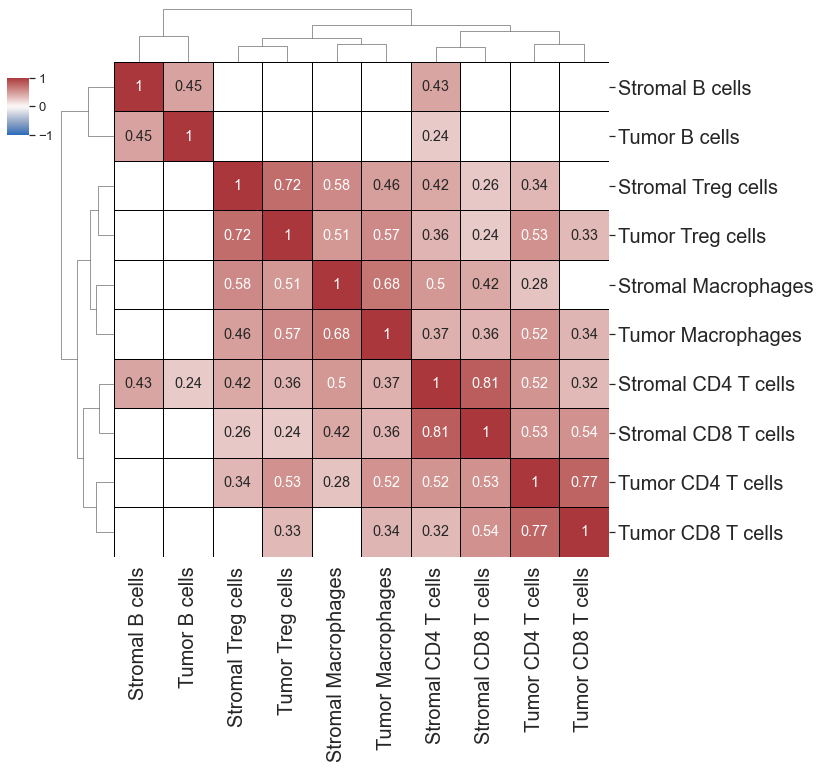

In [18]:
sns.set(style='white', font_scale=1.2)

alpha = 0.05
mask = ((fdr_mat >= alpha)*1).values 

# Plot clustered heatmap
g=sns.clustermap(df_corr, cmap="vlag", center=0, annot=True, mask=mask,\
                 linewidths=1, linecolor='black', figsize=(10,10),
                 vmin=-1, vmax=1, dendrogram_ratio=.1
                 )
g.cax.set_position([-.05, .8, .03, .08])

_=plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=20)  # Set x label font size
_=plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=20)  # Set y label font size


## Immune cell NMF clustering

In [42]:
dat1 = pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='vectra_v1')
dat2 = pd.read_csv('../data/raw/Meta_BulkRNAseqCohort_updated.csv')#pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='patient', index_col=0)

dat = pd.merge(dat2,dat1, left_on='Sample ID', right_on='Slide ID')
dat = dat.set_index('Patient ID',drop=True)

sel_cols = [
       'Stromal B cells','Stromal CD4 T cells', 
       'Stromal CD8 T cells', 'Stromal Treg cells',
       'Stromal Macrophages', 'Tumor B cells', 'Tumor CD4 T cells',
       'Tumor CD8 T cells', 'Tumor Treg cells', 'Tumor Macrophages',
       'Tumor PanCK cells']

df_p = dat[sel_cols].T
df_p = np.log2(df_p + 1)

df_corr = df_p.corr(method='spearman')
df_corr

Patient ID  TP17_M510  TP17_M510  TP17_M510  TP17_M510  TP17_M510  TP17_M510  \
Patient ID                                                                     
TP17_M510    1.000000   0.943055   0.938499   0.881818   0.836364   0.636364   
TP17_M510    0.943055   1.000000   0.899543   0.965834   0.906608   0.801824   
TP17_M510    0.938499   0.899543   1.000000   0.920276   0.915720   0.724375   
TP17_M510    0.881818   0.965834   0.920276   1.000000   0.945455   0.854545   
TP17_M510    0.836364   0.906608   0.915720   0.945455   1.000000   0.927273   
...               ...        ...        ...        ...        ...        ...   
TP18_M403    0.790909   0.870162   0.906608   0.945455   0.981818   0.900000   
TP18_M403    0.514870   0.611608   0.625942   0.657889   0.829512   0.867651   
TP18_M403    0.818826   0.895302   0.860329   0.907222   0.953746   0.916527   
TP18_M403    0.877356   0.889293   0.919102   0.907097   0.827788   0.703868   
TP18_M403    0.574991   0.541525   0.690569   0.624559   0.619602   0.505595   

Patient ID  TP17_M510  TP17_M510  TP17_M802  TP17_M802  ...  TP18_M372  \
Patient ID                                              ...              
TP17_M510    0.936364   0.800000   0.836364   0.709091  ...   0.710708   
TP17_M510    0.961278   0.892941   0.902052   0.788157  ...   0.643836   
TP17_M510    0.961278   0.892941   0.920276   0.851938  ...   0.732877   
TP17_M510    0.963636   0.954545   0.945455   0.881818  ...   0.660594   
TP17_M510    0.954545   0.990909   0.981818   0.963636  ...   0.660594   
...               ...        ...        ...        ...  ...        ...   
TP18_M403    0.918182   0.990909   0.981818   0.981818  ...   0.683373   
TP18_M403    0.696028   0.829512   0.762770   0.829512  ...   0.334473   
TP18_M403    0.916527   0.953746   0.921179   0.888612  ...   0.587542   
TP18_M403    0.917011   0.827788   0.817875   0.728652  ...   0.578786   
TP18_M403    0.688997   0.619602   0.555163   0.639429  ...   0.439679   

Patient ID  TP18_M403  TP18_M403  TP18_M403  TP18_M403  TP18_M403  TP18_M403  \
Patient ID                                                                     
TP17_M510    0.834898   0.662107   0.530376   0.642229   0.790909   0.514870   
TP17_M510    0.882780   0.775746   0.645830   0.708063   0.870162   0.611608   
TP17_M510    0.891975   0.810071   0.669145   0.836802   0.906608   0.625942   
TP17_M510    0.917470   0.863023   0.707168   0.825723   0.945455   0.657889   
TP17_M510    0.972518   0.936083   0.846741   0.853247   0.981818   0.829512   
...               ...        ...        ...        ...        ...        ...   
TP18_M403    0.954169   0.949782   0.856045   0.889946   1.000000   0.800909   
TP18_M403    0.817913   0.780628   0.907587   0.625463   0.800909   1.000000   
TP18_M403    0.943756   0.855290   0.873810   0.737162   0.930484   0.878310   
TP18_M403    0.790395   0.709579   0.631646   0.780390   0.827788   0.561465   
TP18_M403    0.615308   0.525337   0.370363   0.710355   0.619602   0.384708   

Patient ID  TP18_M403  TP18_M403  TP18_M403  
Patient ID                                   
TP17_M510    0.818826   0.877356   0.574991  
TP17_M510    0.895302   0.889293   0.541525  
TP17_M510    0.860329   0.919102   0.690569  
TP17_M510    0.907222   0.907097   0.624559  
TP17_M510    0.953746   0.827788   0.619602  
...               ...        ...        ...  
TP18_M403    0.930484   0.827788   0.619602  
TP18_M403    0.878310   0.561465   0.384708  
TP18_M403    1.000000   0.847268   0.494663  
TP18_M403    0.847268   1.000000   0.662162  
TP18_M403    0.494663   0.662162   1.000000  

[97 rows x 97 columns]

In [44]:
from bignmf.datasets.datasets import Datasets
from bignmf.models.snmf.standard import StandardNmf

2 0.9460090104136112
3 0.9464348038932685
4 0.9076118968071417
5 0.908877989122913
6 0.8947769415639978
7 0.8753136915903039
8 0.8529308868438029
9 0.8452242271518334
10 0.8341142004736548
11 0.8255255563565616


Text(0.5, 1.0, 'NMF Clustering')

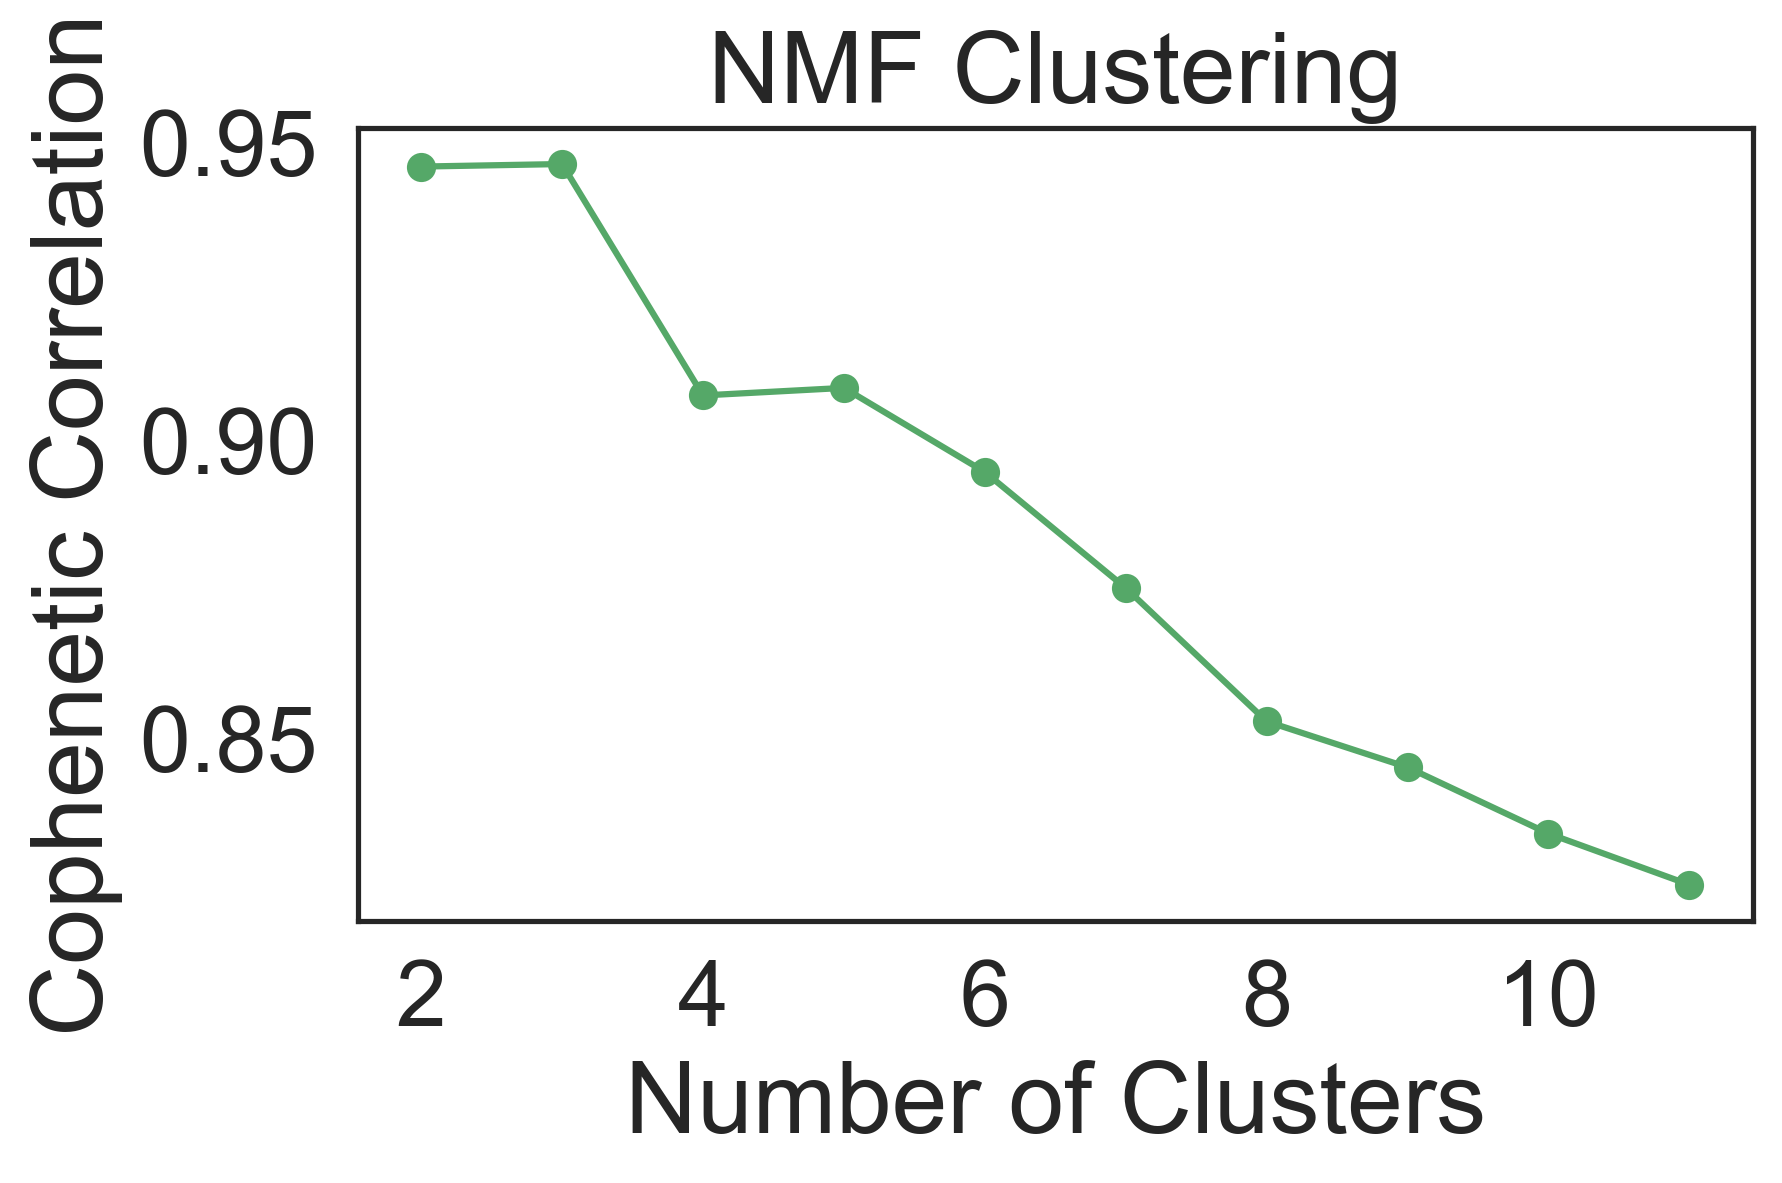

In [93]:
# NMF
from bignmf.datasets.datasets import Datasets
from bignmf.models.snmf.standard import StandardNmf

iter = 100
trials = 100
model_dict = {}
k_list, cophen_list = [],[]

for k in range(2,12): # to adjust

    model = StandardNmf(df_corr,k, seed=2023)
    model.run(trials, iter, verbose=0)

    print(k,model.cophenetic_correlation(model.consensus_matrix_h))
    k_list.append(k)
    cophen_list.append(model.cophenetic_correlation(model.consensus_matrix_h))

    model_dict[k] = model
    
import pickle as pkl
pkl.dump(model_dict, open('../data/nmf/k2_12_immune.pkl','wb'))
    
fig, ax = plt.subplots(figsize=(6,3.5))
ax.plot(k_list, cophen_list, 'g-o')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Cophenetic Correlation')
ax.set_title('NMF Clustering')

In [45]:
import matplotlib as mpl
mpl.rc('figure', dpi=300)

from scipy.spatial import distance
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list, cophenet

k_sel = 5 # number of clusters

model_dict = pkl.load(open('../data/nmf/k2_12_immune.pkl','rb')) # 

model = model_dict[k_sel]
mat_c = pd.DataFrame(model.consensus_matrix_h, 
                     index=df_corr.index.tolist(), columns=df_corr.index.tolist())

# ivl1 = leaves_list(row_linkage)
# ivl2 = leaves_list(col_linkage)
# mat_sorted = mat_c.iloc[ivl1,].iloc[:,ivl2]

row_linkage = hierarchy.linkage(distance.pdist(mat_c), method='ward')
col_linkage = hierarchy.linkage(distance.pdist(mat_c.T), method='ward')

cutree = cut_tree(col_linkage, n_clusters=[k_sel])
cluster_df = pd.DataFrame({'NMF Cluster': cutree.flatten()})
cluster_df['NMF Cluster'] = cluster_df['NMF Cluster'] + 1
cluster_df.index = df_corr.index.tolist() # in original order (unsorted)

labels = cluster_df['NMF Cluster'].values # in original order (unsorted)
lut = dict(zip(set(labels), sns.color_palette("pastel",len(set(labels)))))
colors = pd.DataFrame(labels)[0].map(lut)

labels2 = [x for x in mat_c.index]
lut2 = dict(zip(set(labels2), sns.color_palette('hls',13)))
col_colors = pd.DataFrame(labels2).iloc[:,0].map(lut2)


g = sns.clustermap(mat_c, 
               row_linkage=row_linkage, col_linkage=col_linkage,
               dendrogram_ratio=.05,
               col_colors=[colors, col_colors], 
               figsize=(28,28), cmap='rainbow')


g.ax_col_dendrogram.set_visible(False)

xlabels = np.array(mat_c.columns)[np.array(g.dendrogram_col.reordered_ind)]
g.ax_heatmap.set_xticks([x+0.5 for x in range(len(xlabels))])
# g.ax_heatmap.set_xticklabels(xlabels, rotation=90)
g.ax_heatmap.set_xticklabels('')

g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_yticklabels('')

cbar = g.cax
x0,y0,x1,y1 = np.array(g.ax_heatmap.get_position()).flatten()
cbar.set_position([x1+0.02, y0, 0.03, (y1-y0)/5])
cbar.tick_params(labelsize=30)

patch_list = []
for label in set(labels2):
    patch_list.append(mpatches.Patch(color=lut2[label], label=label))

plt.legend(handles=patch_list, bbox_to_anchor=(2.5, 1), loc='upper left', title='Groups')


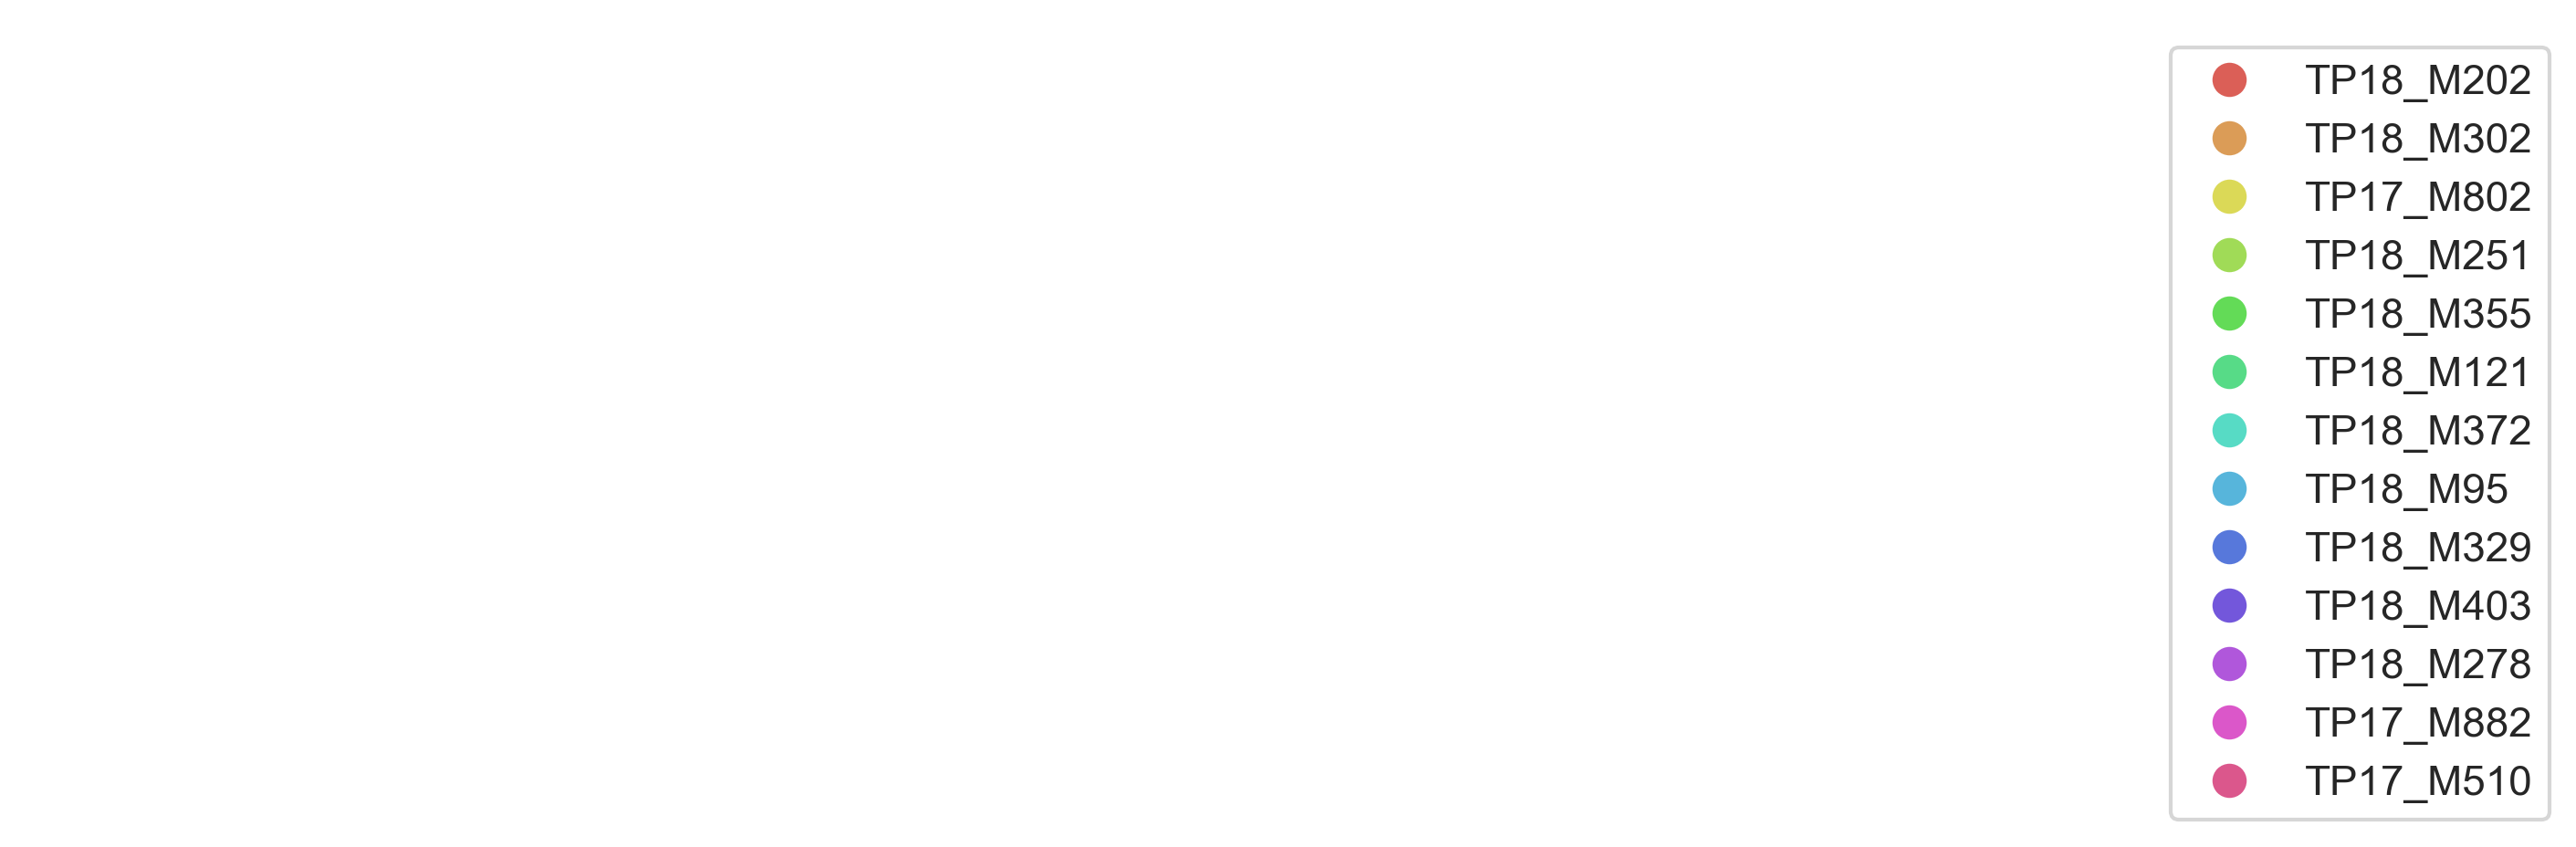

In [46]:
# Create a DataFrame for labels
df_labels = pd.DataFrame({'Label': labels2})

# Map the labels to colors
col_colors = df_labels['Label'].map(lut2)

# Create patches for the legend
patches = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color) for label, color in lut2.items()]

# Plotting
plt.figure(figsize=(10, 2))
for label, color in lut2.items():
    plt.plot([], [], ' ', label=label, marker='o', markersize=10, color=color)

plt.legend(handles=patches, bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.axis('off')
plt.show()

In [47]:
df_p = cluster_df.copy()
df_p['Sample Name'] = df_p.index
df_p['NMF Cluster'] = df_p['NMF Cluster'].astype('str')
df_p = df_p.reset_index(drop=True)

df_p

NMF Cluster Sample Name
0            1   TP17_M510
1            1   TP17_M510
2            1   TP17_M510
3            1   TP17_M510
4            1   TP17_M510
..         ...         ...
92           1   TP18_M403
93           2   TP18_M403
94           1   TP18_M403
95           1   TP18_M403
96           5   TP18_M403

[97 rows x 2 columns]

Text(0, 0.5, 'PBC-PR Number')

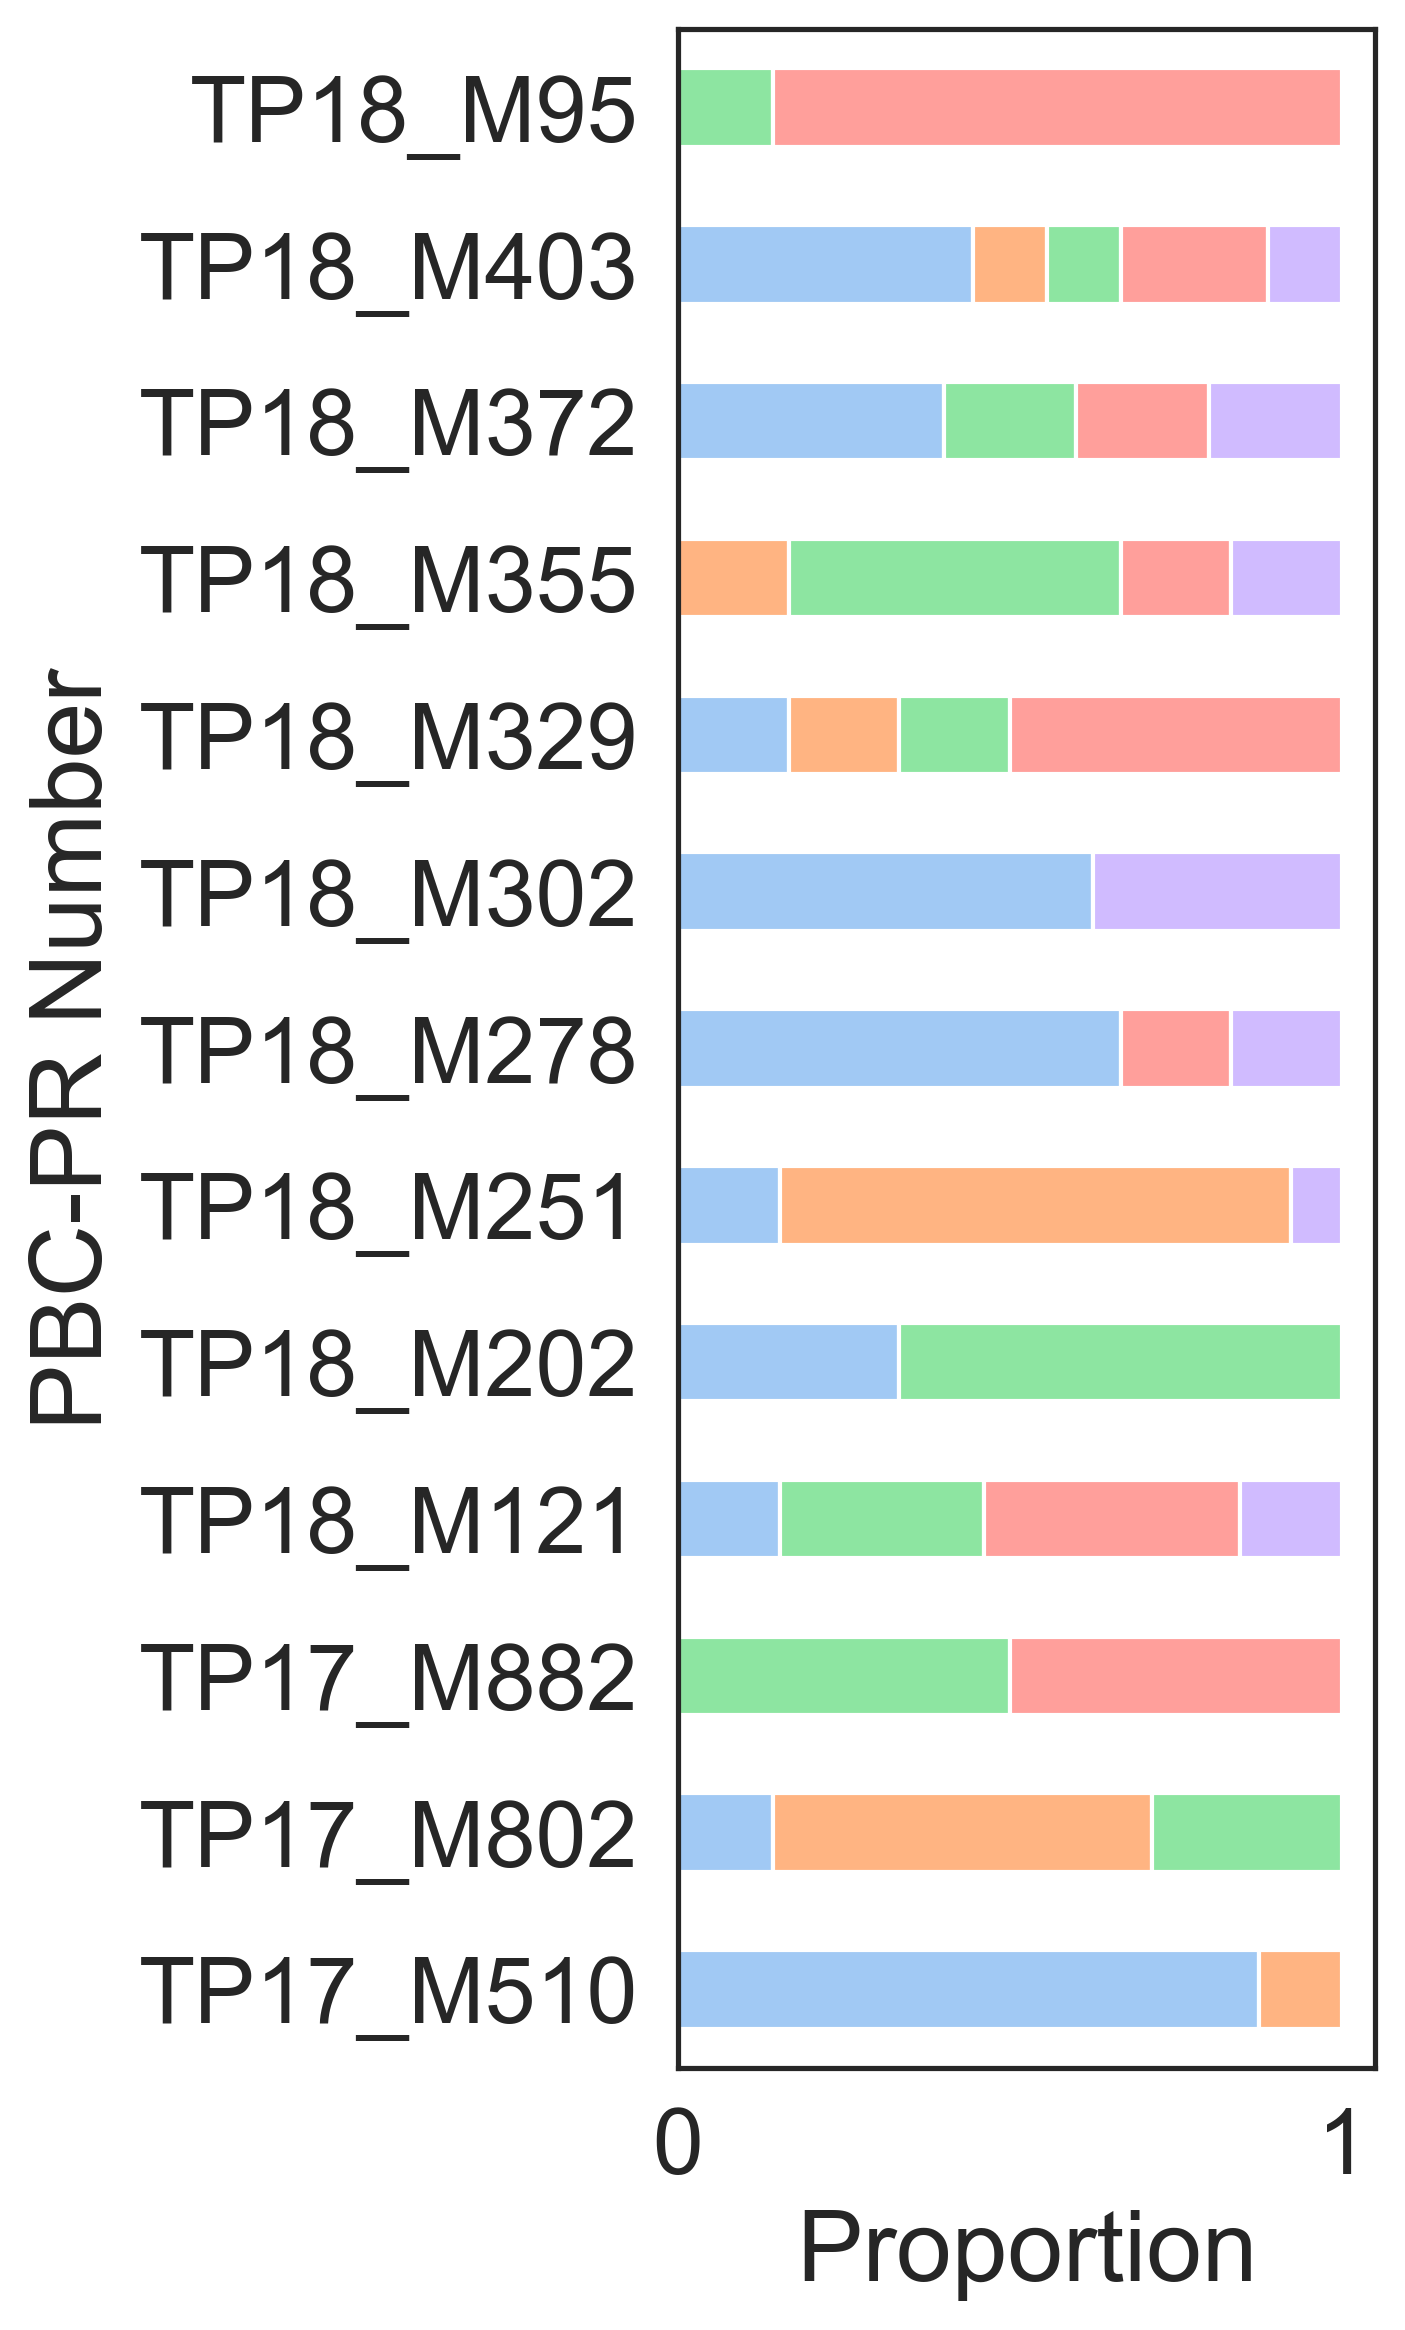

In [48]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.color_palette('pastel',5).as_hex())
sns.set(style='white', font_scale=2)

mat = df_p.groupby(['Sample Name','NMF Cluster']).size().unstack().fillna(0)

# fig,ax = plt.subplots(figsize=(10,3))
# mat.plot(kind='bar', stacked=True, cmap=my_cmap, ax=ax)

# ax.legend(bbox_to_anchor=(.8, 0.5, 0.5, 0.5)) 
# ax.set_title('Number of ROIs for each NMF cluster')
# ax.set_xlabel('')

matpct = mat.div(mat.sum(axis=1), axis=0)

fig,ax = plt.subplots(figsize=(3,9))
matpct.plot(kind='barh', stacked=True, cmap=my_cmap, ax=ax)

ax.get_legend().remove() #ax.legend(bbox_to_anchor=(1.05, 0.5, 0.5, 0.5), title='NMF Cluster') 
ax.set_xlabel('Proportion')
ax.set_ylabel('PBC-PR Number')

In [49]:
dat['NMF Cluster'] = cluster_df['NMF Cluster']
dat

Sample ID Tumor type  Age at diagnosis   Race  Postmenopausal  \
Patient ID                                                                   
TP17_M510   PBC_PR_758        ILC                44  White               0   
TP17_M510   PBC_PR_758        ILC                44  White               0   
TP17_M510   PBC_PR_758        ILC                44  White               0   
TP17_M510   PBC_PR_758        ILC                44  White               0   
TP17_M510   PBC_PR_758        ILC                44  White               0   
...                ...        ...               ...    ...             ...   
TP18_M403   PBC_PR_771        ILC                67  White               1   
TP18_M403   PBC_PR_771        ILC                67  White               1   
TP18_M403   PBC_PR_771        ILC                67  White               1   
TP18_M403   PBC_PR_771        ILC                67  White               1   
TP18_M403   PBC_PR_771        ILC                67  White               1   

            Pathological grade Pathological stage  Ki67  ER   PR  ...  \
Patient ID                                                        ...   
TP17_M510                    2                 1A    15    1   1  ...   
TP17_M510                    2                 1A    15    1   1  ...   
TP17_M510                    2                 1A    15    1   1  ...   
TP17_M510                    2                 1A    15    1   1  ...   
TP17_M510                    2                 1A    15    1   1  ...   
...                        ...                ...   ...  ...  ..  ...   
TP18_M403                    1                 1A     1    1   0  ...   
TP18_M403                    1                 1A     1    1   0  ...   
TP18_M403                    1                 1A     1    1   0  ...   
TP18_M403                    1                 1A     1    1   0  ...   
TP18_M403                    1                 1A     1    1   0  ...   

           Stromal CD8 T cells  Stromal Treg cells Stromal Macrophages  \
Patient ID                                                               
TP17_M510           127.946168            7.311210          428.227992   
TP17_M510           387.288711           10.282001         1104.286928   
TP17_M510           234.587357            0.000000          725.050975   
TP17_M510           307.693544           12.595642          714.352847   
TP17_M510           140.963099           18.656881          842.669113   
...                        ...                 ...                 ...   
TP18_M403            91.229699            8.828681          447.319815   
TP18_M403           500.730778            2.540169         2684.640917   
TP18_M403           296.760512            5.667301          509.541921   
TP18_M403            14.917008            0.000000          415.190065   
TP18_M403            19.569550            0.000000           77.127052   

           Tumor B cells  Tumor CD4 T cells  Tumor CD8 T cells  \
Patient ID                                                       
TP17_M510      44.145958          30.902171           3.433575   
TP17_M510       2.099531           9.237934           2.099531   
TP17_M510       6.438246          17.475240           4.138873   
TP17_M510       0.000000          50.910054          10.717906   
TP17_M510       4.273107          76.559841          12.819322   
...                  ...                ...                ...   
TP18_M403       0.000000          45.406179          19.586979   
TP18_M403       0.000000           0.000000           0.000000   
TP18_M403       0.000000           0.000000           0.000000   
TP18_M403       0.000000           0.000000           0.000000   
TP18_M403       0.000000          35.652580           0.000000   

            Tumor Treg cells  Tumor Macrophages  Tumor PanCK cells  \
Patient ID                                                           
TP17_M510           0.000000          98.592640        4514.169488   
TP17_M510       

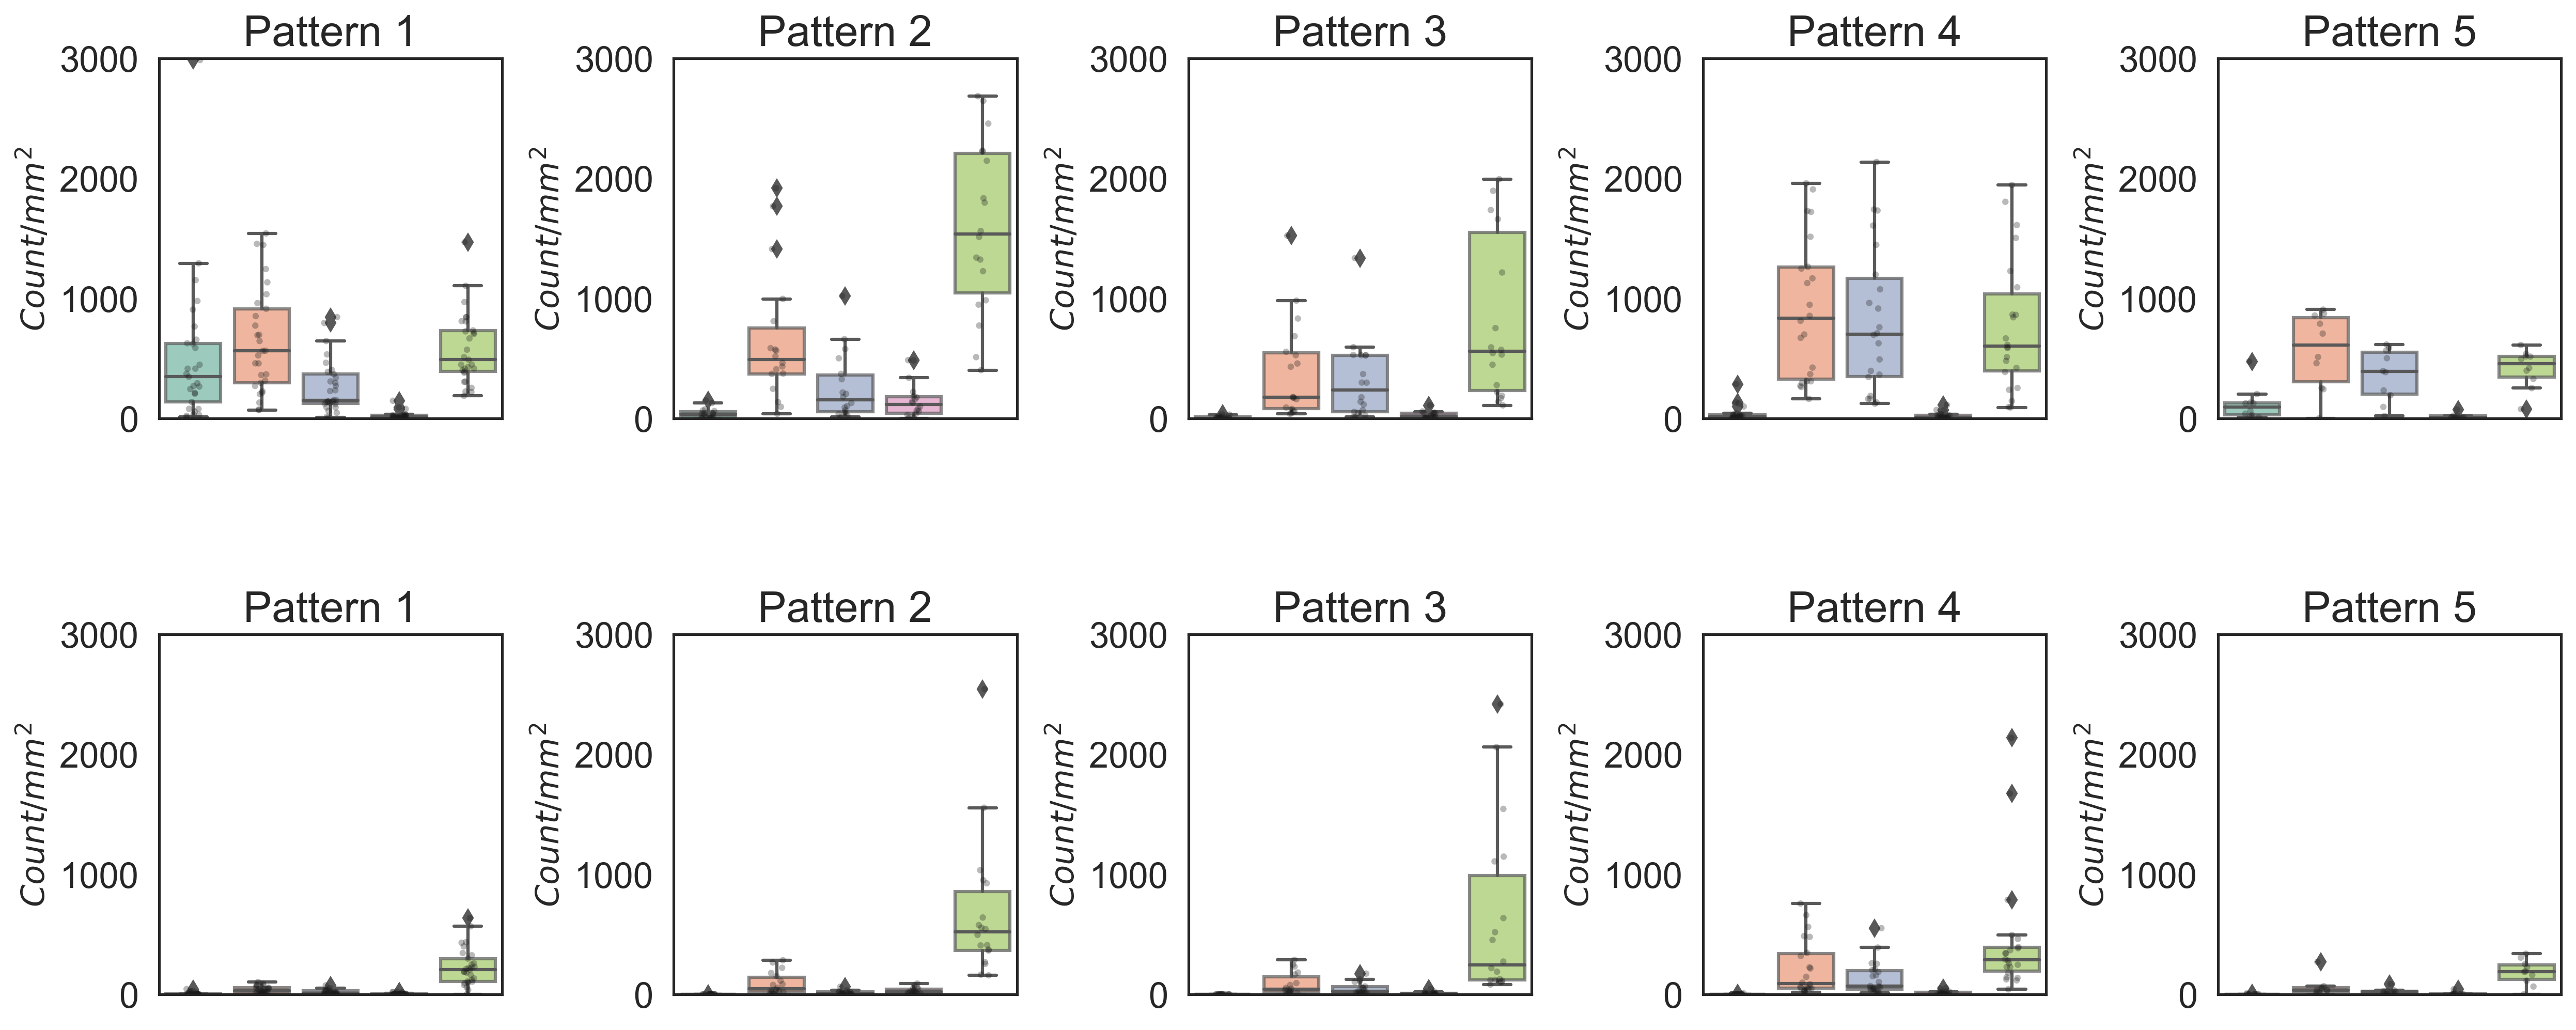

In [55]:
from statannotations.Annotator import Annotator
import matplotlib.gridspec as gridspec

dfp_long = pd.melt(dat, id_vars=['NMF Cluster'], value_vars=sel_cols, var_name='Cell Type', value_name='Expression')
dfp_long['Region'] = dfp_long['Cell Type'].apply(lambda x: 'Stromal' if 'Stromal' in x else 'Tumor')

dfp_long = dfp_long[dfp_long['Cell Type']!='Tumor PanCK cells']

sns.set(style='white', font_scale=1.5)
fig = plt.figure(figsize=(20, 8)) # fig, axes = plt.subplots(ncols=1, nrows=5, figsize=(6,15))
gs = gridspec.GridSpec(nrows=2, ncols=5) 
plt.subplots_adjust(wspace=.5, hspace=.6)

# sel_cols = [
# 'Stromal B cells','Stromal CD4 T cells','Stromal CD8 T cells','Stromal Treg cells','Stromal Macrophages',
# 'Tumor B cells','Tumor CD4 T cells','Tumor CD8 T cells','Tumor Treg cells','Tumor Macrophages',
# ]

clusters = [1,2,3,4,5]
regions = ['Stromal','Tumor']

for i, region in enumerate(regions):
    
    for j, cluster in enumerate(clusters):
    
        ax = fig.add_subplot(gs[i, j])
    
        dfp_tmp = dfp_long[(dfp_long['NMF Cluster']==cluster) & (dfp_long['Region']==region)]

        sns.boxplot(data=dfp_tmp, x='Cell Type', y='Expression', 
                    boxprops=dict(alpha=.7), palette='Set2',
                    ax=ax)

        sns.stripplot(data=dfp_tmp, x='Cell Type', y='Expression',
                    ax=ax, color='k', size=3, alpha=.3)

#     pairs = [(dfp_tmp['NMF Cluster'].unique()[i],dfp_tmp['NMF Cluster'].unique()[j]) \
#                                for i in range(5) for j in range(5) if i<j ]
#     annotator = Annotator(ax, pairs, data=dfp_tmp, x='NMF Cluster', y=name, 
#                           comparisons_correction='fdr_bh')
#     annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
#     annotator.apply_and_annotate()

        ax.set_ylabel('$Count/mm^{2}$', fontsize=15)
        ax.set_xlabel('')
        ax.set_xticklabels('')
        ax.set_ylim([0,3000])
#         ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=45, ha='right')
        ax.set_title(f'Pattern {cluster}', fontsize=20)

p-value annotation legend:
        : 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.659e-06 U_stat=4.730e+02
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:9.985e-03 U_stat=2.420e+02
3 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:3.753e-03 U_stat=9.200e+01
4 vs. 5: Mann-Whitney-Wilcoxon test two-sided, P_val:1.939e-02 U_stat=5.200e+01
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:4.273e-08 U_stat=5.110e+02
2 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:8.595e-01 U_stat=2.050e+02
3 vs. 5: Mann-Whitney-Wilcoxon test two-sided, P_val:1.578e-04 U_stat=1.200e+01
1 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:3.626e-07 U_stat=5.870e+02
2 vs. 5: Mann-Whitney-Wilcoxon test two-sided, P_val:3.264e-02 U_stat=4.500e+01
1 vs. 5: Mann-Whitney-Wilcoxon test two-sided, P_val:5.960e-03 U_stat=2.310e+02
p-value 

3 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:7.908e-01 U_stat=2.080e+02
4 vs. 5: Mann-Whitney-Wilcoxon test two-sided, P_val:2.427e-01 U_stat=1.370e+02
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:3.555e-02 U_stat=1.695e+02
2 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:1.436e-02 U_stat=2.870e+02
3 vs. 5: Mann-Whitney-Wilcoxon test two-sided, P_val:1.341e-01 U_stat=1.205e+02
1 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:1.406e-01 U_stat=2.470e+02
2 vs. 5: Mann-Whitney-Wilcoxon test two-sided, P_val:5.161e-03 U_stat=1.475e+02
1 vs. 5: Mann-Whitney-Wilcoxon test two-sided, P_val:7.689e-01 U_stat=1.535e+02
p-value annotation legend:
        : 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:7.127e-05 U_stat=7.900e+01
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.787e-01 U_stat=2.050e+02
3 vs. 4:

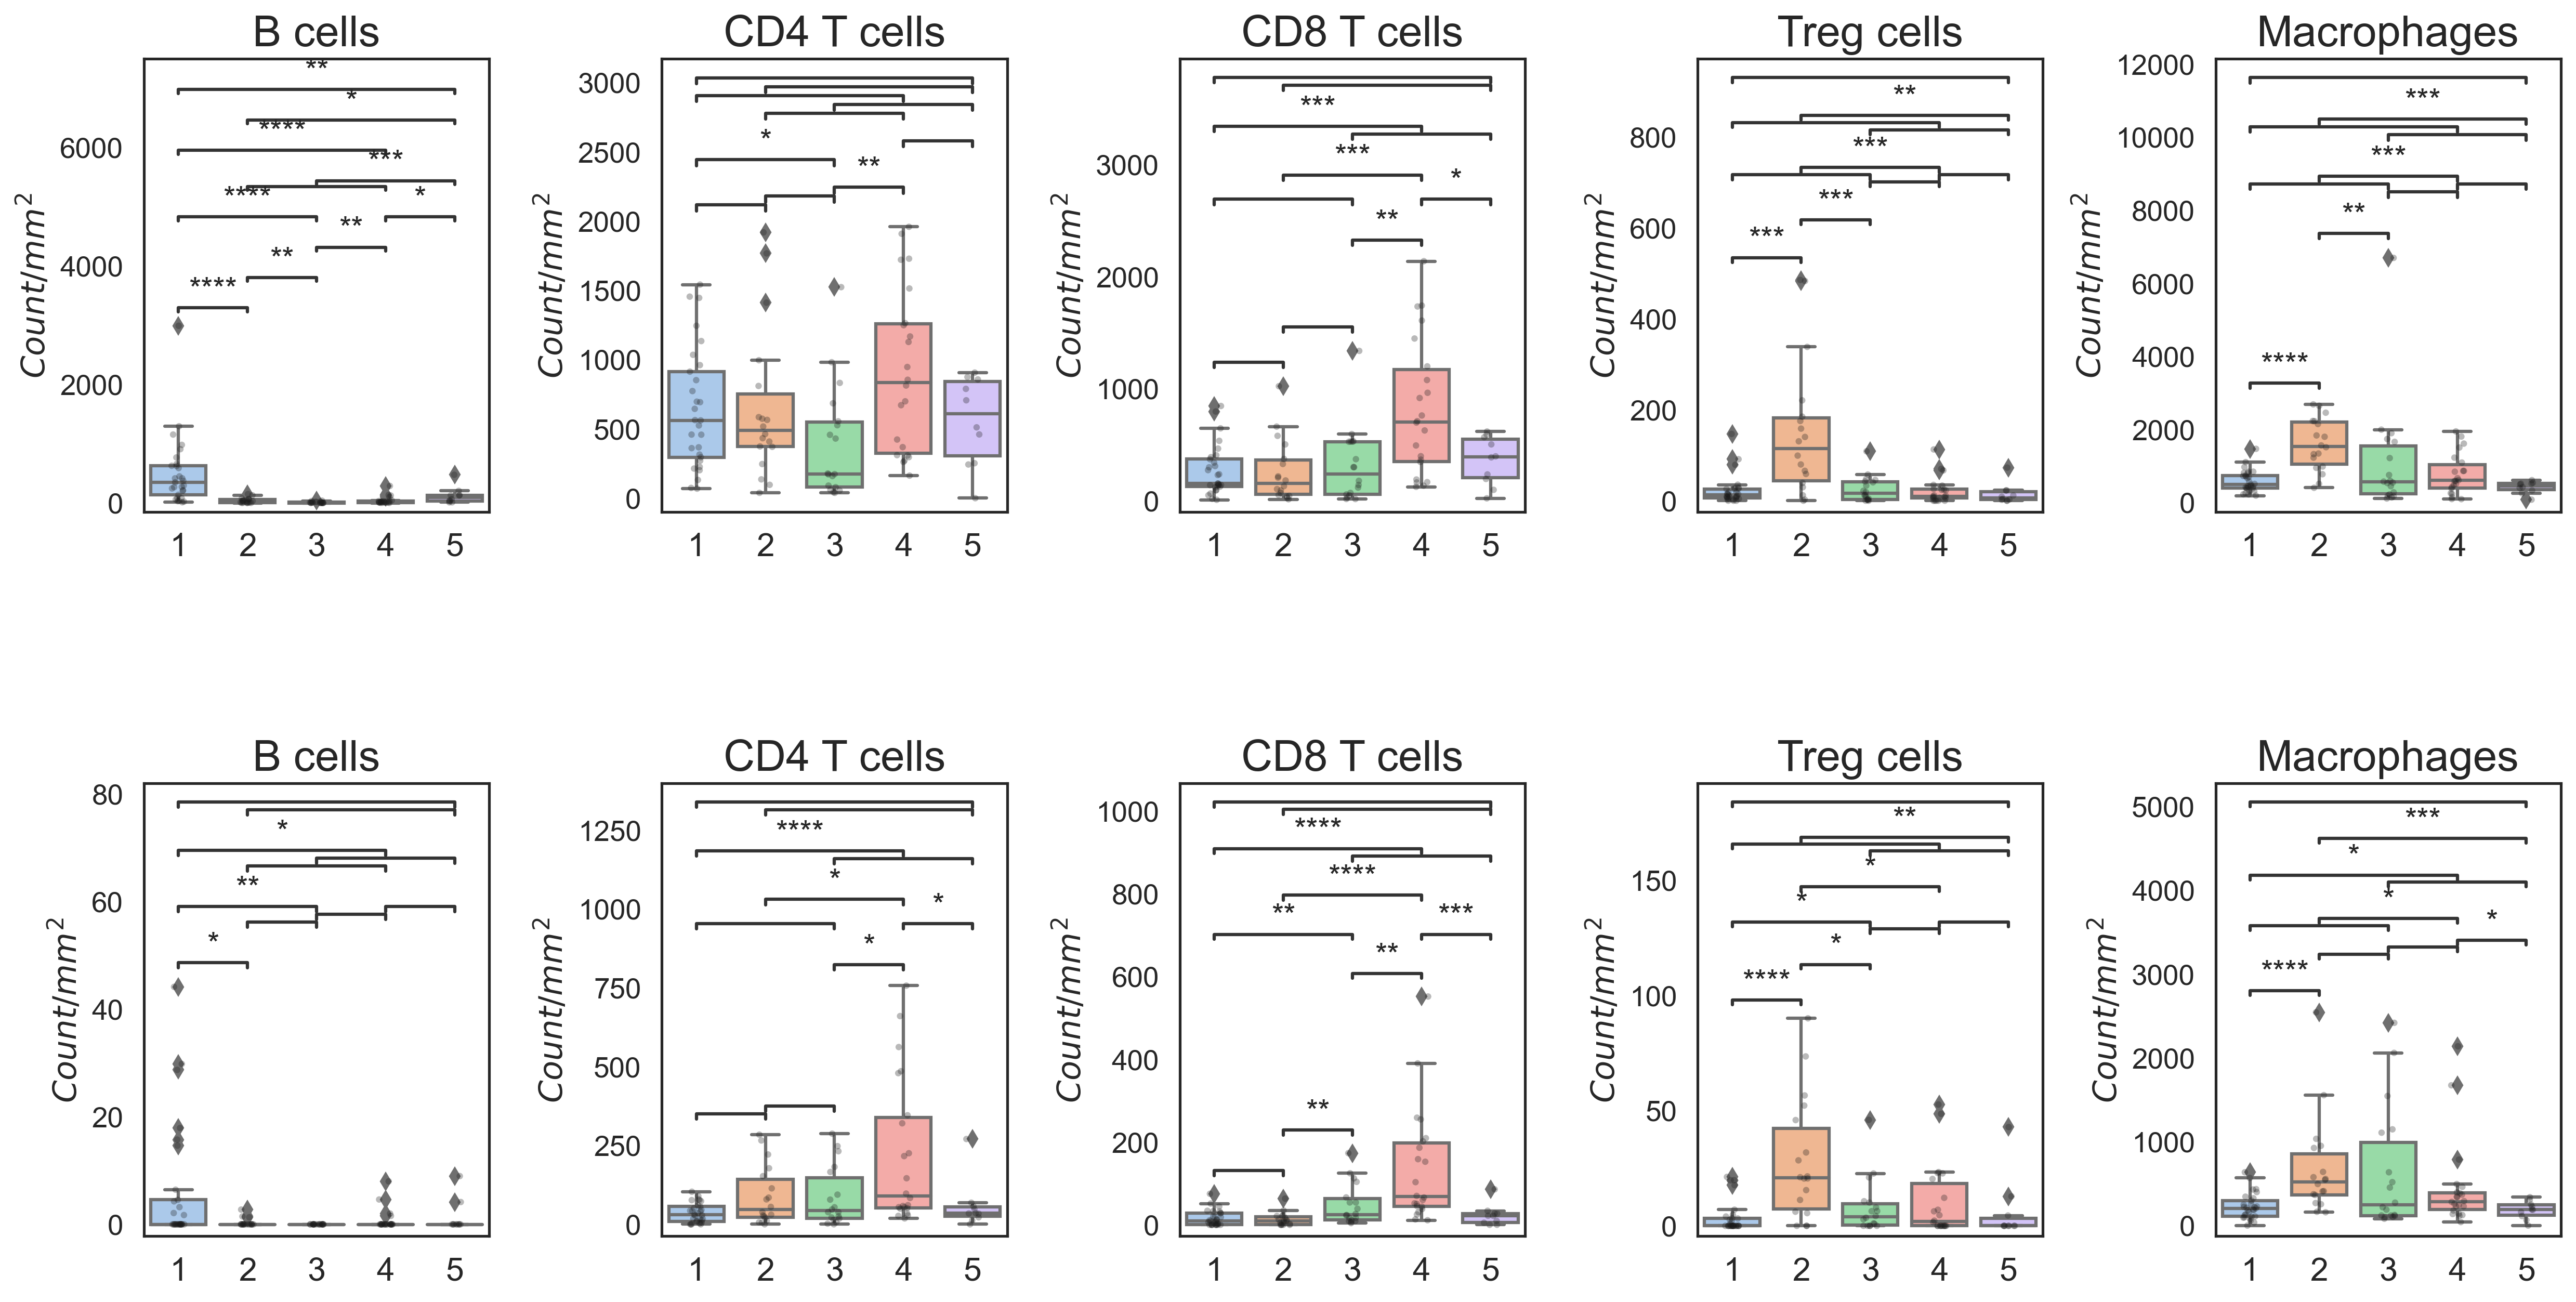

In [60]:
from statannotations.Annotator import Annotator

dfp = dat

sns.set(style='white', font_scale=1.2)
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
plt.subplots_adjust(wspace=.5, hspace=.6)


sel_cols = [
'Stromal B cells','Stromal CD4 T cells','Stromal CD8 T cells','Stromal Treg cells','Stromal Macrophages',
'Tumor B cells','Tumor CD4 T cells','Tumor CD8 T cells','Tumor Treg cells','Tumor Macrophages',
]


pairs_to_label = {
    ''
}
# based on original significant results

for i, name in enumerate(sel_cols):
    
    ax = axes.flatten()[i]
    sns.boxplot(data=dfp, x='NMF Cluster', y=name, 
                boxprops=dict(alpha=1), palette='pastel',
                ax=ax)
    
    sns.stripplot(data=dfp, x='NMF Cluster', y=name, 
                ax=ax, color='k', size=3, alpha=.3)
    
    pairs = [(dfp['NMF Cluster'].unique()[i],dfp['NMF Cluster'].unique()[j]) \
                               for i in range(5) for j in range(5) if i<j ]
    annotator = Annotator(ax, pairs, data=dfp, x='NMF Cluster', y=name, 
                          comparisons_correction='fdr_bh')
    annotator.configure(test='Mann-Whitney', loc='inside', pvalue_thresholds=[[1e-4, "****"], [1e-3, "***"], [1e-2, "**"], [0.05, "*"], [1, ""]])
    annotator.apply_and_annotate()

    ax.set_ylabel('$Count/mm^{2}$', fontsize=15)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    
    
    name_new = name.replace('Stromal ','').replace('Tumor ','')
    ax.set_title(name_new, fontsize=20)

In [52]:
meta = pd.read_csv('../data/classifier/2_class_pam50.csv', index_col=0)
meta['ILC Subtype'] = meta['class_2c']
meta

PAM50     ADH1B     ADH1C   ALDH1L1    AQP7P1     BBOX1   C2orf40  \
TP17_M605  Normal  2.216732  2.243131  3.057598  4.052967  0.086482  0.532357   
TP18_M403  Normal  0.933985  0.902377 -0.642738  1.732441  0.390396  0.222004   
TP17_M383    Her2  0.447186  0.403479 -0.249879  0.766307 -1.139162 -0.897606   
TP18_M202  Normal  0.567718  1.100668 -0.249642 -0.151507  0.059297  0.227326   
TP18_M355  Normal  0.672538  1.513375 -0.648330  0.595814 -0.714074 -0.218622   
TP17_M510    LumB  0.830330  0.131490  0.100744  0.155720  0.828979 -1.804247   
TP17_M802    LumA  0.375887 -0.585520 -0.570657 -0.759950 -0.164619 -1.804247   
TP17_M882    LumB -0.542579 -0.717786 -1.241718 -0.937231 -1.247996 -1.238878   
TP18_M329   Basal -0.073613  0.744683 -0.938536  1.020368  0.408761 -1.155406   
TP17_M378    LumB -2.450577 -1.509660 -1.550600 -0.695033 -1.544119 -1.804247   
TP17_M384    LumA  0.150357  0.363820 -0.256393 -0.254560 -1.544119 -1.215822   
TP17_M559    LumA  0.735329  1.052076  0.226357  0.030718 -1.487956 -0.691991   
TP18_M121  Normal  1.088317  0.974793  0.812011  1.338709  0.331189  0.450679   
TP18_M278  Normal  0.817529  0.929124  0.447646  0.855444  0.324414 -0.611650   
TP18_M302  Normal  1.079029  1.562837  0.335068  0.838566  0.187715  0.648315   
TP18_M372    LumA -0.352259 -0.371564 -0.970231 -0.562181 -1.213064 -0.529141   
TP18_M95     LumB  0.086025 -0.727389 -1.550600 -0.937231 -1.544119 -1.804247   
TP18_M251    LumB -0.630991 -1.735907 -1.208298 -0.875797 -1.544119 -1.673275   
TP17_M622   Basal -0.144736 -0.833726 -1.031509 -0.025977  0.290788 -1.729581   
TP17_M899  Normal  0.255436  0.776637 -0.858541 -0.801629 -0.156329  0.128473   
TP17_M901  Normal  2.277764  5.380004  4.144805  1.012687  1.492712 -1.107871   

              CAPN6   CD300LG    CHRDL1  ...     STAC2     STX11  TMEM132C  \
TP17_M605  1.635425  2.176191  2.184944  ... -0.104408  2.059167  3.019646   
TP18_M403  0.388856  0.012006  0.673717  ...  0.158251  0.553468  0.711447   
TP17_M383  0.244929  0.147138  0.256099  ... -0.791153 -1.536797  0.864486   
TP18_M202  0.811840 -0.355994  0.515171  ...  0.604147  0.201882  0.153577   
TP18_M355  0.809317 -1.017934  1.021178  ... -0.070458 -0.277383  0.553212   
TP17_M510 -1.384409 -0.256367  0.310411  ... -0.129946 -1.502332 -0.776591   
TP17_M802 -1.423712 -1.417968 -0.897053  ... -1.446243 -1.074886 -0.912153   
TP17_M882 -1.583364 -1.391339 -0.740829  ... -1.157850 -0.939527 -0.877570   
TP18_M329 -0.481491 -0.378645  0.249028  ... -0.045833  0.658627 -0.887453   
TP17_M378 -1.591658 -1.417968 -2.025407  ... -1.485269 -2.432829 -1.587066   
TP17_M384 -0.657944 -0.720590 -0.251579  ... -1.044303 -1.632126  0.038893   
TP17_M559 -0.239150  0.112307  0.887136  ... -0.749665  0.519854 -0.171419   
TP18_M121  0.868007  0.035689  1.103727  ...  0.404319  0.025477  1.094350   
TP18_M278  0.904911 -0.566758  1.417727  ...  0.515666  0.227547  0.918322   
TP18_M302  0.787776 -0.098492  0.613780  ...  0.870994 -0.484489  0.480602   
TP18_M372 -1.012996 -1.323841 -0.355782  ... -1.075402 -0.595131 -0.788806   
TP18_M95  -1.059795 -1.417968 -1.536918  ... -1.405681 -2.046498 -1.637376   
TP18_M251 -1.382902 -1.395454 -2.018669  ... -1.134713 -2.174944 -1.194575   
TP17_M622 -0.883408 -0.434175  0.063856  ... -0.582985 -1.588676 -0.731844   
TP17_M899  0.992113 -0.990553  0.671751  ...  0.111440 -1.628143  0.377553   
TP17_M901 -0.745519 -0.789767 -0.713734  ... -1.101833 -1.060206 -0.900982   

               TNMD      TNXB      TP63  pred  dataset           class_2c  \
TP17_M605  2.782020  3.840547  0.161899     1      ILC  Non-proliferative   
TP18_M403 -1.259790  2.591020 -0.545052     1      ILC  Non-proliferative   
TP17_M383 -0.091378  1.674882 -0.475650     2      ILC      Proliferative   
TP18_M202 -0.387166  2.466430  0.299445     0      ILC  Non-proliferative   
TP18_M355  0.780105  2.808701 -0.044340     1      ILC  Non-proliferative   
TP17_M510 -1.069007  1.392548  0.065155     2     

In [53]:
mg = dat[['NMF Cluster']].join(meta[['ILC Subtype']])
tbl = mg.groupby(['ILC Subtype','NMF Cluster']).size().unstack()
tbl

NMF Cluster         1   2   3   4  5
ILC Subtype                         
Non-proliferative  16   2  10   9  8
Proliferative      13  16   8  13  2

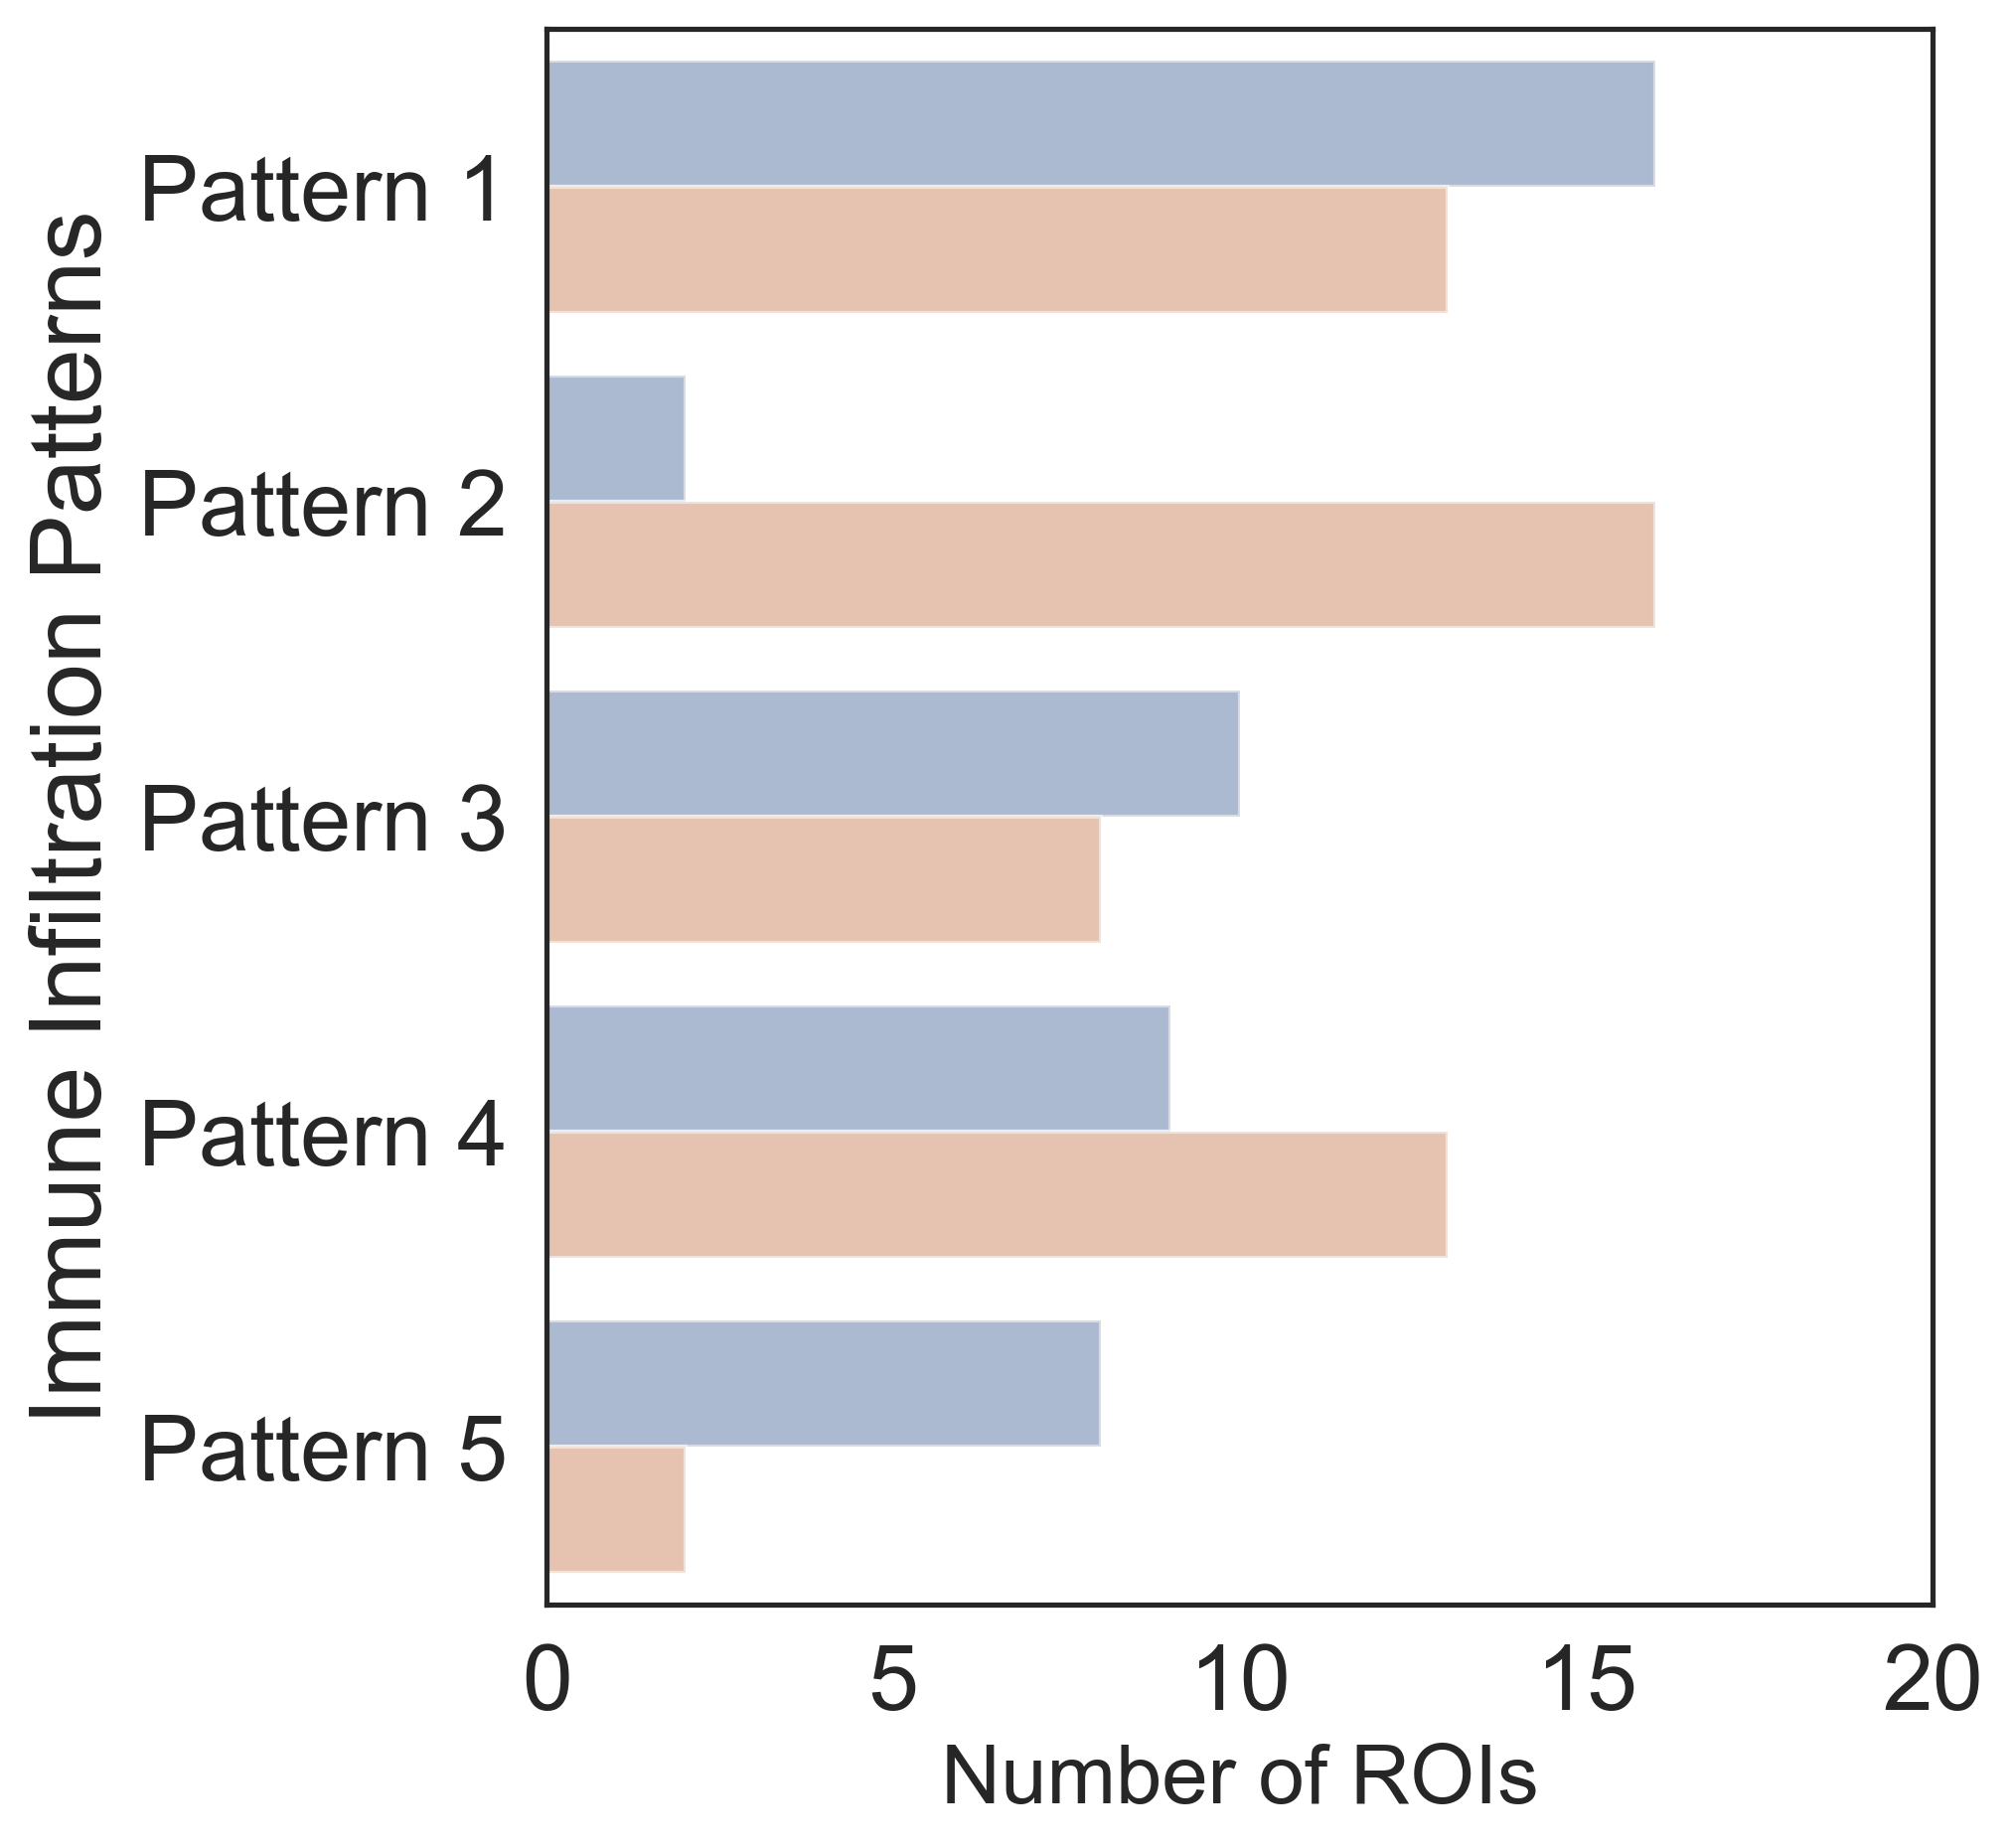

In [54]:
df_p = mg

sns.set(style='white', font_scale=2)
fig, ax = plt.subplots(figsize=(6,7))


df_p['ILC Subtype'] = pd.Categorical(df_p['ILC Subtype'], 
                                categories=['Non-proliferative','Proliferative'],
                                ordered=True)


g = sns.countplot(data=df_p, y='NMF Cluster', 
                  order=[1,2,3,4,5],
                  orient = 'h',
                  alpha=.5, ax=ax, hue='ILC Subtype')
# g.set_yscale("log")

ax.set_xlabel('NMF Immune Cluster')
ax.set_xticks(ax.get_xticks())
# ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')
ax.set_yticklabels(['Pattern 1','Pattern 2','Pattern 3','Pattern 4','Pattern 5'])
ax.set_xlabel('Number of ROIs', fontsize=20)
ax.set_ylabel('Immune Infiltration Patterns')

# ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=11)
ax.get_legend().remove()

# Macrophage Signatures

## Compute TAM Neg

In [31]:
dat1 = pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='vectra_v1')
dat2 = pd.read_csv('../data/raw/Meta_BulkRNAseqCohort_updated.csv')#pd.read_excel('../data/vectra/vectra_v1.xlsx', sheet_name='patient', index_col=0)

dat = pd.merge(dat2,dat1, left_on='Sample ID', right_on='Slide ID')
dat

Patient ID   Sample ID Tumor type  Age at diagnosis   Race  Postmenopausal  \
0   TP17_M510  PBC_PR_758        ILC                44  White               0   
1   TP17_M510  PBC_PR_758        ILC                44  White               0   
2   TP17_M510  PBC_PR_758        ILC                44  White               0   
3   TP17_M510  PBC_PR_758        ILC                44  White               0   
4   TP17_M510  PBC_PR_758        ILC                44  White               0   
..        ...         ...        ...               ...    ...             ...   
92  TP18_M403  PBC_PR_771        ILC                67  White               1   
93  TP18_M403  PBC_PR_771        ILC                67  White               1   
94  TP18_M403  PBC_PR_771        ILC                67  White               1   
95  TP18_M403  PBC_PR_771        ILC                67  White               1   
96  TP18_M403  PBC_PR_771        ILC                67  White               1   

    Pathological grade Pathological stage  Ki67  ER   ...  \
0                    2                 1A    15    1  ...   
1                    2                 1A    15    1  ...   
2                    2                 1A    15    1  ...   
3                    2                 1A    15    1  ...   
4                    2                 1A    15    1  ...   
..                 ...                ...   ...  ...  ...   
92                   1                 1A     1    1  ...   
93                   1                 1A     1    1  ...   
94                   1                 1A     1    1  ...   
95                   1                 1A     1    1  ...   
96                   1                 1A     1    1  ...   

    Stromal CD4 T cells Stromal CD8 T cells  Stromal Treg cells  \
0           1445.530589          127.946168            7.311210   
1           1454.560435          387.288711           10.282001   
2            561.699570          234.587357            0.000000   
3           1034.642032          307.693544           12.595642   
4            644.698879          140.963099           18.656881   
..                  ...                 ...                 ...   
92           225.867078           91.229699            8.828681   
93           370.547126          500.730778            2.540169   
94           459.051417          296.760512            5.667301   
95            73.963500           14.917008            0.000000   
96             0.000000           19.569550            0.000000   

   Stromal Macrophages Tumor B cells  Tumor CD4 T cells  Tumor CD8 T cells  \
0           428.227992     44.145958          30.902171           3.433575   
1          1104.286928      2.099531           9.237934           2.099531   
2           725.050975      6.438246          17.475240           4.138873   
3           714.352847      0.000000          50.910054          10.717906   
4           842.669113      4.273107          76.559841          12.819322   
..                 ...           ...                ...                ...   
92          447.319815      0.000000          45.406179          19.586979   
93         2684.640917      0.000000           0.000000           0.000000   
94          509.541921      0.000000           0.000000           0.000000   
95          415.190065      0.000000           0.000000           0.000000   
96           77.127052      0.000000          35.652580           0.000000   

    Tumor Treg cells  Tumor Macrophages  Tumor PanCK cells  
0           0.000000          98.592640        4514.169488  
1           0.839812         122.192678        3987.008507  
2           0.000000          58.404092        4351.334822  
3           2.679477         219.717073        5133.341081  
4           0.000000         399.535542        3477.241151  
..               ...                ...                ...  
92          2.225793         162.037738        4375.464097  
93          0.000000        2544.051463        2228.080271  
94    

In [80]:
sel_cols = [
'Stromal B cells','Stromal CD4 T cells','Stromal CD8 T cells','Stromal Treg cells','Stromal Macrophages',
'Tumor B cells','Tumor CD4 T cells','Tumor CD8 T cells','Tumor Treg cells','Tumor Macrophages',
]

for i, pt in enumerate(dat['Patient ID'].unique()):
    temp = dat[dat['Patient ID']==pt][sel_cols]
    med = pd.DataFrame(temp.median(axis=0), columns=[pt])
    out = med if i==0 else out.join(med)
    
X1 = out.T
X1

Stromal B cells  Stromal CD4 T cells  Stromal CD8 T cells  \
TP17_M510       409.545112           936.798085           271.140450   
TP17_M802        39.246455           831.990124           526.255345   
TP17_M882        18.866986          1345.109066          1266.781240   
TP18_M95          2.836019           854.540233           961.831527   
TP18_M121        21.207763           368.380739           368.886551   
TP18_M202         6.162910           295.826137           151.235180   
TP18_M251        42.631332           517.338341           139.549327   
TP18_M278       208.913351           261.281870           172.023878   
TP18_M302       353.489236           734.849739           187.346072   
TP18_M329        64.895636           902.530032           604.311556   
TP18_M355         1.023019            75.759910            23.942933   
TP18_M372       474.199144           693.029948           338.400987   
TP18_M403        11.334603           225.867078            91.229699   

           Stromal Treg cells  Stromal Macrophages  Tumor B cells  \
TP17_M510           15.626261           906.234462       3.186319   
TP17_M802           47.503077          1659.711156       0.000000   
TP17_M882           57.753448          1620.112984       0.000000   
TP18_M95             5.672038          1227.523639       0.000000   
TP18_M121           22.380845           448.903905       0.000000   
TP18_M202           18.983495           380.619084       0.000000   
TP18_M251          146.759426          1512.282142       0.000000   
TP18_M278            4.787422           279.185145       0.000000   
TP18_M302           12.000347           454.035063       0.000000   
TP18_M329           29.569828           639.178956       0.000000   
TP18_M355            5.517067           364.854602       0.000000   
TP18_M372           11.516980           479.437684       8.967411   
TP18_M403            3.145313           386.521121       0.000000   

           Tumor CD4 T cells  Tumor CD8 T cells  Tumor Treg cells  \
TP17_M510          43.349718           8.474431          1.759644   
TP17_M802         181.931795          28.241975         15.503423   
TP17_M882         303.787599         165.844109         21.896182   
TP18_M95           54.160049          45.226433          0.000000   
TP18_M121          38.710649          26.205744          0.000000   
TP18_M202          18.370207          16.569206          1.080600   
TP18_M251          38.516379           9.823408         21.468145   
TP18_M278          49.610500          27.527116          0.000000   
TP18_M302          14.833961           5.711385          0.000000   
TP18_M329         147.507060         130.311280         13.404322   
TP18_M355           6.368833           8.697501          0.000000   
TP18_M372          73.352942          33.806139          4.483706   
TP18_M403           4.967195           0.000000          0.000000   

           Tumor Macrophages  
TP17_M510         213.366027  
TP17_M802        1034.484941  
TP17_M882        1866.607815  
TP18_M95          368.833014  
TP18_M121         228.097321  
TP18_M202         108.243169  
TP18_M251         410.883348  
TP18_M278         151.788117  
TP18_M302         217.270737  
TP18_M329         243.075707  
TP18_M355         122.702672  
TP18_M372         258.329927  
TP18_M403         100.710151

In [84]:
tpm = pd.read_csv('../data/gex/tpm.csv', index_col=0)

tpm_sel = tpm[X1.index]
tpm_sel = tpm_sel[~tpm_sel.index.duplicated(keep='first')].T

X2 = tpm_sel
X2

A1BG  A1BG-AS1      A1CF         A2M   A2M-AS1     A2ML1  \
TP17_M510  1.874317  4.273530  0.000000  424.826267  4.729715  0.000000   
TP17_M802  4.368952  4.042313  0.000000  180.334420  1.994044  0.000000   
TP17_M882  6.814545  8.348498  0.000000  598.556942  0.410652  0.000000   
TP18_M95   0.000000  2.660658  0.000000  107.485608  0.000000  0.000000   
TP18_M121  5.621954  7.386220  0.000000  467.653846  1.396837  0.142406   
TP18_M202  5.907611  6.239180  0.000000  506.891747  2.555566  0.138953   
TP18_M251  6.093650  5.123453  0.000000   66.549559  0.935610  0.000000   
TP18_M278  7.049682  5.674707  0.000000  427.192727  1.713310  0.000000   
TP18_M302  4.944053  5.285751  0.000000  588.469717  2.258811  0.021422   
TP18_M329  3.001509  3.338333  0.000000  474.668383  7.891853  0.000000   
TP18_M355  4.779306  3.853997  0.048534  538.292350  2.696212  0.043118   
TP18_M372  3.805416  5.309804  0.000000  229.609720  5.845946  0.397324   
TP18_M403  4.161530  6.013481  0.000000  680.840758  4.704603  0.000000   

           A2MP1   A3GALT2     A4GALT     A4GNT  ...     ZWILCH      ZWINT  \
TP17_M510    0.0  0.202227  16.119058  0.000000  ...  21.524850   6.705923   
TP17_M802    0.0  0.109306   8.498735  0.000000  ...  19.866987   6.161871   
TP17_M882    0.0  0.000000  17.987678  0.000000  ...  32.377357  10.722810   
TP18_M95     0.0  0.000000   5.643724  0.000000  ...   8.764306  16.073910   
TP18_M121    0.0  0.895860  20.370756  0.000000  ...  14.451912   3.713391   
TP18_M202    0.0  0.728449  12.942498  0.000000  ...  12.884809   5.166633   
TP18_M251    0.0  0.370403   9.636067  0.000000  ...  31.655611  12.774033   
TP18_M278    0.0  3.071997  16.235575  0.000000  ...  17.687579   6.399450   
TP18_M302    0.0  0.786109   9.061133  0.129739  ...  16.496907   3.972225   
TP18_M329    0.0  0.000000  15.789767  0.000000  ...  19.803697   6.321042   
TP18_M355    0.0  1.017184   8.345415  0.130570  ...  20.084872   4.247517   
TP18_M372    0.0  0.320452   9.167125  0.092553  ...  18.999153   6.021594   
TP18_M403    0.0  0.205258  10.338351  0.474261  ...  17.567449   5.898922   

               ZXDA       ZXDB       ZXDC    ZYG11A     ZYG11B         ZYX  \
TP17_M510  4.094621   6.783477  13.099244  3.487520  12.119955   92.404186   
TP17_M802  4.232995  11.277116  15.249867  6.283484  12.071928  121.954419   
TP17_M882  5.971199  10.092039  13.892281  4.352748  16.170581   73.763824   
TP18_M95   0.998258  13.058068  12.453122  6.413363  11.542753   58.162953   
TP18_M121  7.572635   8.825700  18.522218  2.932573  13.319621  149.630990   
TP18_M202  6.300717   6.934271  17.897887  1.744797  13.515308  158.832283   
TP18_M251  7.514365  10.141303  17.335970  4.577939  12.444578   31.089354   
TP18_M278  6.503449   7.669605  18.291065  6.990213  13.865604  191.003837   
TP18_M302  6.909829  10.547679  16.748315  4.518975  13.531556  134.064759   
TP18_M329  5.564898   4.949567  12.604914  0.090811  11.123041  122.612849   
TP18_M355  5.243332  10.348823  12.835869  2.355170  16.216894  128.956822   
TP18_M372  7.212854   8.860857  14.370459  3.377241  10.911317   94.039326   
TP18_M403  3.308661   7.890027  12.096535  2.949833  14.648493  150.518284   

               ZZEF1       ZZZ3  
TP17_M510  53.739189  30.506444  
TP17_M802  32.756000  36.717976  
TP17_M882  63.099223  39.348018  
TP18_M95   52.262258  61.456427  
TP18_M121  71.620190  44.351072  
TP18_M202  54.792090  48.298092  
TP18_M251  44.725770  31.313777  
TP18_M278  66.179530  42.519927  
TP18_M302  64.524683  47.783995  
TP18_M329  46.290550  33.637951  
TP18_M355  47.445260  58.056034  
TP18_M372  56.991371  43.208002  
TP18_M403  46.049788  39.295235  

[13 rows x 26485 columns]

In [85]:
# 1min
from scipy.stats import spearmanr

corrs, pvals, names = [],[],[]

for name1 in X1.columns:
    for name2 in X2.columns:
        res = spearmanr(X1[name1].values, X2[name2].values)
        name_mg = f'{name1}_{name2}'
        names.append(name_mg)
        corrs.append(res.correlation)
        pvals.append(res.pvalue)
        
from statsmodels.stats.multitest import multipletests
_,fdr,_,_ = multipletests(pvals, method='fdr_bh')

corr_result = pd.DataFrame({'interaction':names, 'spearmanr':corrs,'pvals':pvals}).dropna()
corr_result

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


interaction  spearmanr     pvals
0           Stromal B cells_A1BG  -0.071429  0.816628
1       Stromal B cells_A1BG-AS1   0.016484  0.957376
2           Stromal B cells_A1CF  -0.462910  0.111173
3            Stromal B cells_A2M  -0.263736  0.383937
4        Stromal B cells_A2M-AS1   0.384615  0.194413
...                          ...        ...       ...
264845  Tumor Macrophages_ZYG11A   0.428571  0.143971
264846  Tumor Macrophages_ZYG11B  -0.428571  0.143971
264847     Tumor Macrophages_ZYX  -0.763736  0.002377
264848   Tumor Macrophages_ZZEF1  -0.142857  0.641516
264849    Tumor Macrophages_ZZZ3  -0.241758  0.426176

[216490 rows x 3 columns]

In [86]:
from statsmodels.stats.multitest import multipletests
_,fdr,_,_ = multipletests(corr_result['pvals'].values, method='fdr_bh')
corr_result['FDR'] = fdr

corr_result

interaction  spearmanr     pvals       FDR
0           Stromal B cells_A1BG  -0.071429  0.816628  0.952306
1       Stromal B cells_A1BG-AS1   0.016484  0.957376  0.989872
2           Stromal B cells_A1CF  -0.462910  0.111173  0.583020
3            Stromal B cells_A2M  -0.263736  0.383937  0.812425
4        Stromal B cells_A2M-AS1   0.384615  0.194413  0.673953
...                          ...        ...       ...       ...
264845  Tumor Macrophages_ZYG11A   0.428571  0.143971  0.634665
264846  Tumor Macrophages_ZYG11B  -0.428571  0.143971  0.634665
264847     Tumor Macrophages_ZYX  -0.763736  0.002377  0.155208
264848   Tumor Macrophages_ZZEF1  -0.142857  0.641516  0.908669
264849    Tumor Macrophages_ZZZ3  -0.241758  0.426176  0.835335

[216490 rows x 4 columns]

In [87]:
corr_result['cell'] = [x.split('_')[0] for x in corr_result['interaction']]
corr_result['gene'] = [x.split('_')[1] for x in corr_result['interaction']]

corr_result

interaction  spearmanr     pvals       FDR  \
0           Stromal B cells_A1BG  -0.071429  0.816628  0.952306   
1       Stromal B cells_A1BG-AS1   0.016484  0.957376  0.989872   
2           Stromal B cells_A1CF  -0.462910  0.111173  0.583020   
3            Stromal B cells_A2M  -0.263736  0.383937  0.812425   
4        Stromal B cells_A2M-AS1   0.384615  0.194413  0.673953   
...                          ...        ...       ...       ...   
264845  Tumor Macrophages_ZYG11A   0.428571  0.143971  0.634665   
264846  Tumor Macrophages_ZYG11B  -0.428571  0.143971  0.634665   
264847     Tumor Macrophages_ZYX  -0.763736  0.002377  0.155208   
264848   Tumor Macrophages_ZZEF1  -0.142857  0.641516  0.908669   
264849    Tumor Macrophages_ZZZ3  -0.241758  0.426176  0.835335   

                     cell      gene  
0         Stromal B cells      A1BG  
1         Stromal B cells  A1BG-AS1  
2         Stromal B cells      A1CF  
3         Stromal B cells       A2M  
4         Stromal B cells   A2M-AS1  
...                   ...       ...  
264845  Tumor Macrophages    ZYG11A  
264846  Tumor Macrophages    ZYG11B  
264847  Tumor Macrophages       ZYX  
264848  Tumor Macrophages     ZZEF1  
264849  Tumor Macrophages      ZZZ3  

[216490 rows x 6 columns]

## Check TAM Neg

In [109]:
corr_result = pd.read_csv('../data/corr/spearmanr_pairwise.csv')

sel = corr_result[corr_result['FDR']<0.05]
print(sel.shape)

sel['cell'] = [x.split('_')[0] for x in sel['interaction']]
sel['gene'] = [x.split('_')[1] for x in sel['interaction']]
sel['Correlation'] = ['Positive' if x>0 else 'Negative' if x<0 else 'None' for x in sel['spearmanr']]

Counter(sel['cell'])

(651, 7)


Counter({'Stromal B cells': 1,
         'Stromal CD4 T cells': 29,
         'Stromal CD8 T cells': 10,
         'Stromal Treg cells': 12,
         'Stromal Macrophages': 466,
         'Tumor B cells': 2,
         'Tumor CD4 T cells': 7,
         'Tumor CD8 T cells': 2,
         'Tumor Treg cells': 50,
         'Tumor Macrophages': 72})

<Axes: >

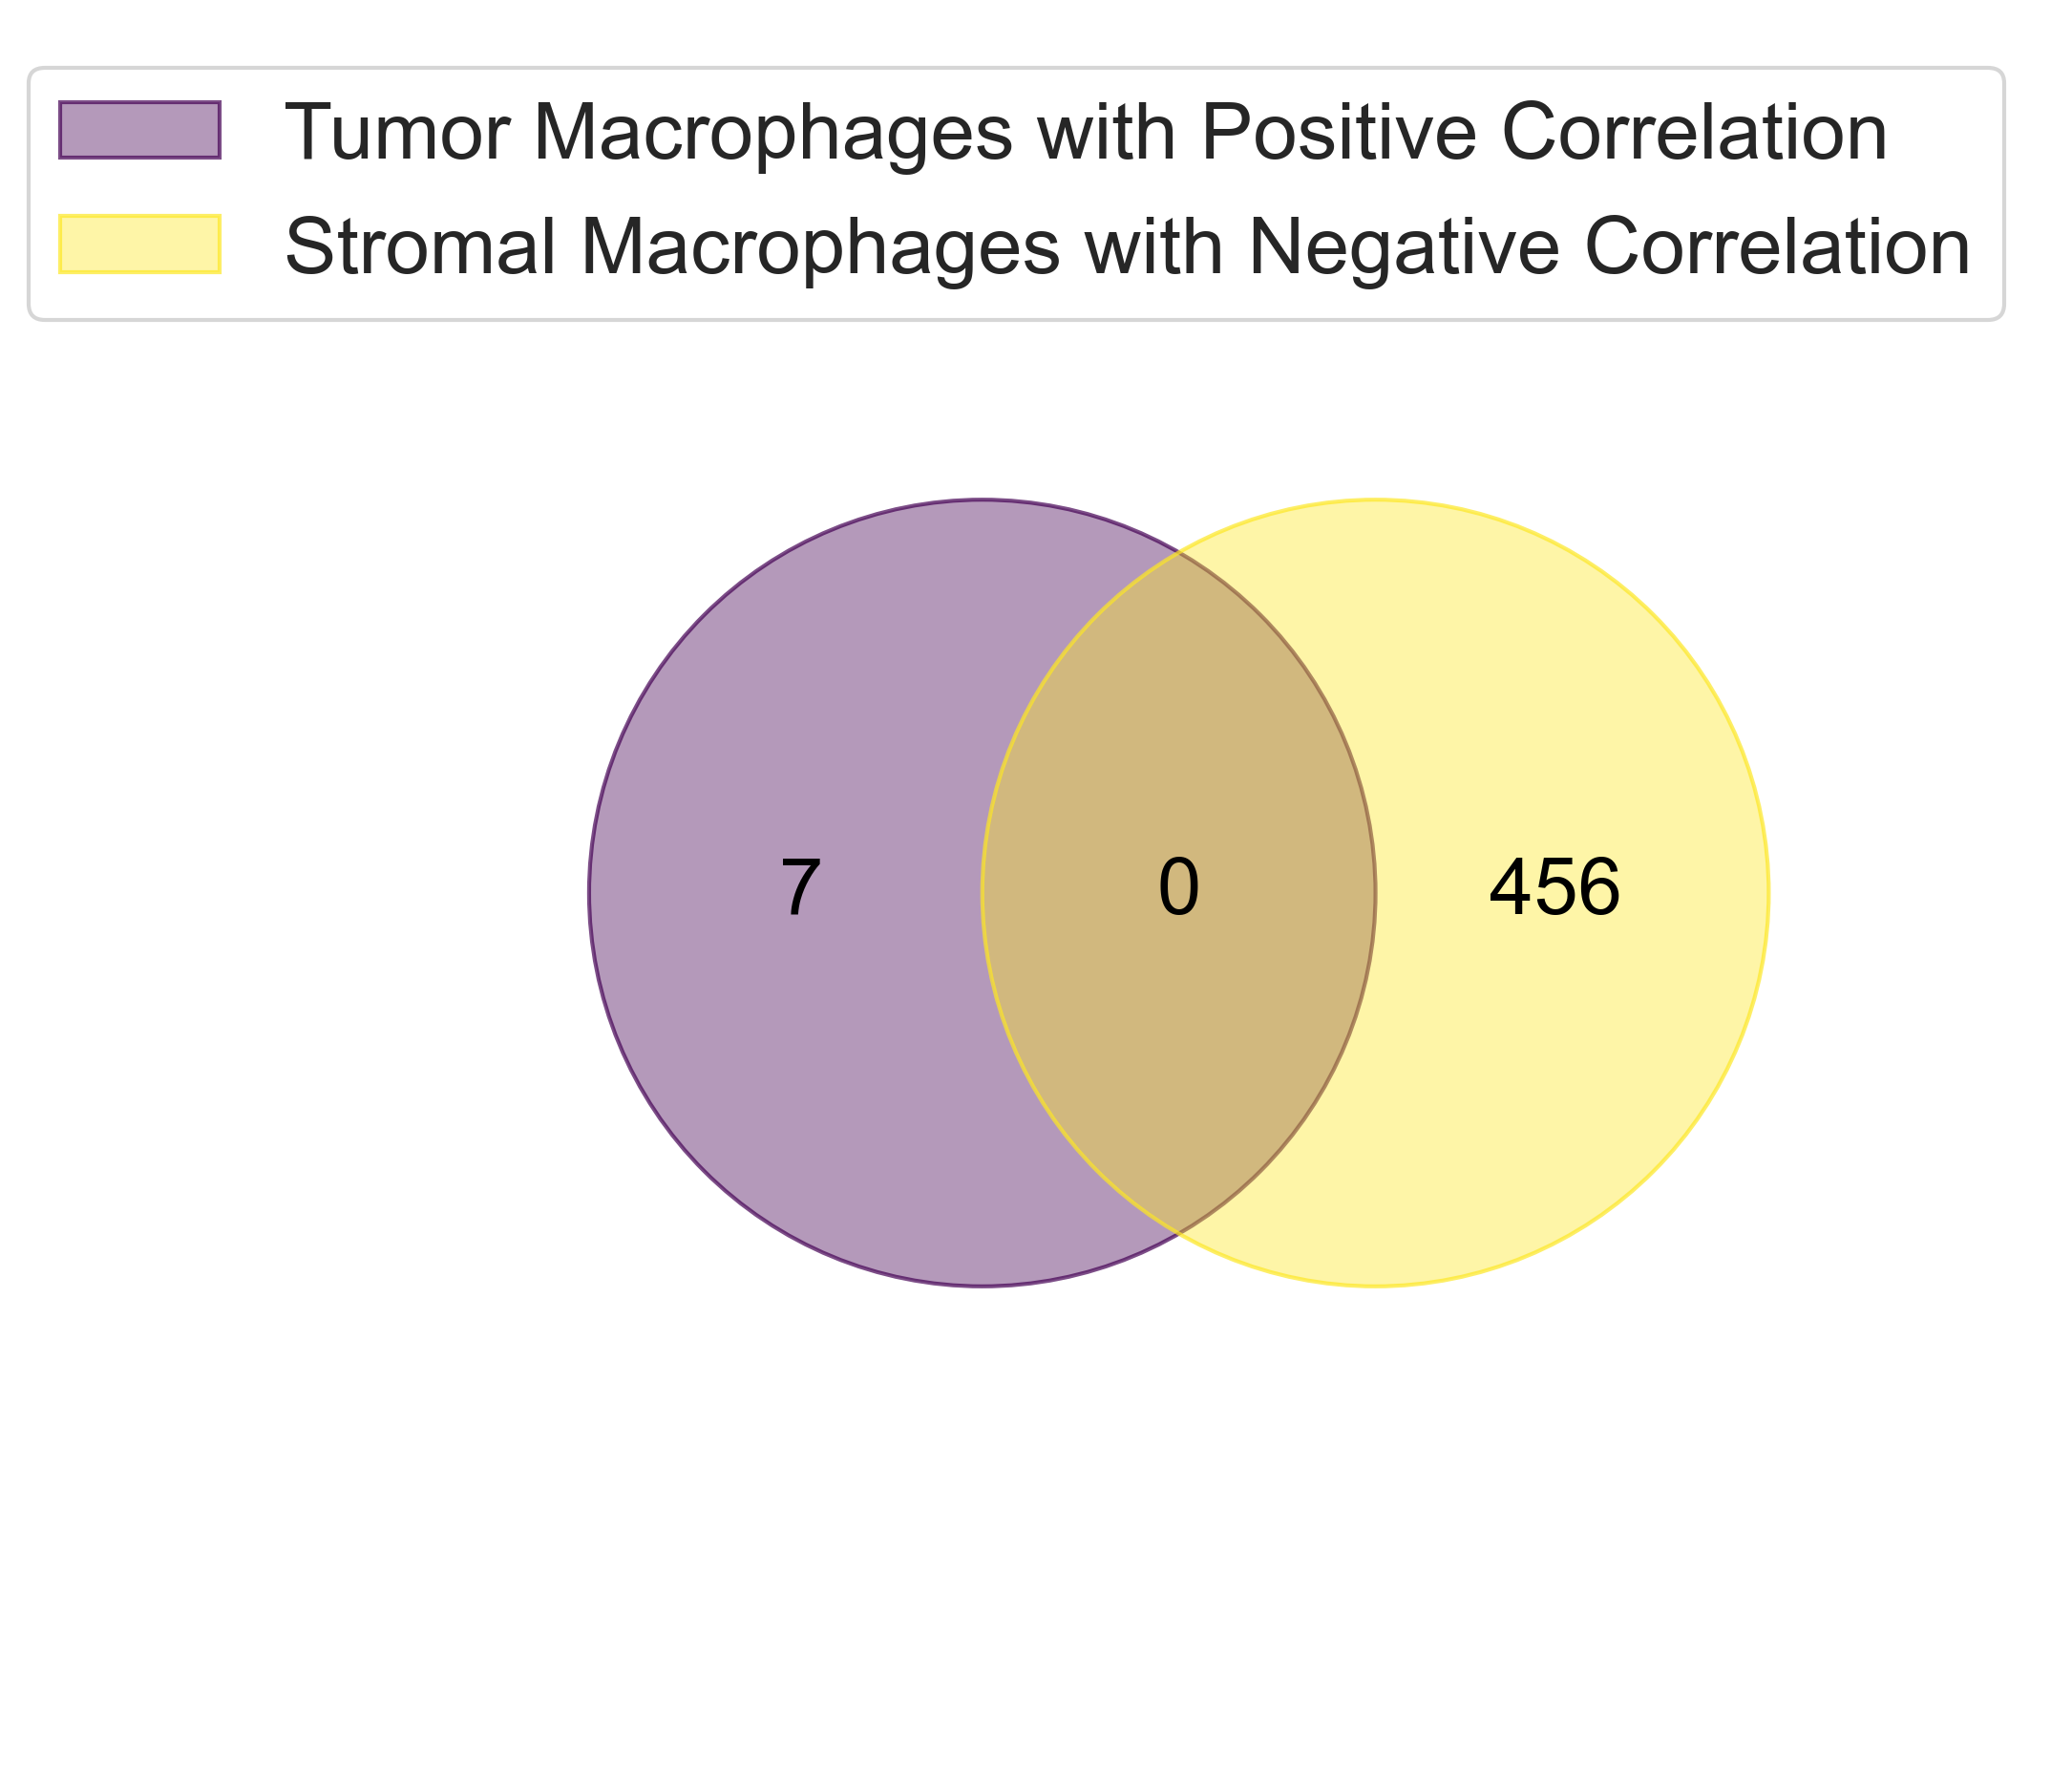

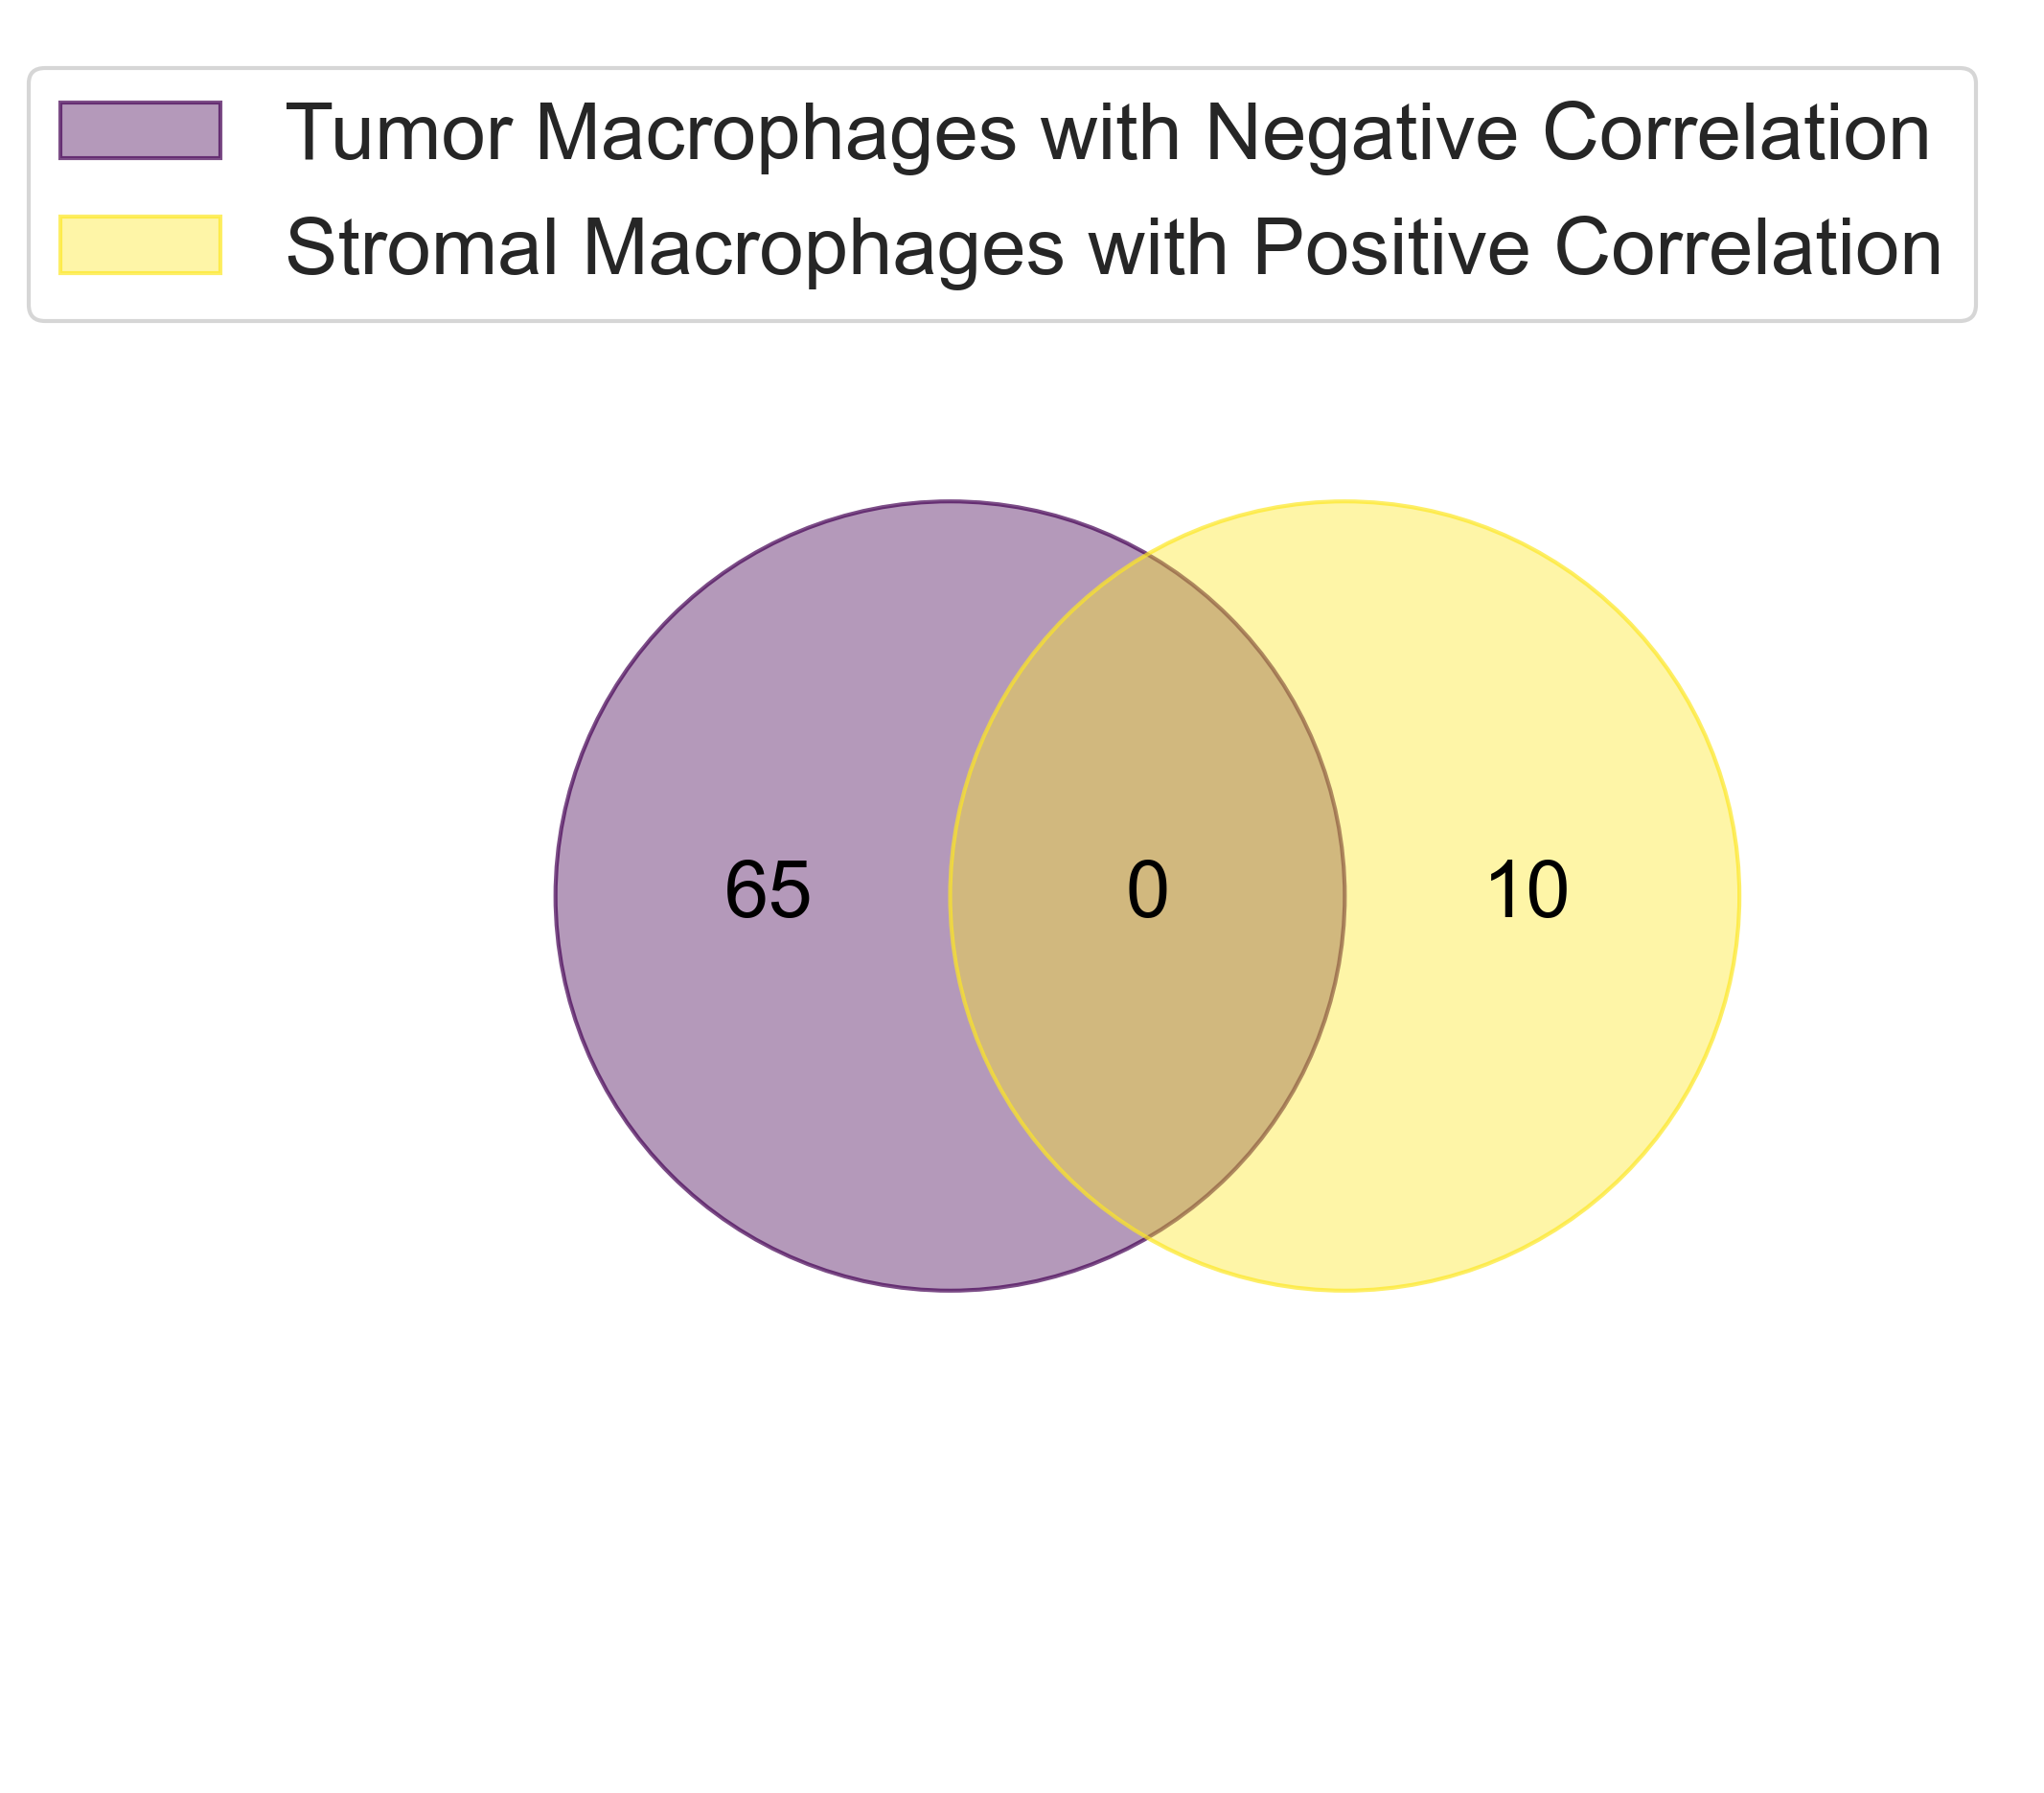

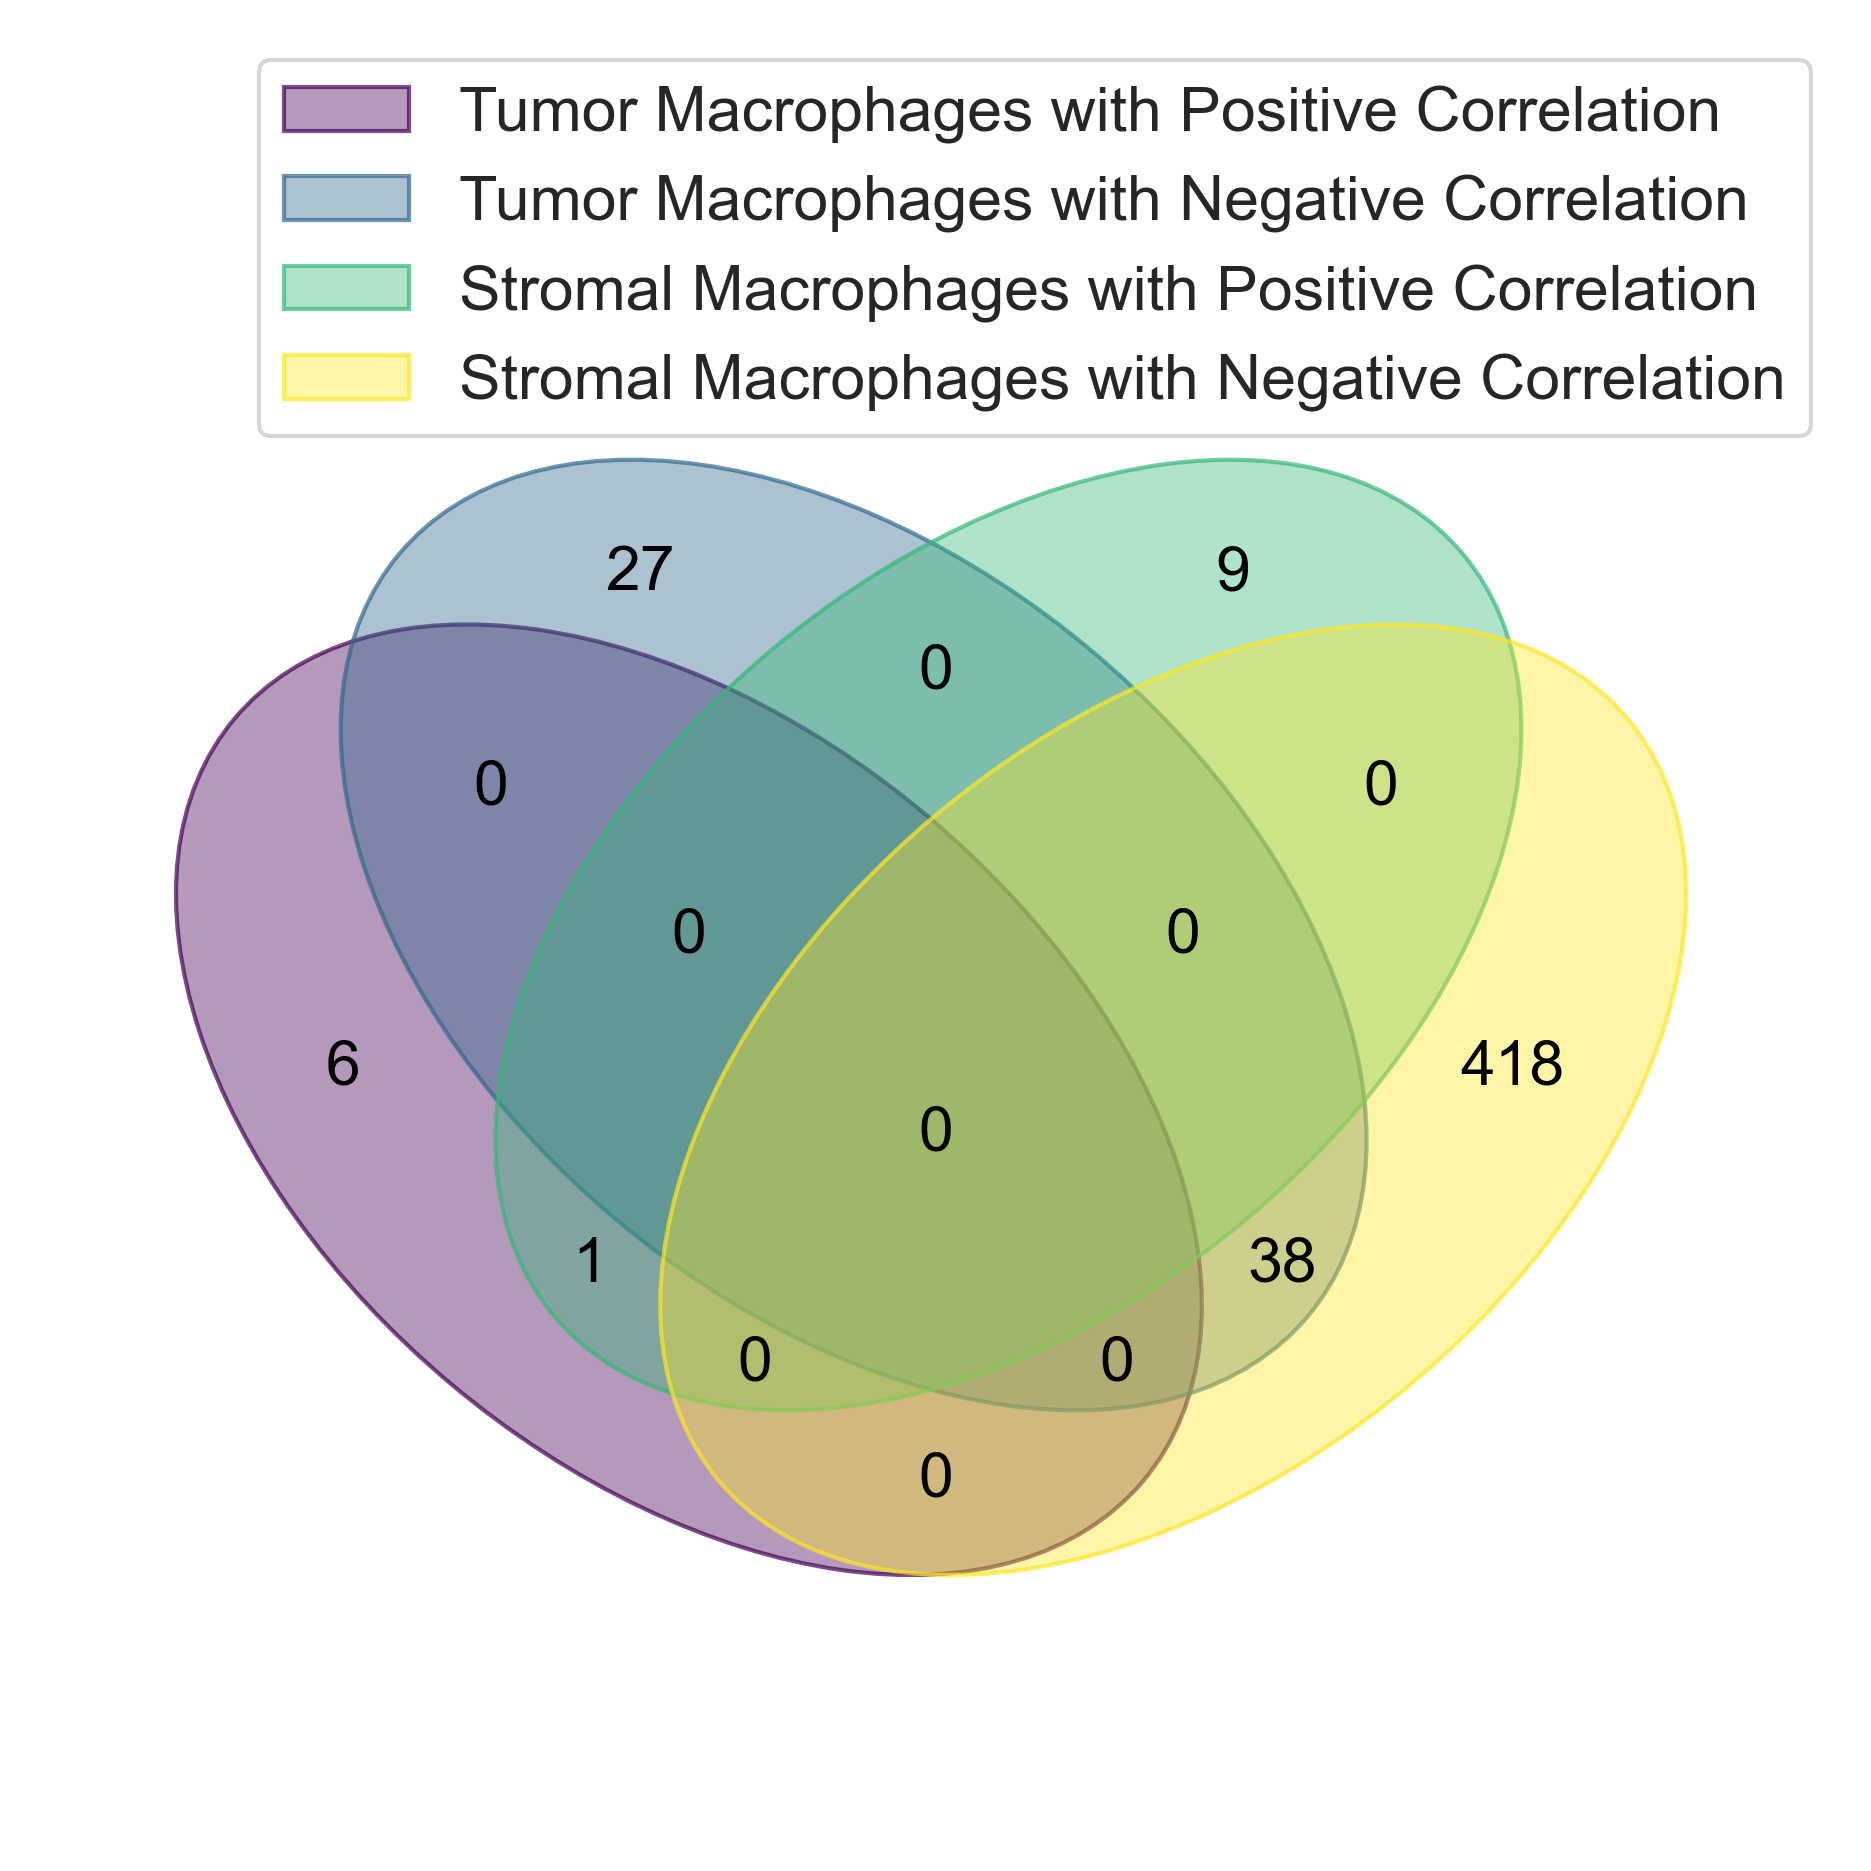

In [110]:
from venn import venn

gset_11 = sel[(sel['cell']=='Tumor Macrophages') & (sel['Correlation']=='Positive')]
gset_12 = sel[(sel['cell']=='Tumor Macrophages') & (sel['Correlation']=='Negative')]
gset_21 = sel[(sel['cell']=='Stromal Macrophages') & (sel['Correlation']=='Positive')]
gset_22 = sel[(sel['cell']=='Stromal Macrophages') & (sel['Correlation']=='Negative')]


ma_genes = {
    'Tumor Macrophages with Positive Correlation':set(gset_11['gene'].values),
    'Stromal Macrophages with Negative Correlation':set(gset_22['gene'].values)
}
venn(ma_genes, fontsize=20)

ma_genes = {
    'Tumor Macrophages with Negative Correlation':set(gset_12['gene'].values),
    'Stromal Macrophages with Positive Correlation':set(gset_21['gene'].values),
}
venn(ma_genes, fontsize=20)


ma_genes = {
    'Tumor Macrophages with Positive Correlation':set(gset_11['gene'].values),
    'Tumor Macrophages with Negative Correlation':set(gset_12['gene'].values),
    'Stromal Macrophages with Positive Correlation':set(gset_21['gene'].values),
    'Stromal Macrophages with Negative Correlation':set(gset_22['gene'].values)
}
venn(ma_genes, fontsize=15)

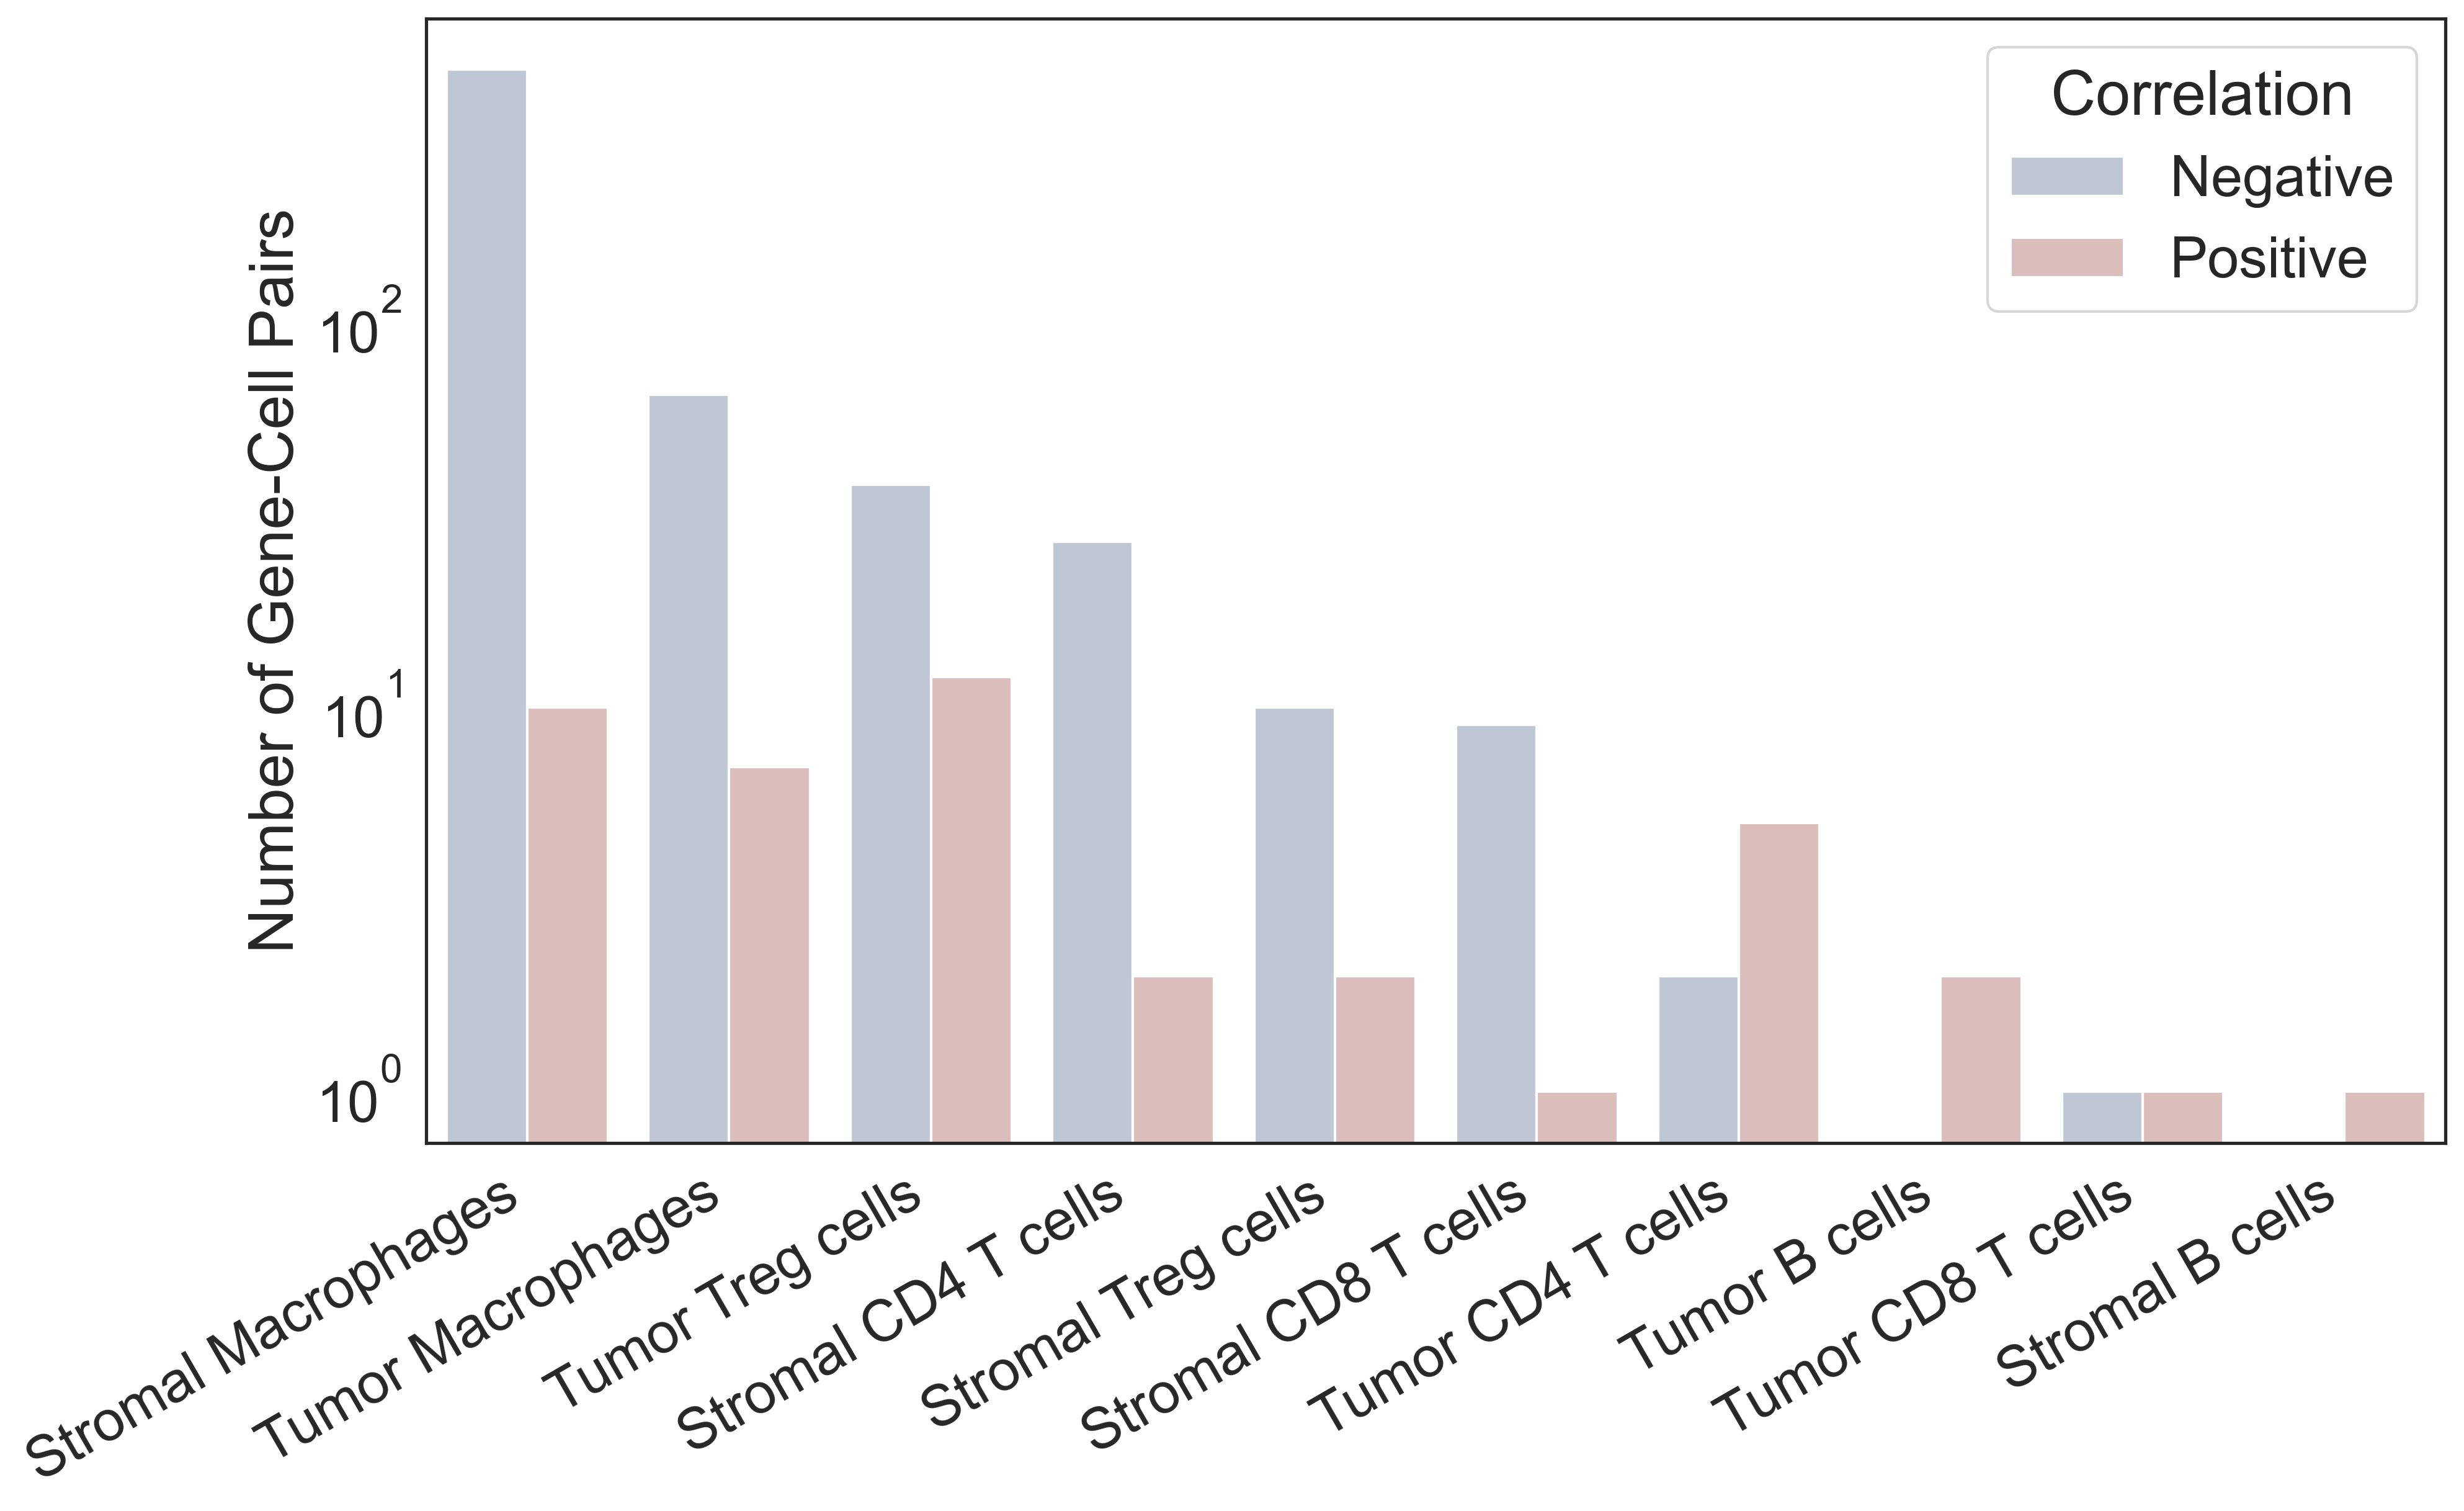

In [112]:
df_p = sel#[sel['spearmanr']>0]

sns.set(style='white', font_scale=2)

fig, ax = plt.subplots(figsize=(14,8))
g = sns.countplot(data=df_p, x='cell', 
                  order=df_p['cell'].value_counts().index, \
                  alpha=1, ax=ax, 
                  hue='Correlation', hue_order=['Negative','Positive'], palette='vlag')
g.set_yscale("log")

ax.set_xlabel('')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_ylabel('Number of Gene-Cell Pairs')

ax.legend(title='Correlation',loc='upper right', bbox_to_anchor=(1, 1))

In [92]:
ma_predictors = sel[sel['cell'].isin(['Stromal Macrophages','Tumor Macrophages'])]
print(sum(ma_predictors['spearmanr']>0), ma_predictors.shape[0])

ma_neg_predictors = ma_predictors[ma_predictors['spearmanr']<0]
print(len(ma_neg_predictors['gene'].unique()))

17 538
483


In [94]:
genes = ma_neg_predictors['gene'].unique()

with open('../data/tamneg/tam_neg_signature.txt','w') as f:
    for g in genes:
        f.write(f'{g}\n')
        

Go to `https://maayanlab.cloud/Enrichr/`

Run EnrichR with `../data/tamneg/tam_neg_signature.txt`, download corresponding files

- GO_Cellular_Component_2023_table.txt,
- Reactome_2022_table.txt,
- GO_Biological_Process_2023_table.txt,
- KEGG_2021_Human_table.txt,
- GO_Molecular_Function_2023_table.txt

In [95]:
glob('../data/tamneg/*20*')

['../data/tamneg/GO_Cellular_Component_2023_table.txt',
 '../data/tamneg/Reactome_2022_table.txt',
 '../data/tamneg/GO_Biological_Process_2023_table.txt',
 '../data/tamneg/KEGG_2021_Human_table.txt',
 '../data/tamneg/GO_Molecular_Function_2023_table.txt']

In [105]:
out = pd.DataFrame()

for fpath in glob('../data/tamneg/*20*'):
    
    name = os.path.basename(fpath).replace('_2023_table.txt','').replace('_2021_Human_table.txt','').replace('_2022_table.txt','').replace('_',' ')
    print(name)
    
    df = pd.read_csv(fpath, sep='\t')
    df['Gene_set'] = [name]*df.shape[0]
    out = pd.concat((out, df))
    
out

GO Cellular Component
Reactome
GO Biological Process
KEGG
GO Molecular Function


Term Overlap       P-value  \
0    Collagen-Containing Extracellular Matrix (GO:0...  48/373  1.833190e-21   
1                 Cell-Substrate Junction (GO:0030055)  30/395  3.544290e-08   
2                          Focal Adhesion (GO:0005925)  29/387  8.030618e-08   
3            Polymeric Cytoskeletal Fiber (GO:0099513)  19/265  2.604753e-05   
4                             Golgi Lumen (GO:0005796)  11/100  2.974593e-05   
..                                                 ...     ...           ...   
342                          mRNA Binding (GO:0003729)   3/282  9.681450e-01   
343      Cysteine-Type Peptidase Activity (GO:0008234)   1/144  9.707833e-01   
344     Ubiquitin Protein Ligase Activity (GO:0061630)   3/311  9.815607e-01   
345  Ubiquitin-Like Protein Ligase Activity (GO:006...   3/319  9.841829e-01   
346  Ubiquitin-Protein Transferase Activity (GO:000...   3/412  9.975118e-01   

     Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0        3.758039e-19            0                     0    6.516117   
1        3.632897e-06            0                     0    3.474916   
2        5.487589e-06            0                     0    3.418471   
3        1.219583e-03            0                     0    3.207781   
4        1.219583e-03            0                     0    5.087317   
..                ...          ...                   ...         ...   
342      9.792495e-01            0                     0    0.430959   
343      9.792495e-01            0                     0    0.281084   
344      9.870274e-01            0                     0    0.389793   
345      9.870274e-01            0                     0    0.379767   
346      9.975118e-01            0                     0    0.291993   

     Combined Score                                              Genes  \
0        311.133037  TNXB;COL16A1;SERPINE2;LAMA2;COL14A1;ELN;LAMA4;...   
1         59.613377  LRP1;NEXN;ILK;EGFR;ADD1;AKAP12;LIMA1;FLRT2;FLN...   
2         55.849001  LRP1;NEXN;ILK;EGFR;ADD1;AKAP12;LIMA1;FLRT2;FLN...   
3         33.860017  ANXA1;TPM4;MX2;LMOD1;ARHGAP6;MID1;DNM1;DNM3;TU...   
4         53.024178  MMP16;LUM;PROS1;OMD;OGN;GOLIM4;CSPG4;PRELP;PCS...   
..              ...                                                ...   
342        0.013952                                 SAMD4A;RBMS2;RBMS3   
343        0.008335                                               CTSK   
344        0.007255                                HERC3;RNF216;LONRF1   
345        0.006055                                HERC3;RNF216;LONRF1   
346        0.000727                                HERC3;RNF216;LONRF1   

                  Gene_set  
0    GO Cellular Component  
1    GO Cellular Component  
2    GO Cellular Component  
3    GO Cellular Component  
4    GO Cellular Component  
..                     ...  
342  GO Molecular Function  
343  GO Molecular Function  
344  GO Molecular Function  
345  GO Molecular Function  
346  GO Molecular Function  

[3792 rows x 10 columns]

/var/folders/s4/1f8b2fn9053csdysy0gsmzh80000gn/T/ipykernel_1245/1283013303.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20,fontsize=20, ha='right')


Text(0.5, 0, '')

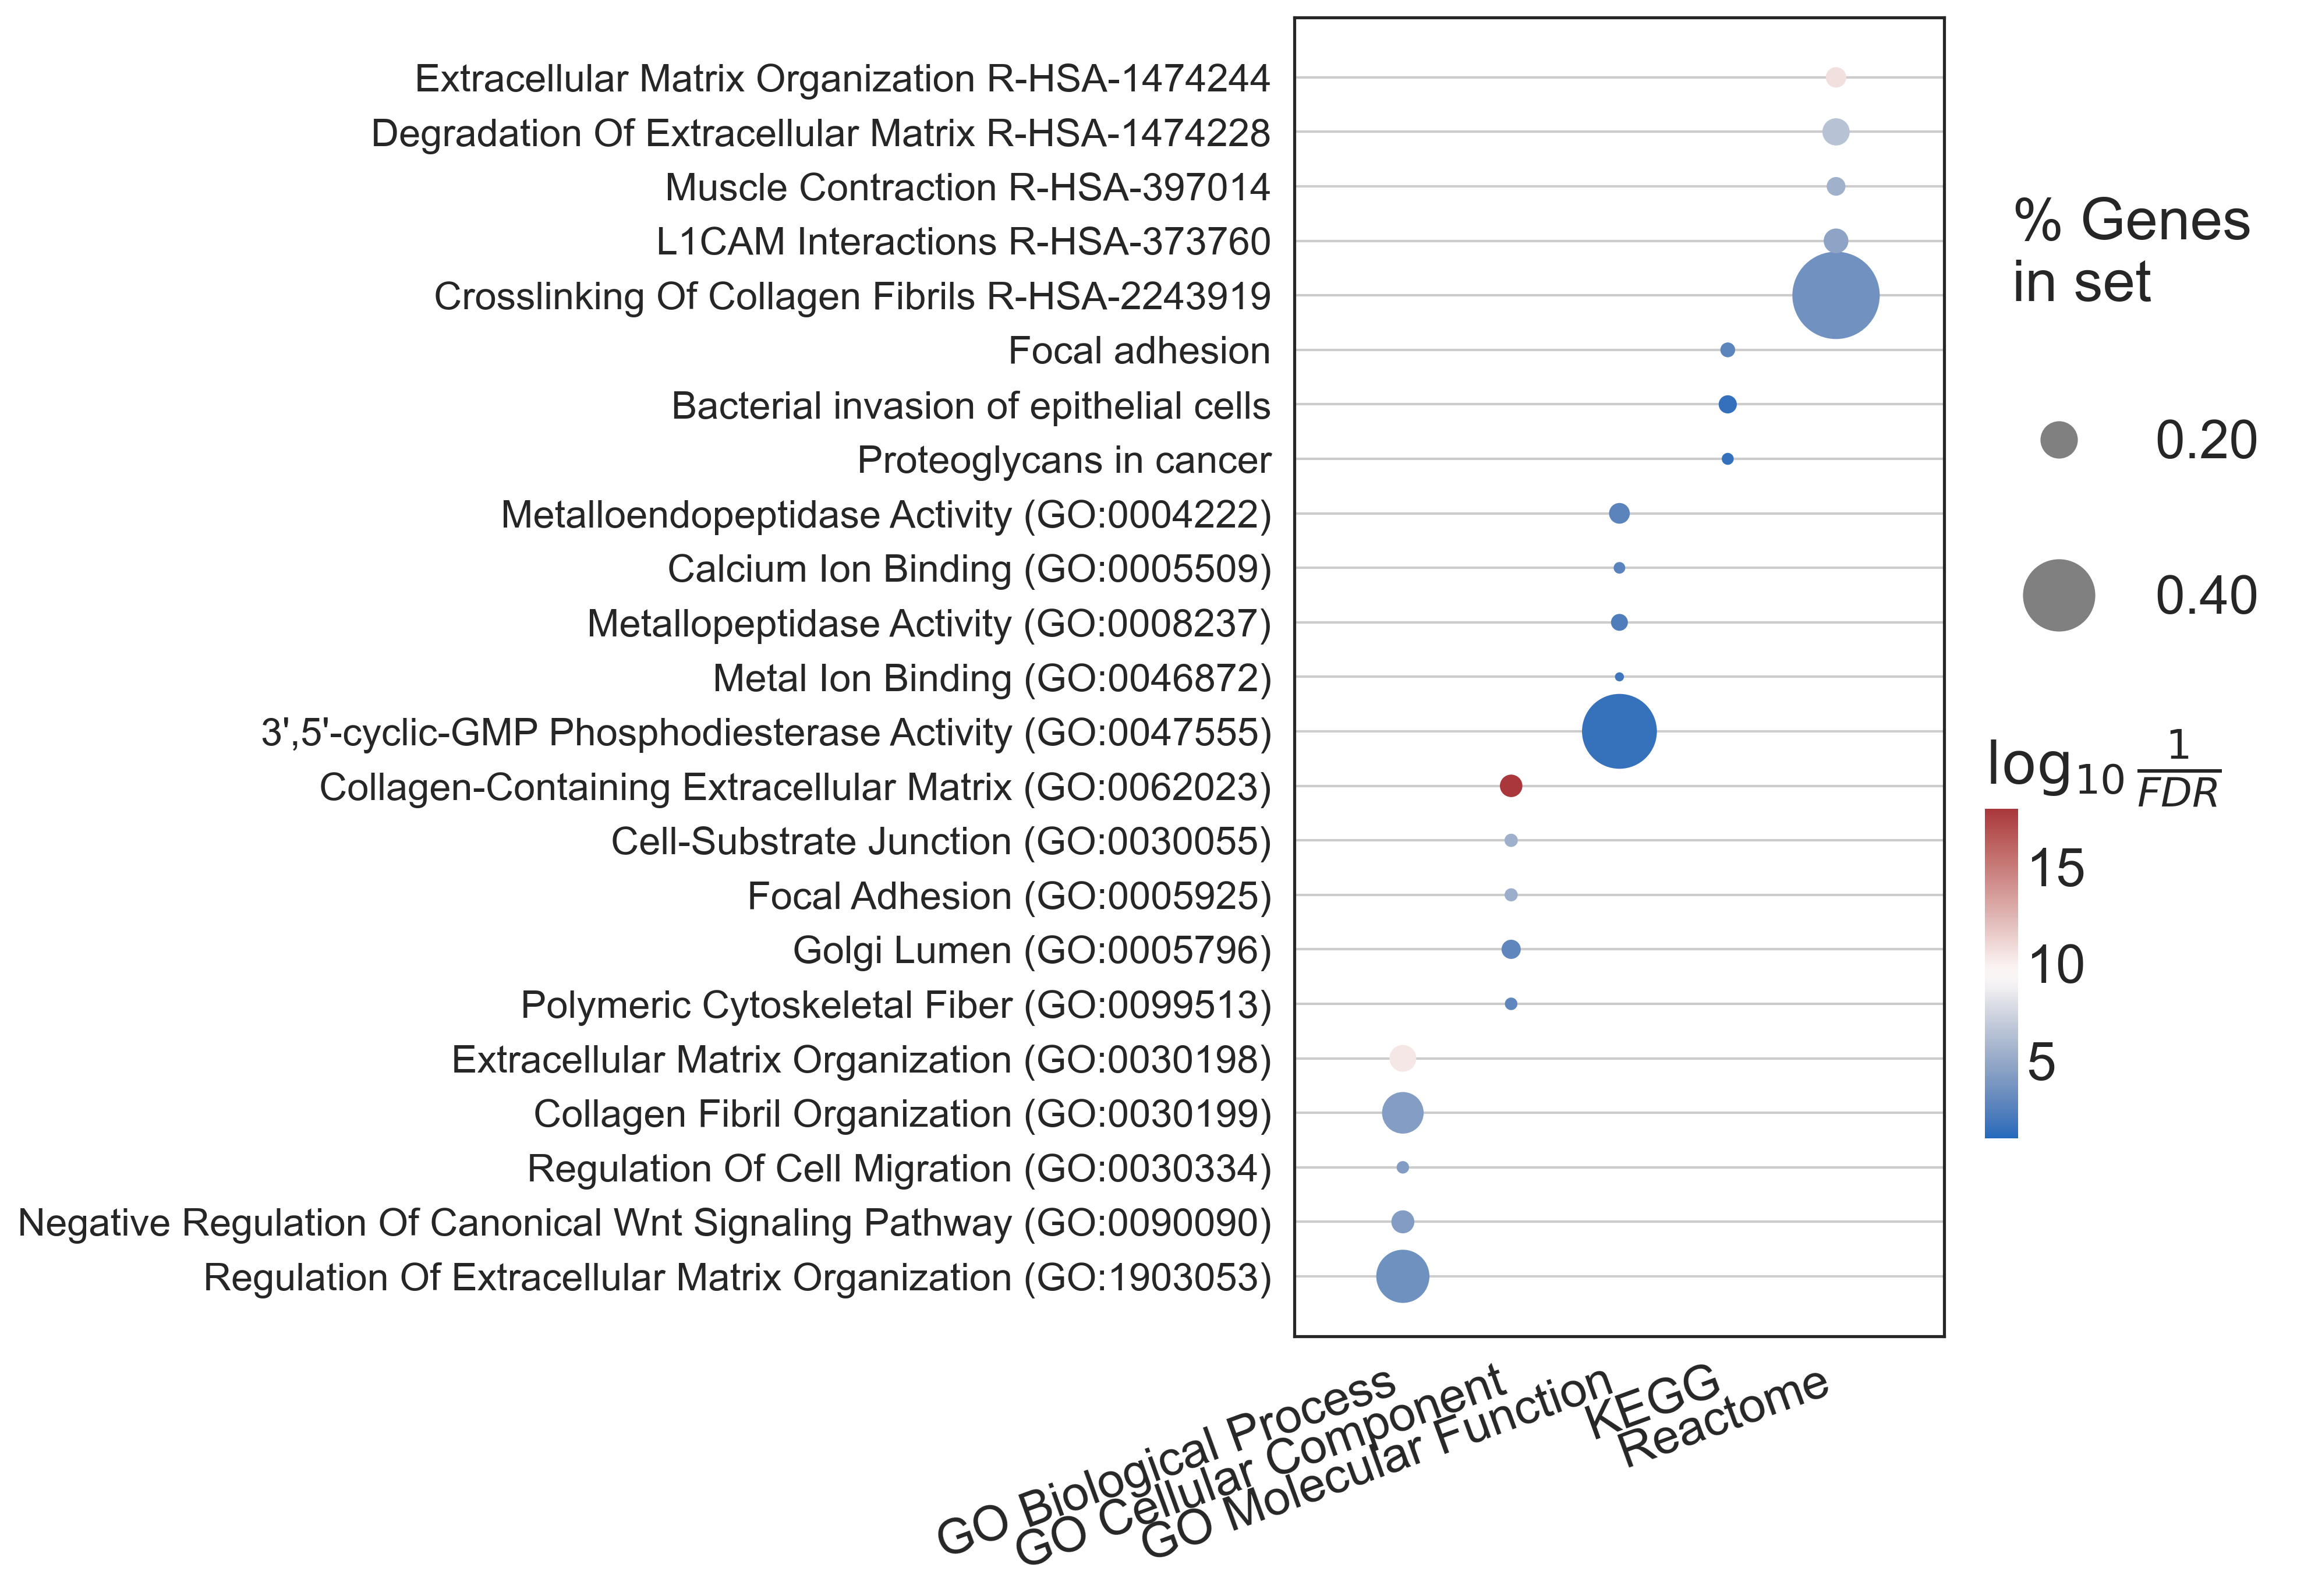

In [109]:
from gseapy import barplot, dotplot

# categorical scatterplot
ax = dotplot(out,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=12,
              top_term=5,
              figsize=(6,10),
              title = "",
              xticklabels_rot=20, # rotate xtick labels
              show_ring=False, # set to False to revmove outer ring
              marker=None,
              cmap='vlag'
             )

ax.set_xticklabels(ax.get_xticklabels(), rotation=20,fontsize=20, ha='right')
ax.set_xlabel('')

## TAM Subtypes

In [110]:
glob('../data/geneset/TAM*')

['../data/geneset/TAM_Reg',
 '../data/geneset/TAM_TIMs',
 '../data/geneset/TAM_RTM_Kupffer',
 '../data/geneset/TAM_Angio',
 '../data/geneset/TAM_RTM_Microglia',
 '../data/geneset/TAM_monoInt',
 '../data/geneset/TAM_IFN',
 '../data/geneset/TAM_mono',
 '../data/geneset/TAM_LA',
 '../data/geneset/TAM_Inflam',
 '../data/geneset/TAM_RTM_Alveolar',
 '../data/geneset/TAM_prolif',
 '../data/geneset/TAM_RTM_interstitial',
 '../data/geneset/TAM_RTM_MTRTMlike']

In [111]:
fnames =  ['M1_modified','M2_modified',
           'TAM_IFN','TAM_Reg','TAM_Inflam','TAM_Angio','TAM_LA','TAM_prolif']
# skip 'RTM'

kdict = {}

kdict['ma_neg_pred'] = ma_neg_predictors['gene'].unique().tolist()

for fname in fnames:
    
    name = fname
    fpath = glob(f'../data/geneset/*{fname}*')[0]
    
    tmp = np.loadtxt(fpath, dtype=object)
    kdict[fname] = tmp
    
write_gmt(kdict, '../data/geneset/Macrophages.gmt')

finished writing 9 gene sets to ../data/geneset/Macrophages.gmt


In [116]:
os.system('''
Rscript GSVA.R /Users/chelseachen/Library/CloudStorage/OneDrive-UniversityofPittsburgh/01_projects/yap/data/normcts/metabric.nolan.expr.csv ../data/geneset/Macrophages.gmt ../data/gsva/metabric_log2cpm_Macrophages.gmt ssgsea 

Rscript GSVA.R /Users/chelseachen/Library/CloudStorage/OneDrive-UniversityofPittsburgh/01_projects/yap/data/normcts/scanb_log2cpm.csv ../data/geneset/Macrophages.gmt ../data/gsva/scanb_log2cpm_Macrophages.gmt ssgsea

Rscript GSVA.R /Users/chelseachen/Library/CloudStorage/OneDrive-UniversityofPittsburgh/01_projects/yap/data/normcts/tcga_normlog2cpm.csv ../data/geneset/Macrophages.gmt ../data/gsva/tcga_normlog2cpm_Macrophages.gmt ssgsea

Rscript ../data/gex/tpm.csv ../data/geneset/Macrophages.gmt ../data/gsva/ILC21pt_tpm_Macrophages.gmt ssgsea
''')

[1] "/Users/chelseachen/Library/CloudStorage/OneDrive-UniversityofPittsburgh/01_projects/yap/data/normcts/metabric.nolan.expr.csv"
[2] "../data/geneset/Macrophages.gmt"                                                                                             
[3] "../data/gsva/metabric_log2cpm_Macrophages.gmt"                                                                               
[4] "ssgsea"                                                                                                                      
Setting parallel calculations through a MulticoreParam back-end
with workers=8 and tasks=100.
Estimating ssGSEA scores for 9 gene sets.
  |======================================================================| 100%



Warning message:
useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE. 


[1] "/Users/chelseachen/Library/CloudStorage/OneDrive-UniversityofPittsburgh/01_projects/yap/data/normcts/scanb_log2cpm.csv"
[2] "../data/geneset/Macrophages.gmt"                                                                                       
[3] "../data/gsva/scanb_log2cpm_Macrophages.gmt"                                                                            
[4] "ssgsea"                                                                                                                
Setting parallel calculations through a MulticoreParam back-end
with workers=8 and tasks=100.
Estimating ssGSEA scores for 9 gene sets.
  |======================================================================| 100%



Warning messages:
1: useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE. 
2: In .filterFeatures(expr, method) :
  64 genes with constant expression values throuhgout the samples.


[1] "/Users/chelseachen/Library/CloudStorage/OneDrive-UniversityofPittsburgh/01_projects/yap/data/normcts/tcga_normlog2cpm.csv"
[2] "../data/geneset/Macrophages.gmt"                                                                                          
[3] "../data/gsva/tcga_normlog2cpm_Macrophages.gmt"                                                                            
[4] "ssgsea"                                                                                                                   
Setting parallel calculations through a MulticoreParam back-end
with workers=8 and tasks=100.
Estimating ssGSEA scores for 9 gene sets.
  |======================================================================| 100%



Warning messages:
1: useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE. 
2: In .filterFeatures(expr, method) :
  541 genes with constant expression values throuhgout the samples.
Error: unexpected ',' in ","
Execution halted


256

# TAM Subtype Signature Correlation

## Metabric

In [3]:
meta = pd.read_csv('/Users/chelseachen/Library/CloudStorage/OneDrive-UniversityofPittsburgh/01_projects/publicds/database/metabric/brca_metabric_clinical_data.csv', index_col=0)
# # .index = [x.replace('-','.') for x in meta.index]
# meta.index = [x.split('.')[0] for x in meta.index]
assert len(set(meta.index))==len(meta.index) # unique ID
meta

Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
MB.0000      MB-0000             75.65             MASTECTOMY  Breast Cancer   
MB.0002      MB-0002             43.19      BREAST CONSERVING  Breast Cancer   
MB.0005      MB-0005             48.87             MASTECTOMY  Breast Cancer   
MB.0006      MB-0006             47.68             MASTECTOMY  Breast Cancer   
MB.0008      MB-0008             76.97             MASTECTOMY  Breast Cancer   
...              ...               ...                    ...            ...   
MTS.T2428  MTS-T2428             70.05                    NaN  Breast Cancer   
MTS.T2429  MTS-T2429             63.60                    NaN  Breast Cancer   
MTS.T2430  MTS-T2430               NaN                    NaN  Breast Cancer   
MTS.T2431  MTS-T2431               NaN                    NaN  Breast Cancer   
MTS.T2432  MTS-T2432               NaN                    NaN  Breast Cancer   

                                Cancer Type Detailed Cellularity Chemotherapy  \
MB.0000             Breast Invasive Ductal Carcinoma         NaN           NO   
MB.0002             Breast Invasive Ductal Carcinoma        High           NO   
MB.0005             Breast Invasive Ductal Carcinoma        High          YES   
MB.0006    Breast Mixed Ductal and Lobular Carcinoma    Moderate          YES   
MB.0008    Breast Mixed Ductal and Lobular Carcinoma        High          YES   
...                                              ...         ...          ...   
MTS.T2428                  Invasive Breast Carcinoma         NaN          NaN   
MTS.T2429                  Invasive Breast Carcinoma         NaN          NaN   
MTS.T2430                  Invasive Breast Carcinoma         NaN          NaN   
MTS.T2431                  Invasive Breast Carcinoma         NaN          NaN   
MTS.T2432                  Invasive Breast Carcinoma         NaN          NaN   

          Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
MB.0000                   claudin-low     1.0                  Positive  ...   
MB.0002                          LumA     1.0                  Positive  ...   
MB.0005                          LumB     1.0                  Positive  ...   
MB.0006                          LumB     1.0                  Positive  ...   
MB.0008                          LumB     1.0                  Positive  ...   
...                               ...     ...                       ...  ...   
MTS.T2428                         NaN     1.0                  Positive  ...   
MTS.T2429                         NaN     1.0                  Positive  ...   
MTS.T2430                         NaN     NaN                       NaN  ...   
MTS.T2431                         NaN     NaN                       NaN  ...   
MTS.T2432                         NaN     NaN                       NaN  ...   

          Relapse Free Status (Months)  Relapse Free Status  \
MB.0000                         138.65                  0.0   
MB.0002                          83.52                  0.0   
MB.0005                         151.28                  1.0   
MB.0006                         162.76                  0.0   
MB.0008                          18.55                  1.0   
...                                ...                  ...   
MTS.T2428                         4.93                  1.0   
MTS.T2429                        16.18                  1.0   
MTS.T2430                          NaN                  NaN   
MTS.T2431                          NaN                  NaN   
MTS.T2432                          NaN                  NaN   

          Number of Samples Per Patient Sample Type     Sex  \
MB.0000                               1     Primary  Female   
MB.0002                               1     Primary  Female   
MB.0005                               1     Primary  Female   
MB.0006                               1     Primary  Female   
MB.0008                               1    

In [5]:
Counter(meta['ER Status'])

Counter({'Positive': 1825, 'Negative': 644, nan: 40})

In [4]:
gsva = pd.read_csv('../data/deconv/deconvolute_tams_metabric.csv', index_col=0).T

gsva = gsva[[c for c in gsva.columns if c not in ['M1_modified','M2_modified','M1/M2']]]


gsva_erpos = gsva.loc[[x for x in meta.index[meta['ER Status']=='Positive'] if x in gsva.index],:]
print(gsva_erpos.shape)
gsva_erpos

(1505, 7)


ma_neg_pred   TAM_IFN   TAM_Reg  TAM_Inflam  TAM_Angio    TAM_LA  \
MB.0000     0.354146  0.519601  0.360611    0.518728   0.415778  0.672837   
MB.0002     0.122240  0.295175  0.114916    0.110010   0.229015  0.451710   
MB.0005     0.191857  0.433769  0.185241    0.416584   0.438550  0.651843   
MB.0006     0.240177  0.549153  0.334489    0.304427   0.402882  0.616019   
MB.0008     0.104125  0.584634  0.359588    0.293692   0.319183  0.659664   
...              ...       ...       ...         ...        ...       ...   
MB.7295     0.294528  0.523969  0.474415    0.407187   0.450278  0.705266   
MB.7296     0.149290  0.539800  0.455730    0.394739   0.446044  0.701604   
MB.7297     0.121453  0.528775  0.557388    0.458500   0.429311  0.708615   
MB.7298     0.135601  0.596277  0.534889    0.323409   0.409582  0.718881   
MB.7299     0.199781  0.670139  0.561452    0.398378   0.462526  0.741747   

         TAM_prolif  
MB.0000    0.479064  
MB.0002    0.626043  
MB.0005    0.668672  
MB.0006    0.606045  
MB.0008    0.746942  
...             ...  
MB.7295    0.711430  
MB.7296    0.833218  
MB.7297    0.775175  
MB.7298    0.742197  
MB.7299    0.729209  

[1505 rows x 7 columns]

In [5]:
gsva.columns

Index(['ma_neg_pred', 'TAM_IFN', 'TAM_Reg', 'TAM_Inflam', 'TAM_Angio',
       'TAM_LA', 'TAM_prolif'],
      dtype='object')

In [6]:
name_keys = {
    'ma_neg_pred':'TAM-Low',
    'M1_modified':'M1','M2_modified':'M2','M1/M2':'M1/M2 ratio',
    'TAM_IFN':'IFN-TAMs','TAM_Reg':'Reg-TAMs','TAM_Inflam':'Inflam-TAMs',
    'TAM_Angio':'Angio-TAMs','TAM_LA':'LA-TAMs','TAM_prolif':'Prolif-TAMs'
}

In [7]:
X1 = gsva_erpos

In [8]:
pvals = []
df_p = X1

sel_cols = X1.columns
for i in range(len(sel_cols)):
    for j in range(len(sel_cols)):
        if i<j:
            x1 = df_p.iloc[:,i].values
            x2 = df_p.iloc[:,j].values
            mask = (~np.isnan(x1)) & (~np.isnan(x2)) 
            _, pval = spearmanr(x1[mask],x2[mask])
            pvals.append(pval)
        
from statsmodels.stats.multitest import multipletests
_,fdr,_,_ = multipletests(pvals, method='fdr_bh')

fdr_mat = pd.DataFrame(np.nan, index=range(len(sel_cols)), columns=range(len(sel_cols))) 

counter = -1
for i in range(len(sel_cols)):
    for j in range(len(sel_cols)):
        if i<j:
            counter += 1
            fdr_mat.iloc[i,j] = fdr[counter]
            fdr_mat.iloc[j,i] = fdr[counter] # just duplicate
        if i==j:
            fdr_mat.iloc[i,j] = 0



fdr_df = pd.DataFrame(fdr_mat.values, columns=sel_cols, index=sel_cols)
fdr_df

ma_neg_pred        TAM_IFN        TAM_Reg     TAM_Inflam  \
ma_neg_pred  0.000000e+00   1.340780e-07   1.639029e-36   5.923709e-58   
TAM_IFN      1.340780e-07   0.000000e+00  4.658189e-147  6.886717e-110   
TAM_Reg      1.639029e-36  4.658189e-147   0.000000e+00   3.638786e-95   
TAM_Inflam   5.923709e-58  6.886717e-110   3.638786e-95   0.000000e+00   
TAM_Angio    3.205104e-55   2.202128e-78   7.204647e-89   0.000000e+00   
TAM_LA       2.185303e-83  5.532099e-137  1.638950e-124  6.521632e-196   
TAM_prolif   1.019858e-42   5.421543e-17   1.558499e-01   2.980144e-02   

                 TAM_Angio         TAM_LA    TAM_prolif  
ma_neg_pred   3.205104e-55   2.185303e-83  1.019858e-42  
TAM_IFN       2.202128e-78  5.532099e-137  5.421543e-17  
TAM_Reg       7.204647e-89  1.638950e-124  1.558499e-01  
TAM_Inflam    0.000000e+00  6.521632e-196  2.980144e-02  
TAM_Angio     0.000000e+00  1.180393e-239  1.987794e-05  
TAM_LA       1.180393e-239   0.000000e+00  1.747593e-06  
TAM_prolif    1.987794e-05   1.747593e-06  0.000000e+00

Text(0.5, 1.0, '')

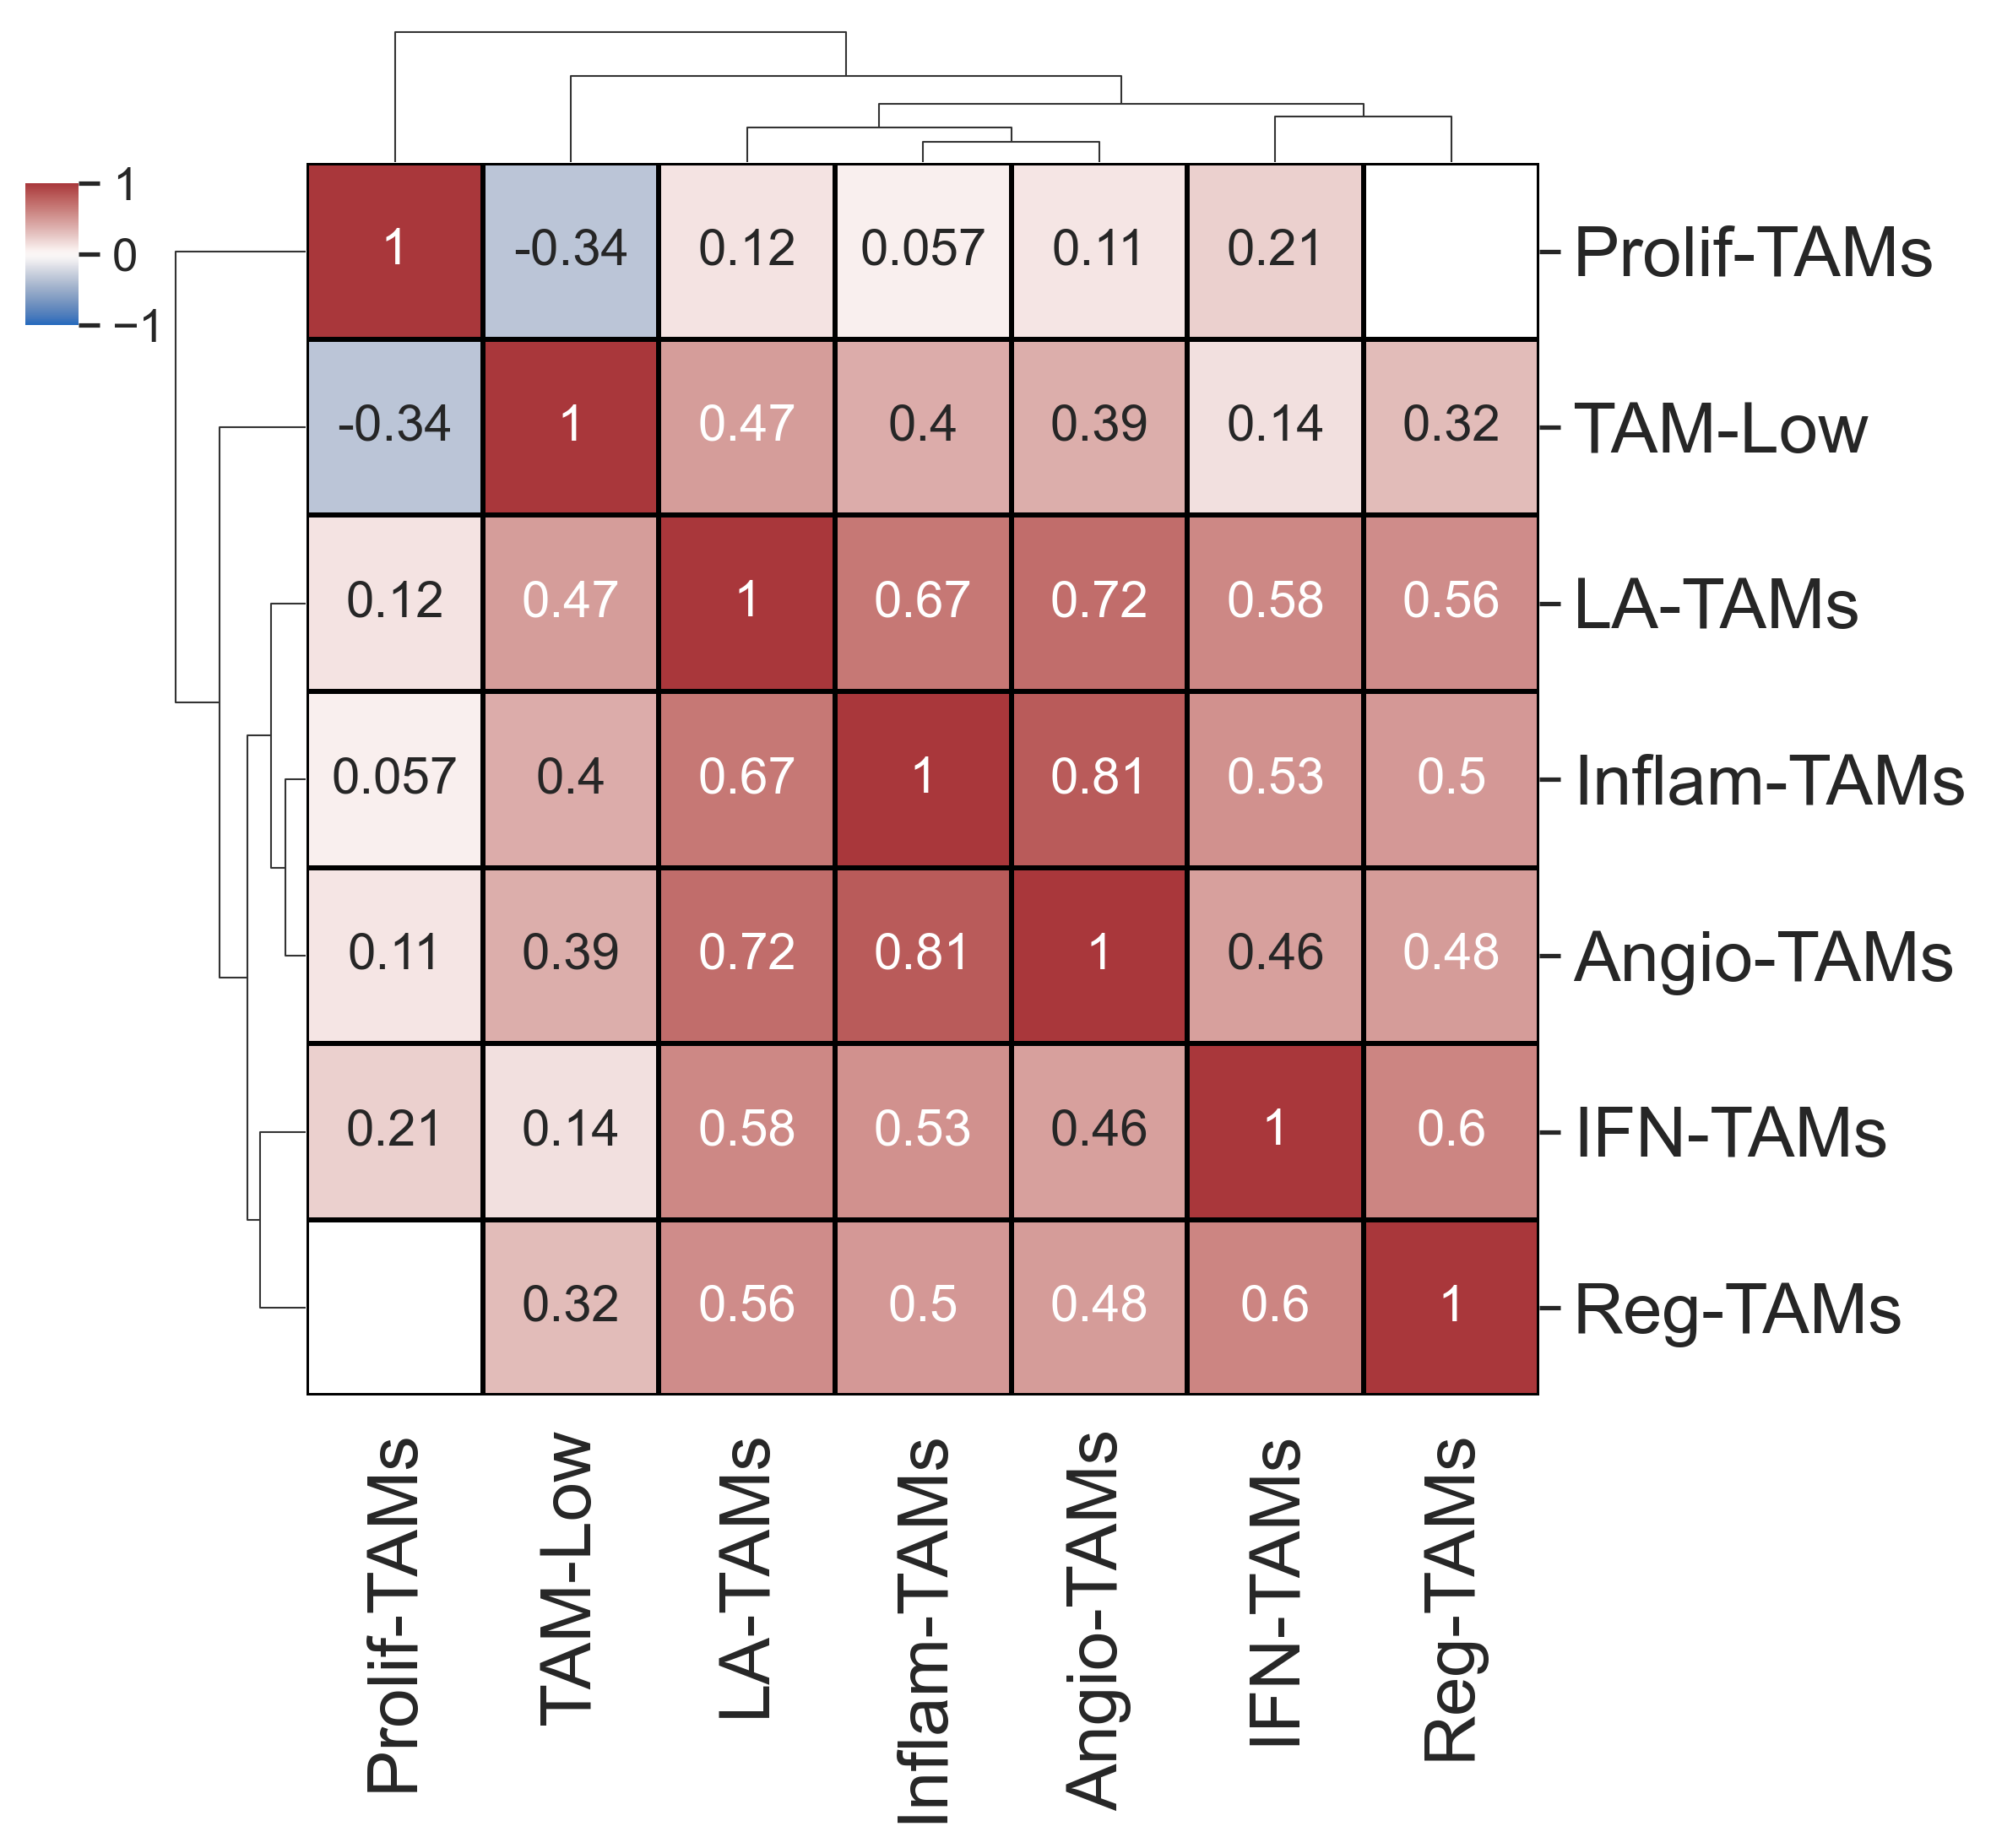

In [12]:
df_corr = X1.corr(method='spearman')

new_names = [name_keys[x] for x in df_corr.columns]
df_corr.columns = new_names; df_corr.index = new_names

sns.set(style='white', font_scale=1.2)

alpha = 0.05
mask = ((fdr_mat >= alpha)*1).values 

# Plot clustered heatmap
g=sns.clustermap(df_corr, cmap="vlag", center=0, annot=True, mask=mask,\
                 linewidths=1, linecolor='black', figsize=(7,7),
                 vmin=-1, vmax=1, dendrogram_ratio=.1
                 )
g.cax.set_position([-.05, .8, .03, .08])

_=plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=20)  # Set x label font size
_=plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=20)  # Set y label font size

g.ax_heatmap.set_title('', pad=50, fontsize=30)

## SCANB

In [20]:
meta = pd.read_csv('/Users/chelseachen/Library/CloudStorage/OneDrive-UniversityofPittsburgh/01_projects/publicds/database/scanb/Clinical features SCANB.tsv', index_col=0, sep='\t')
# .index = [x.replace('-','.') for x in meta.index]
meta.index = [x.split('.')[0] for x in meta.index]
assert len(set(meta.index))==len(meta.index) # unique ID
meta

Adjuvant_Endo  Adjuvant_Cyto  Adjuvant_HER2  Adjuvant_Endo_only  \
S000001            1.0            0.0            0.0                 1.0   
S000002            0.0            1.0            0.0                 0.0   
S000003            0.0            0.0            0.0                 0.0   
S000006            1.0            1.0            0.0                 0.0   
S000008            1.0            0.0            0.0                 1.0   
...                ...            ...            ...                 ...   
S006780            1.0            0.0            0.0                 1.0   
S006781            0.0            0.0            0.0                 0.0   
S006782            1.0            1.0            0.0                 0.0   
S006783            1.0            1.0            0.0                 0.0   
S006786            1.0            0.0            0.0                 1.0   

         Adjuvant_Cyto_only  Adjuvant_HER2_only  Adjuvant_Endo_and_Cyto  \
S000001                 0.0                 0.0                     0.0   
S000002                 1.0                 0.0                     0.0   
S000003                 0.0                 0.0                     0.0   
S000006                 0.0                 0.0                     1.0   
S000008                 0.0                 0.0                     0.0   
...                     ...                 ...                     ...   
S006780                 0.0                 0.0                     0.0   
S006781                 0.0                 0.0                     0.0   
S006782                 0.0                 0.0                     1.0   
S006783                 0.0                 0.0                     1.0   
S006786                 0.0                 0.0                     0.0   

         Adjuvant_Endo_and_HER2  Adjuvant_Cyto_and_HER2  \
S000001                     0.0                     0.0   
S000002                     0.0                     0.0   
S000003                     0.0                     0.0   
S000006                     0.0                     0.0   
S000008                     0.0                     0.0   
...                         ...                     ...   
S006780                     0.0                     0.0   
S006781                     0.0                     0.0   
S006782                     0.0                     0.0   
S006783                     0.0                     0.0   
S006786                     0.0                     0.0   

         Adjuvant_Endo_and_Cyto_only  ...  COSMIC_Mutation_Nonsynon_Count  \
S000001                          0.0  ...                               3   
S000002                          0.0  ...                               4   
S000003                          0.0  ...                               4   
S000006                          1.0  ...                               1   
S000008                          0.0  ...                               1   
...                              ...  ...                             ...   
S006780                          0.0  ...                               3   
S006781                          0.0  ...                               0   
S006782                          1.0  ...                               3   
S006783                          1.0  ...                               6   
S006786                          0.0  ...                               0   

         COSMIC_Mutation_Nonsynon_Count_per_expressed_MB  \
S000001                                         0.011932   
S000002                                         0.014654   
S000003                                         0.012168   
S000006                                         0.004006   
S000008                                         0.004898   
...                                                  ...   
S006780                                         0.007828   
S006781                                         0.000000   
S006782              

In [21]:
Counter(meta['ER_1perc'])

Counter({'POS': 2786, nan: 198, 'NEG': 233})

In [27]:
# scanb
gsva = pd.read_csv('../data/deconv/deconvolute_tams_scanb.csv', index_col=0).T

gsva = gsva[[c for c in gsva.columns if c not in ['M1_modified','M2_modified','M1/M2']]]

gsva_erpos = gsva.loc[[x for x in meta.index[meta['ER_1perc']=='POS'] if x in gsva.index],:]
print(gsva_erpos.shape)
gsva_erpos

(2776, 7)


ma_neg_pred   TAM_IFN   TAM_Reg  TAM_Inflam  TAM_Angio    TAM_LA  \
S000001     0.209200  0.103053  0.376417   -0.052040   0.284967  0.458921   
S000006     0.288580  0.502355  0.445882    0.172341   0.393247  0.605921   
S000008     0.265134  0.277643  0.409042    0.042445   0.317515  0.488583   
S000011     0.232621  0.466107  0.490881    0.172575   0.337350  0.465914   
S000013     0.347581  0.258735  0.423183   -0.008484   0.257822  0.526341   
...              ...       ...       ...         ...        ...       ...   
S006780     0.100112  0.010566  0.217037   -0.080812   0.216727  0.302985   
S006781     0.127588  0.231896  0.278327   -0.072358   0.209778  0.370790   
S006782     0.216805  0.133109  0.308638    0.070083   0.321623  0.513673   
S006783     0.372848  0.159827  0.415841    0.124358   0.374052  0.474237   
S006786     0.103852  0.075283  0.278886    0.036293   0.230220  0.342798   

         TAM_prolif  
S000001    0.277293  
S000006    0.573559  
S000008    0.429019  
S000011    0.386494  
S000013    0.415883  
...             ...  
S006780    0.504549  
S006781    0.303369  
S006782    0.445636  
S006783    0.360204  
S006786    0.498442  

[2776 rows x 7 columns]

In [28]:
name_keys = {
    'ma_neg_pred':'TAM-Low',
    'M1_modified':'M1','M2_modified':'M2','M1/M2':'M1/M2 ratio',
    'TAM_IFN':'IFN-TAMs','TAM_Reg':'Reg-TAMs','TAM_Inflam':'Inflam-TAMs',
    'TAM_Angio':'Angio-TAMs','TAM_LA':'LA-TAMs','TAM_prolif':'Prolif-TAMs'
}

In [29]:
X1 = gsva_erpos

In [30]:
pvals = []
df_p = X1

sel_cols = X1.columns
for i in range(len(sel_cols)):
    for j in range(len(sel_cols)):
        if i<j:
            x1 = df_p.iloc[:,i].values
            x2 = df_p.iloc[:,j].values
            mask = (~np.isnan(x1)) & (~np.isnan(x2)) 
            _, pval = spearmanr(x1[mask],x2[mask])
            pvals.append(pval)
        
from statsmodels.stats.multitest import multipletests
_,fdr,_,_ = multipletests(pvals, method='fdr_bh')

fdr_mat = pd.DataFrame(np.nan, index=range(len(sel_cols)), columns=range(len(sel_cols))) 

counter = -1
for i in range(len(sel_cols)):
    for j in range(len(sel_cols)):
        if i<j:
            counter += 1
            fdr_mat.iloc[i,j] = fdr[counter]
            fdr_mat.iloc[j,i] = fdr[counter] # just duplicate
        if i==j:
            fdr_mat.iloc[i,j] = 0

fdr_df = pd.DataFrame(fdr_mat.values, columns=sel_cols, index=sel_cols)
fdr_df

ma_neg_pred        TAM_IFN        TAM_Reg     TAM_Inflam  \
ma_neg_pred   0.000000e+00   4.228601e-01  2.857539e-130   1.305816e-87   
TAM_IFN       4.228601e-01   0.000000e+00   0.000000e+00  1.298788e-182   
TAM_Reg      2.857539e-130   0.000000e+00   0.000000e+00   0.000000e+00   
TAM_Inflam    1.305816e-87  1.298788e-182   0.000000e+00   0.000000e+00   
TAM_Angio     1.533781e-42  3.206539e-168  3.219410e-289   0.000000e+00   
TAM_LA       5.902538e-149  1.355548e-202   0.000000e+00   0.000000e+00   
TAM_prolif   1.899283e-174   6.931014e-56   3.606999e-02   1.764311e-02   

                 TAM_Angio         TAM_LA     TAM_prolif  
ma_neg_pred   1.533781e-42  5.902538e-149  1.899283e-174  
TAM_IFN      3.206539e-168  1.355548e-202   6.931014e-56  
TAM_Reg      3.219410e-289   0.000000e+00   3.606999e-02  
TAM_Inflam    0.000000e+00   0.000000e+00   1.764311e-02  
TAM_Angio     0.000000e+00   0.000000e+00   5.103206e-10  
TAM_LA        0.000000e+00   0.000000e+00   5.238770e-01  
TAM_prolif    5.103206e-10   5.238770e-01   0.000000e+00

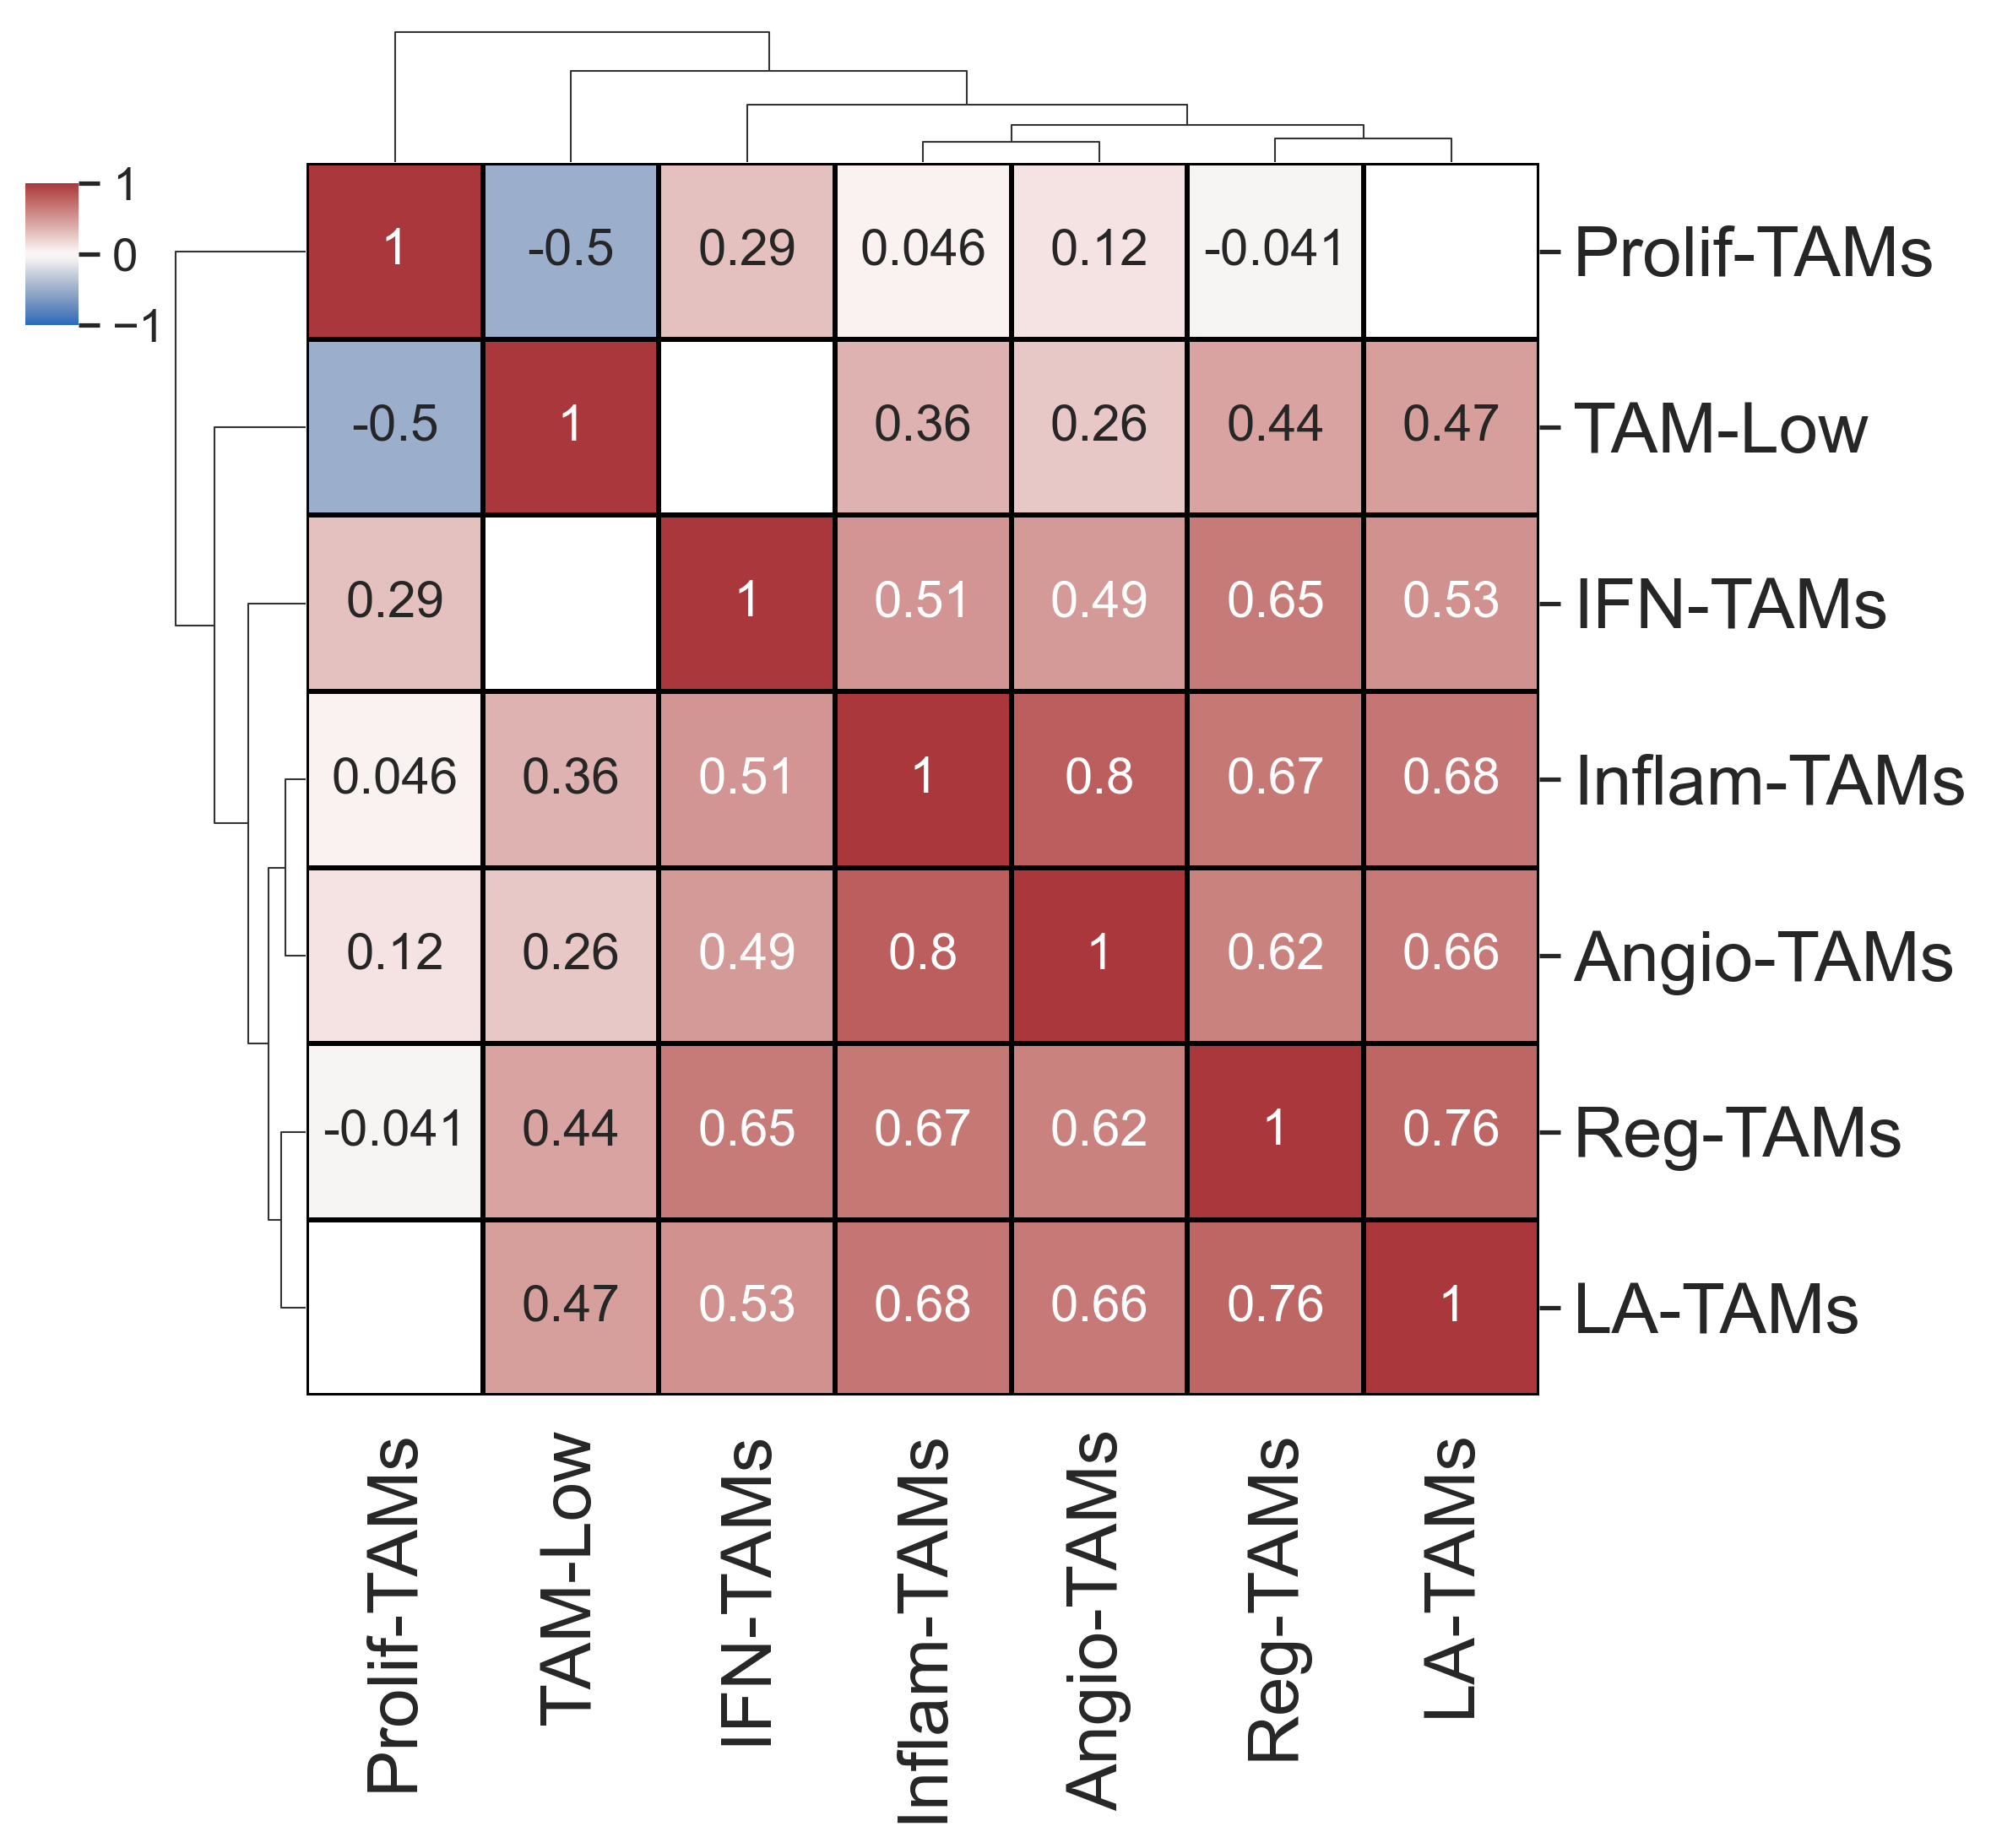

In [31]:
df_corr = X1.corr(method='spearman')

new_names = [name_keys[x] for x in df_corr.columns]
df_corr.columns = new_names; df_corr.index = new_names

sns.set(style='white', font_scale=1.2)

alpha = 0.05
mask = ((fdr_mat >= alpha)*1).values 

# Plot clustered heatmap
g=sns.clustermap(df_corr, cmap="vlag", center=0, annot=True, mask=mask,\
                 linewidths=1, linecolor='black', figsize=(7,7),
                 vmin=-1, vmax=1, dendrogram_ratio=.1
                 )
g.cax.set_position([-.05, .8, .03, .08])

_=plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=20)  # Set x label font size
_=plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=20)  # Set y label font size

# g.ax_heatmap.set_title('SCAN-B', pad=50, fontsize=30)

# Cox

Run `07_calc_surv_metabric_scanb.R`

first, I want to claim here deconvolute_tams_scanb.csv and deconvolute_tams_metabric.csv produced same results as gsva (ssgsea)

So Cox results need not to be changed

In [55]:
df1 = pd.read_csv('../data/deconv/deconvolute_tams_metabric.csv', index_col=0)
df2 = pd.read_csv('../data/gsva/metabric_log2cpm_Macrophages.gmt.ssgsea.csv', index_col=0)

np.all(df1==df2)

True

In [56]:
df1 = pd.read_csv('../data/deconv/deconvolute_tams_scanb.csv', index_col=0)
df2 = pd.read_csv('../data/gsva/scanb_log2cpm_Macrophages.gmt.ssgsea.csv', index_col=0)

np.all(df1==df2)

True

In [58]:
glob('../data/survival/*')

['../data/survival/METABRIC_OS.csv',
 '../data/survival/SCANB_OS.csv',
 '../data/survival/METABRIC_DFS.csv']

In [59]:
df = pd.read_csv('../data/survival/METABRIC_DFS.csv', index_col=0)
df['outcome'] = ['DFS']*df.shape[0]
df1 = df
df1

exp(coef)  exp(-coef)  lower .95  upper .95  \
Sighigh               0.809866    1.234773   0.659864   0.993966   
HistologyILC          1.066341    0.937786   0.748322   1.519510   
HER2_statusPositive   1.927186    0.518891   1.424551   2.607170   
PR_statusPositive     0.862242    1.159767   0.707441   1.050918   
agedx                 0.996971    1.003039   0.988901   1.005106   
Tumor_size            1.007121    0.992929   0.999919   1.014375   
Tumor_stage           1.646209    0.607456   1.373572   1.972962   

                             pval outcome  
Sighigh              4.360383e-02     DFS  
HistologyILC         7.222299e-01     DFS  
HER2_statusPositive  2.091249e-05     DFS  
PR_statusPositive    1.420876e-01     DFS  
agedx                4.643729e-01     DFS  
Tumor_size           5.263265e-02     DFS  
Tumor_stage          6.816089e-08     DFS

In [60]:
df = pd.read_csv('../data/survival/METABRIC_OS.csv', index_col=0)
df['outcome'] = ['OS']*df.shape[0]
df2 = df
df2

exp(coef)  exp(-coef)  lower .95  upper .95  \
Sighigh               0.788600    1.268070   0.659346   0.943192   
HistologyILC          0.984144    1.016112   0.721325   1.342721   
HER2_statusPositive   1.638242    0.610410   1.222984   2.194501   
PR_statusPositive     0.905387    1.104500   0.763680   1.073389   
agedx                 1.046202    0.955839   1.038211   1.054254   
Tumor_size            1.007427    0.992628   1.001879   1.013005   
Tumor_stage           1.450902    0.689226   1.247654   1.687261   

                             pval outcome  
Sighigh              9.313725e-03      OS  
HistologyILC         9.196837e-01      OS  
HER2_statusPositive  9.344317e-04      OS  
PR_statusPositive    2.524250e-01      OS  
agedx                7.724621e-31      OS  
Tumor_size           8.630271e-03      OS  
Tumor_stage          1.341807e-06      OS

In [61]:
var_test_keys = {'Sighigh':'TAM-Low Score High',
                 'HistologyILC':'ILC vs Other Histology',
                 'HER2_statusPositive':'HER2 Positive',
                 'PR_statusPositive':'PR Positive',
                 'agedx':'Age at Diagnosis',
                 'Tumor_size':'Tumor Size',
                 'Tumor_stage':'Tumor Stage'
                }

outcome_keys = {'DFS':'Relapse Free Survival', 'OS':'Overall Survival'}

In [62]:
df = pd.concat((df1,df2))
df['group'] = df.index; df = df.loc[var_test_keys.keys(),:]
df['label'] = [var_test_keys[k] for k in df.index]
df['placeholder'] = ['']*df.shape[0]
df

exp(coef)  exp(-coef)  lower .95  upper .95  \
Sighigh               0.809866    1.234773   0.659864   0.993966   
Sighigh               0.788600    1.268070   0.659346   0.943192   
HistologyILC          1.066341    0.937786   0.748322   1.519510   
HistologyILC          0.984144    1.016112   0.721325   1.342721   
HER2_statusPositive   1.927186    0.518891   1.424551   2.607170   
HER2_statusPositive   1.638242    0.610410   1.222984   2.194501   
PR_statusPositive     0.862242    1.159767   0.707441   1.050918   
PR_statusPositive     0.905387    1.104500   0.763680   1.073389   
agedx                 0.996971    1.003039   0.988901   1.005106   
agedx                 1.046202    0.955839   1.038211   1.054254   
Tumor_size            1.007121    0.992929   0.999919   1.014375   
Tumor_size            1.007427    0.992628   1.001879   1.013005   
Tumor_stage           1.646209    0.607456   1.373572   1.972962   
Tumor_stage           1.450902    0.689226   1.247654   1.687261   

                             pval outcome                group  \
Sighigh              4.360383e-02     DFS              Sighigh   
Sighigh              9.313725e-03      OS              Sighigh   
HistologyILC         7.222299e-01     DFS         HistologyILC   
HistologyILC         9.196837e-01      OS         HistologyILC   
HER2_statusPositive  2.091249e-05     DFS  HER2_statusPositive   
HER2_statusPositive  9.344317e-04      OS  HER2_statusPositive   
PR_statusPositive    1.420876e-01     DFS    PR_statusPositive   
PR_statusPositive    2.524250e-01      OS    PR_statusPositive   
agedx                4.643729e-01     DFS                agedx   
agedx                7.724621e-31      OS                agedx   
Tumor_size           5.263265e-02     DFS           Tumor_size   
Tumor_size           8.630271e-03      OS           Tumor_size   
Tumor_stage          6.816089e-08     DFS          Tumor_stage   
Tumor_stage          1.341807e-06      OS          Tumor_stage   

                                      label placeholder  
Sighigh                  TAM-Low Score High              
Sighigh                  TAM-Low Score High              
HistologyILC         ILC vs Other Histology              
HistologyILC         ILC vs Other Histology              
HER2_statusPositive           HER2 Positive              
HER2_statusPositive           HER2 Positive              
PR_statusPositive               PR Positive              
PR_statusPositive               PR Positive              
agedx                      Age at Diagnosis              
agedx                      Age at Diagnosis              
Tumor_size                       Tumor Size              
Tumor_size                       Tumor Size              
Tumor_stage                     Tumor Stage              
Tumor_stage                     Tumor Stage

Text(0.5, 1.0, 'Relapse Free Survival')

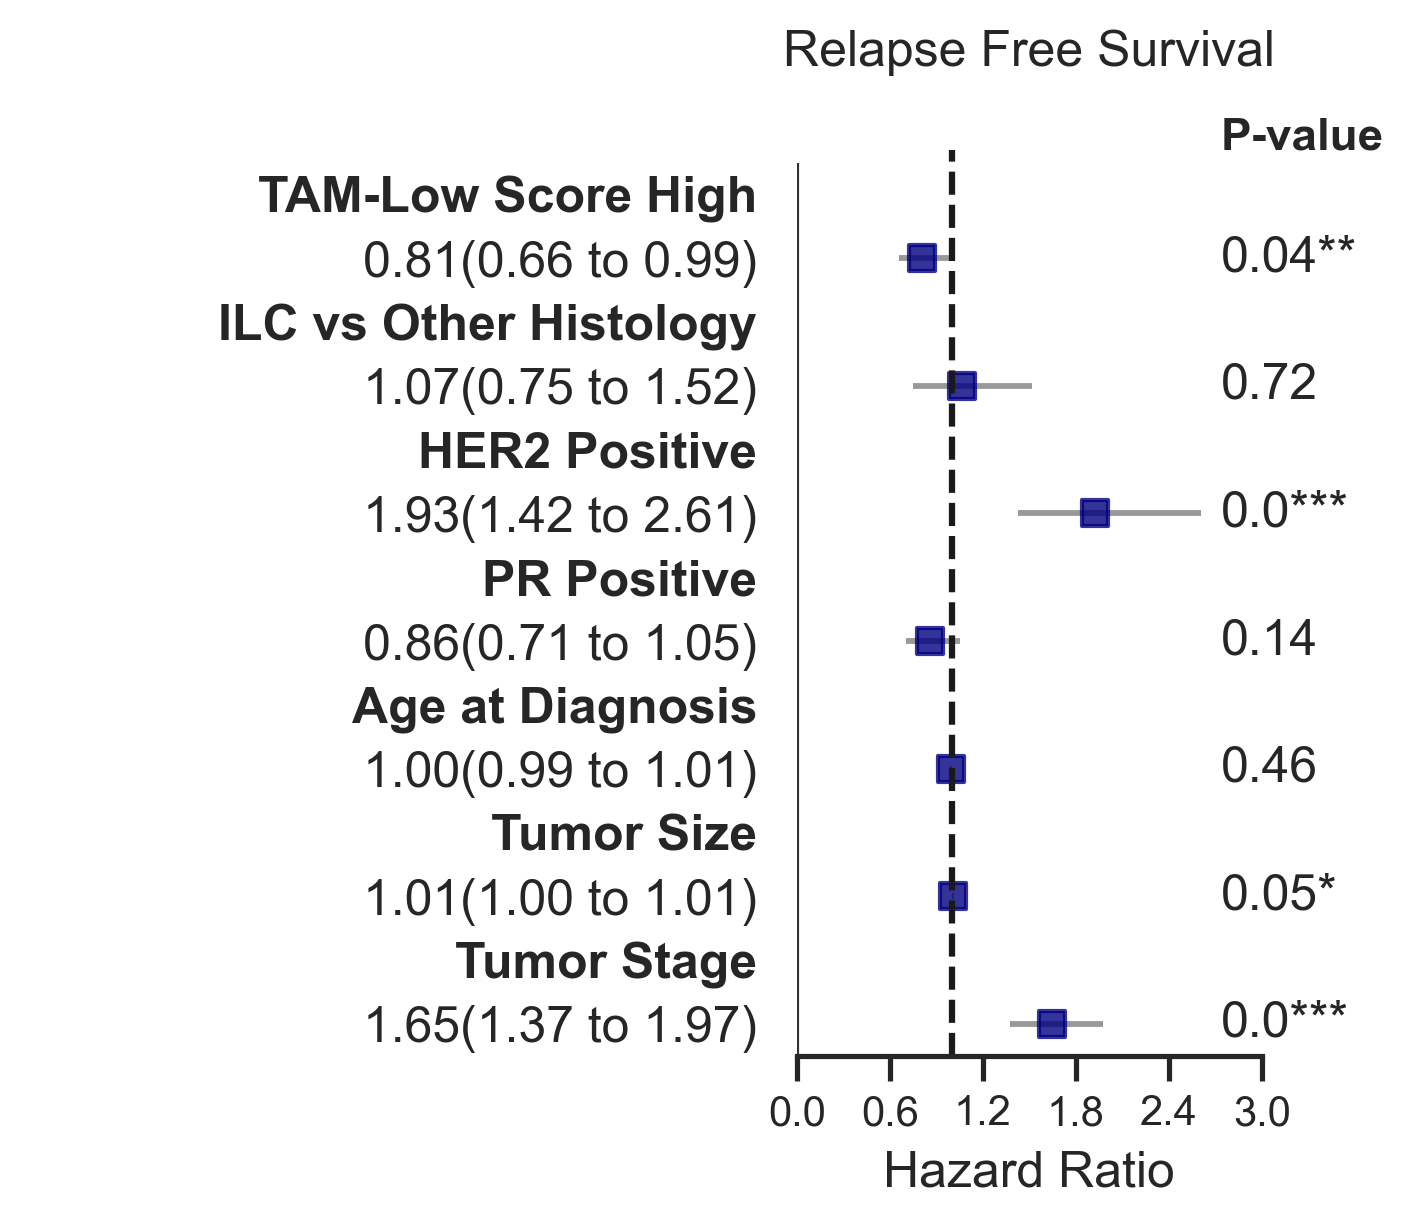

In [63]:
dfp = df[df['outcome']=='DFS']
color='navy'; title='Relapse Free Survival'

ax = fp.forestplot(dfp,  figsize=(2,4),# the dataframe with results data
              estimate="exp(coef)",  # col containing estimated effect size 
              ll="lower .95", hl="upper .95",  # columns containing conf. int. lower and higher limits
              groupvar='label',
              varlabel='placeholder',  # column containing variable label
              pval = 'pval',
              sort=False,  # sort in ascending order (sorts within group if group is specified)               
              color_alt_rows=False,  # Gray alternate rows
              **{"ylabel1_size": 11}, # control size of printed ylabel
              flush=False, 
              fontfamily='Sans Serif', markercolor=color,
                   decimal_precision= 2
              )

ax.axvline(x=1, linestyle='--',color='k')
ax.set_xlim([0,3])
ax.set_xlabel('Hazard Ratio')
ax.set_title(title, pad=20)

Text(0.5, 1.0, 'Overall Survival')

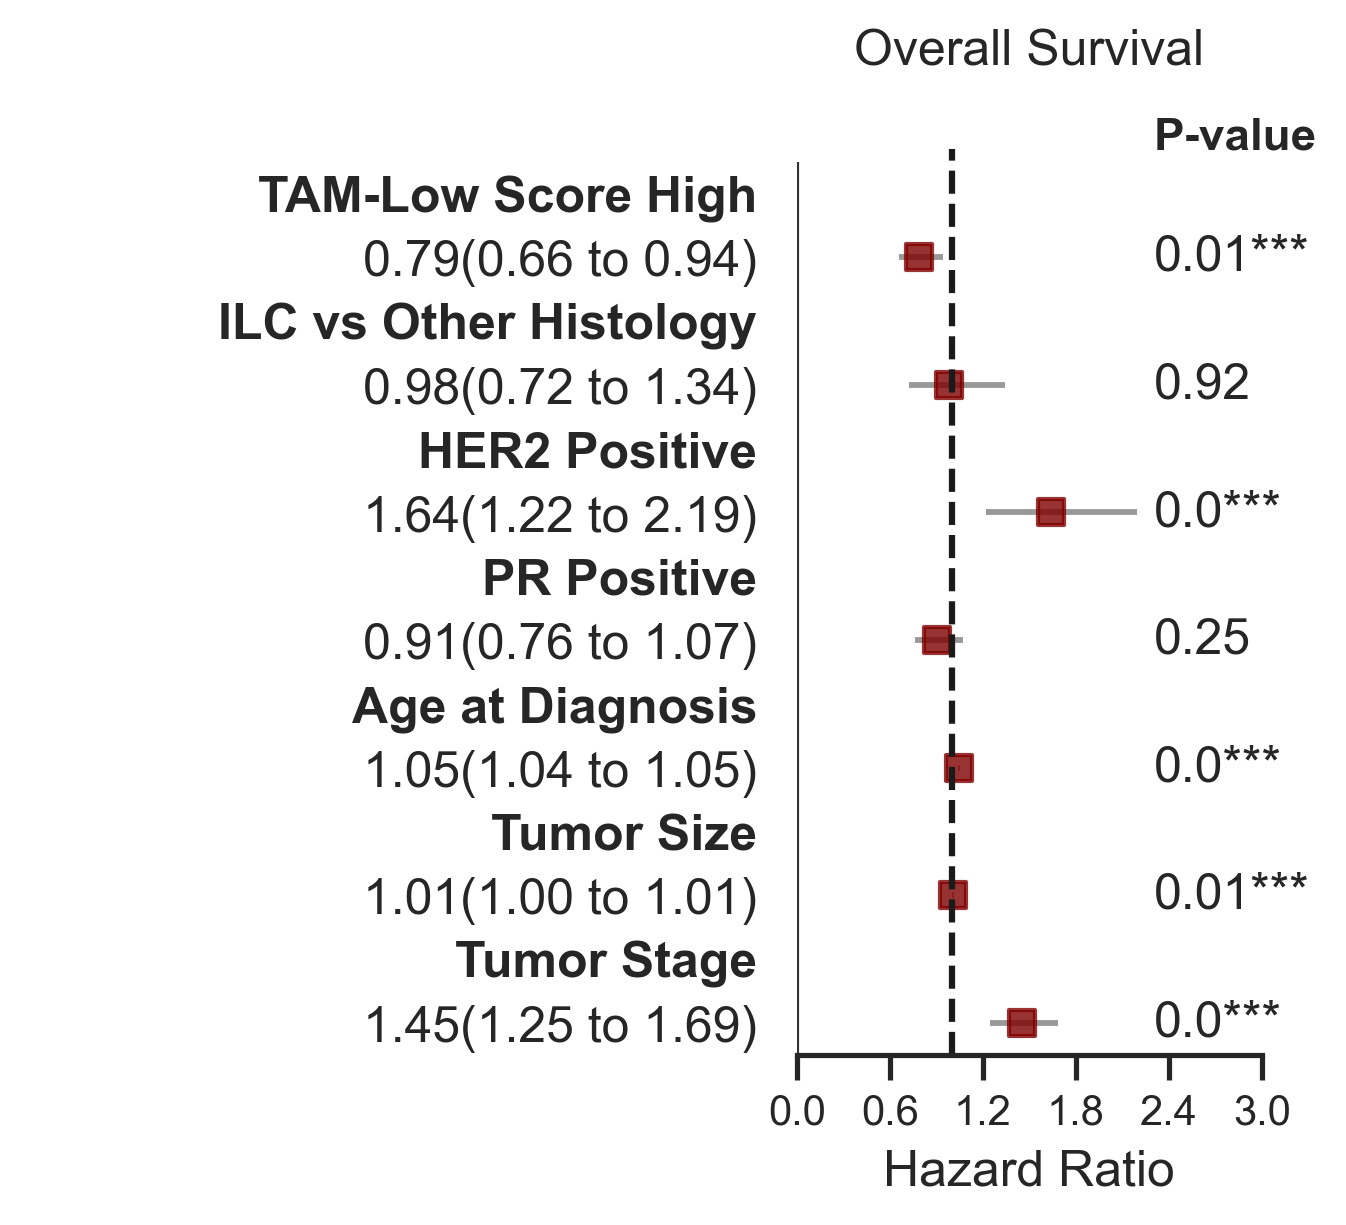

In [64]:
dfp = df[df['outcome']=='OS']
color='maroon'; title='Overall Survival'

ax = fp.forestplot(dfp,  figsize=(2,4),# the dataframe with results data
              estimate="exp(coef)",  # col containing estimated effect size 
              ll="lower .95", hl="upper .95",  # columns containing conf. int. lower and higher limits
              groupvar="label",  # column containing variable label
              varlabel='placeholder',
              pval = 'pval',
              sort=False,  # sort in ascending order (sorts within group if group is specified)               
              color_alt_rows=False,  # Gray alternate rows
              **{"ylabel1_size": 11}, # control size of printed ylabel
              flush=False, 
              fontfamily='Sans Serif', markercolor=color,
                   decimal_precision= 2
              )

ax.axvline(x=1, linestyle='--',color='k')
ax.set_xlim([0,3])
ax.set_xlabel('Hazard Ratio')
ax.set_title(title, pad=20)

In [1]:
df = pd.read_csv('../data/survival/SCANB_OS.csv', index_col=0)
df['outcome'] = ['OS']*df.shape[0]
df

NameError: name 'pd' is not defined

In [2]:
var_test_keys = {'Sighigh':'TAM-Low Score High',
                 'HistologyILC':'ILC vs Other Histology',
                 'HER2_statuspos':'HER2 Positive',
                 'PR_statuspos':'PR Positive',
                 'Age':'Age',
                 'TumorSize':'Tumor Size',
                 'NStage_numeric':'N Stage (numeric)'
                }

outcome_keys = {'OS':'Overall Survival'}

In [67]:
df['group'] = df.index; df = df.loc[var_test_keys.keys(),:]
df['label'] = [var_test_keys[k] for k in df.index]
df['placeholder'] = ['']*df.shape[0]
df

exp(coef)  exp(-coef)  lower .95  upper .95          pval  \
Sighigh          0.916688    1.090884   0.732092   1.147828  4.483167e-01   
HistologyILC     0.831762    1.202267   0.610043   1.134065  2.441863e-01   
HER2_statuspos   1.349200    0.741180   0.965162   1.886046  7.969016e-02   
PR_statuspos     0.790268    1.265394   0.589296   1.059779  1.159110e-01   
Age              1.083640    0.922816   1.072574   1.094819  4.220008e-53   
TumorSize        1.017098    0.983189   1.010875   1.023360  6.154028e-08   
NStage_numeric   1.522281    0.656909   1.273424   1.819771  3.950427e-06   

               outcome           group                   label placeholder  
Sighigh             OS         Sighigh      TAM-Low Score High              
HistologyILC        OS    HistologyILC  ILC vs Other Histology              
HER2_statuspos      OS  HER2_statuspos           HER2 Positive              
PR_statuspos        OS    PR_statuspos             PR Positive              
Age                 OS             Age                     Age              
TumorSize           OS       TumorSize              Tumor Size              
NStage_numeric      OS  NStage_numeric       N Stage (numeric)

Text(0.5, 1.0, 'Overall Survival')

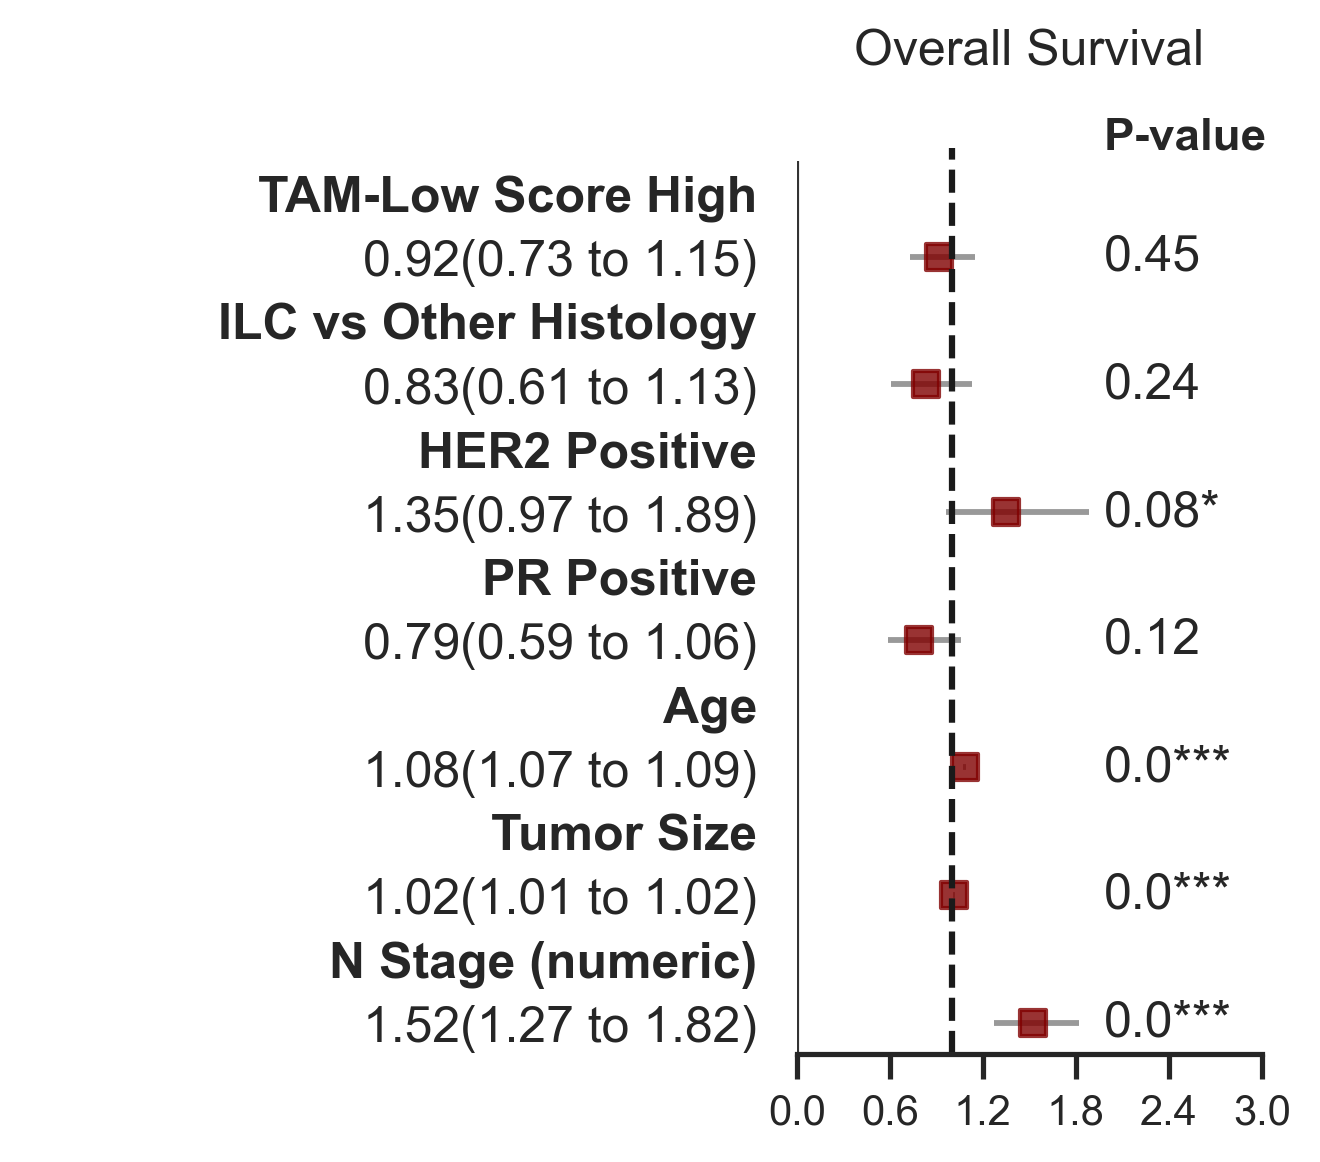

In [68]:
dfp = df[df['outcome']=='OS']
color='maroon'; title='Overall Survival'

ax = fp.forestplot(dfp,  figsize=(2,4),# the dataframe with results data
              estimate="exp(coef)",  # col containing estimated effect size 
              ll="lower .95", hl="upper .95",  # columns containing conf. int. lower and higher limits
              groupvar="label",  # column containing variable label
              varlabel='placeholder',
              pval = 'pval',
              sort=False,  # sort in ascending order (sorts within group if group is specified)               
              color_alt_rows=False,  # Gray alternate rows
              **{"ylabel1_size": 11}, # control size of printed ylabel
              flush=False, 
              fontfamily='Sans Serif', markercolor=color,
                   decimal_precision= 2
              )

ax.axvline(x=1, linestyle='--',color='k')
ax.set_xlim([0,3])
ax.set_title(title, pad=20)

# Clinical Validation

## POETIC Trial

In [3]:
import pyreadr

fpath = '/Users/chelseachen/Library/CloudStorage/OneDrive-UniversityofPittsburgh/01_projects/publicds/database/poetic_zoujian/pairedAI.RData'
result = pyreadr.read_r(fpath) # also works for Rds

result.keys()

odict_keys(['info', 'expr_phen', 'expr_gene'])

In [4]:
meta0 = result['info']
meta1 = result['expr_phen']
gex = result['expr_gene']

In [5]:
meta = pd.merge(meta0, meta1, left_on='# 254 tumours: Control=56, AI-treated=198)', right_on='patient_ID').set_index('sample_ID',drop=True)

meta['response'] = meta['R or noR (Change.Ki67 < -60 AND Baseline.Ki67 >= 5%)']
meta['histology'] = meta['Histo Type']

meta = meta[['patient_ID','histology',
             'treatment',
             'ER status','HER2 status',
             'Baseline.Ki67','Surgery.Ki67','Change.Ki67',
             'response']]

print(Counter(meta['ER status']), Counter(meta['HER2 status']))

meta

Counter({'Positive': 262}) Counter({'Negative': 262})


patient_ID histology treatment ER status HER2 status  \
sample_ID                                                           
GSM2827814   Treated.27    Ductal  Baseline  Positive    Negative   
GSM2827971   Treated.27    Ductal   Surgery  Positive    Negative   
GSM2827815   Treated.28   Lobular  Baseline  Positive    Negative   
GSM2827972   Treated.28   Lobular   Surgery  Positive    Negative   
GSM2827816   Treated.30    Ductal  Baseline  Positive    Negative   
...                 ...       ...       ...       ...         ...   
GSM2828103  Treated.196    Ductal   Surgery  Positive    Negative   
GSM2827947  Treated.197    Ductal  Baseline  Positive    Negative   
GSM2828104  Treated.197    Ductal   Surgery  Positive    Negative   
GSM2827948  Treated.198    Ductal  Baseline  Positive    Negative   
GSM2828105  Treated.198    Ductal   Surgery  Positive    Negative   

            Baseline.Ki67  Surgery.Ki67  Change.Ki67   response  
sample_ID                                                        
GSM2827814       8.117249      0.000000  -100.000000  responder  
GSM2827971       8.117249      0.000000  -100.000000  responder  
GSM2827815      14.459556      0.118483   -99.180587  responder  
GSM2827972      14.459556      0.118483   -99.180587  responder  
GSM2827816      47.796474      1.282051   -97.317687  responder  
...                   ...           ...          ...        ...  
GSM2828103            NaN           NaN          NaN        NaN  
GSM2827947            NaN           NaN          NaN        NaN  
GSM2828104            NaN           NaN          NaN        NaN  
GSM2827948            NaN           NaN          NaN        NaN  
GSM2828105            NaN           NaN          NaN        NaN  

[262 rows x 9 columns]

In [6]:
gex.to_csv('../data/clinical/peotic_gex.csv')
meta.to_csv('../data/clinical/peotic_meta.csv')

### FDR correction

In [7]:
gsva = pd.read_csv('../data/deconv/deconvolute_tams_poetic.csv', index_col=0).T #('../data/gsva/peotic_Macrophages.gmt.ssgsea.csv', index_col=0).T
gsva = gsva[[c for c in gsva.columns if c not in ['M1_modified','M2_modified','M1/M2']]]
gsva

ma_neg_pred   TAM_IFN   TAM_Reg  TAM_Inflam  TAM_Angio    TAM_LA  \
GSM2827814     0.108517  0.108464 -0.090022   -0.065789   0.295032  0.378808   
GSM2827815     0.143497  0.271216  0.105724   -0.009917   0.279513  0.404360   
GSM2827816     0.082061  0.476503  0.173360   -0.020366   0.292718  0.416642   
GSM2827817     0.259257  0.205099  0.171913   -0.040974   0.270382  0.476113   
GSM2827818     0.063248  0.211592  0.050611   -0.068535   0.221840  0.362041   
...                 ...       ...       ...         ...        ...       ...   
GSM2828101     0.270758  0.431255  0.240412    0.159454   0.383657  0.616608   
GSM2828102     0.203302  0.496343  0.318806    0.203071   0.407151  0.582427   
GSM2828103     0.117555  0.601401  0.260531    0.102018   0.337364  0.484603   
GSM2828104     0.087900  0.520802  0.186484    0.017839   0.297543  0.435287   
GSM2828105     0.239975  0.353632  0.161745   -0.045569   0.239355  0.410950   

            TAM_prolif  
GSM2827814    0.196391  
GSM2827815    0.343932  
GSM2827816    0.454508  
GSM2827817    0.156499  
GSM2827818    0.263278  
...                ...  
GSM2828101    0.161833  
GSM2828102    0.311269  
GSM2828103    0.048211  
GSM2828104    0.063995  
GSM2828105    0.206745  

[262 rows x 7 columns]

In [8]:
mg = meta.join(gsva)
mg

patient_ID histology treatment ER status HER2 status  \
sample_ID                                                           
GSM2827814   Treated.27    Ductal  Baseline  Positive    Negative   
GSM2827971   Treated.27    Ductal   Surgery  Positive    Negative   
GSM2827815   Treated.28   Lobular  Baseline  Positive    Negative   
GSM2827972   Treated.28   Lobular   Surgery  Positive    Negative   
GSM2827816   Treated.30    Ductal  Baseline  Positive    Negative   
...                 ...       ...       ...       ...         ...   
GSM2828103  Treated.196    Ductal   Surgery  Positive    Negative   
GSM2827947  Treated.197    Ductal  Baseline  Positive    Negative   
GSM2828104  Treated.197    Ductal   Surgery  Positive    Negative   
GSM2827948  Treated.198    Ductal  Baseline  Positive    Negative   
GSM2828105  Treated.198    Ductal   Surgery  Positive    Negative   

            Baseline.Ki67  Surgery.Ki67  Change.Ki67   response  ma_neg_pred  \
sample_ID                                                                      
GSM2827814       8.117249      0.000000  -100.000000  responder     0.108517   
GSM2827971       8.117249      0.000000  -100.000000  responder     0.101314   
GSM2827815      14.459556      0.118483   -99.180587  responder     0.143497   
GSM2827972      14.459556      0.118483   -99.180587  responder     0.158058   
GSM2827816      47.796474      1.282051   -97.317687  responder     0.082061   
...                   ...           ...          ...        ...          ...   
GSM2828103            NaN           NaN          NaN        NaN     0.117555   
GSM2827947            NaN           NaN          NaN        NaN     0.025563   
GSM2828104            NaN           NaN          NaN        NaN     0.087900   
GSM2827948            NaN           NaN          NaN        NaN     0.193890   
GSM2828105            NaN           NaN          NaN        NaN     0.239975   

             TAM_IFN   TAM_Reg  TAM_Inflam  TAM_Angio    TAM_LA  TAM_prolif  
sample_ID                                                                    
GSM2827814  0.108464 -0.090022   -0.065789   0.295032  0.378808    0.196391  
GSM2827971  0.172799 -0.050768   -0.092162   0.297860  0.417172   -0.064903  
GSM2827815  0.271216  0.105724   -0.009917   0.279513  0.404360    0.343932  
GSM2827972  0.423765  0.212907    0.067804   0.324580  0.459944   -0.082715  
GSM2827816  0.476503  0.173360   -0.020366   0.292718  0.416642    0.454508  
...              ...       ...         ...        ...       ...         ...  
GSM2828103  0.601401  0.260531    0.102018   0.337364  0.484603    0.048211  
GSM2827947  0.569761  0.237743    0.062561   0.332420  0.448383    0.591551  
GSM2828104  0.520802  0.186484    0.017839   0.297543  0.435287    0.063995  
GSM2827948  0.268975  0.085743   -0.114380   0.184970  0.337085    0.482479  
GSM2828105  0.353632  0.161745   -0.045569   0.239355  0.410950    0.206745  

[262 rows x 16 columns]

In [9]:
name_keys = {
    'ma_neg_pred':'TAM-Low Signature',
    'M1_modified':'M1','M2_modified':'M2','M1/M2':'M1/M2 ratio',
    'TAM_IFN':'IFN-TAMs','TAM_Reg':'Reg-TAMs','TAM_Inflam':'Inflam-TAMs',
    'TAM_Angio':'Angio-TAMs','TAM_LA':'LA-TAMs','TAM_prolif':'Prolif-TAMs'
}

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non-responder vs. responder: Mann-Whitney-Wilcoxon test two-sided, P_val:2.493e-01 U_stat=4.589e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non-responder vs. responder: Mann-Whitney-Wilcoxon test two-sided, P_val:2.554e-05 U_stat=6.966e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non-responder vs. responder: Mann-Whitney-Wilcoxon test two-sided, P_val:8.878e-03 U_stat=6.260e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1

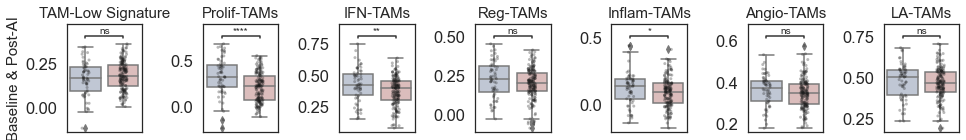

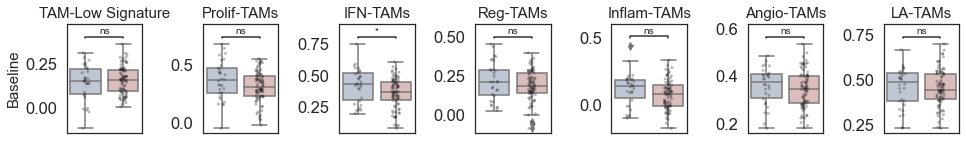

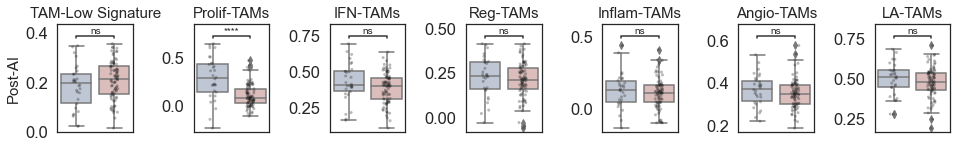

In [10]:
from statannotations.Annotator import Annotator

sns.set(style='white', font_scale=1.5)

for title in ['All','Baseline','Surgery']:
    
    fig, axes = plt.subplots(ncols=7, nrows=1, figsize=(16,2))
    plt.subplots_adjust(wspace=.8, hspace=.3)

    
    dfp = mg.copy() if title=='All' \
    else mg[mg['treatment']=='Baseline'] if title=='Baseline' \
    else mg[mg['treatment']=='Surgery']
    

    group_var = 'response'
    sel_cols = ['ma_neg_pred', 'TAM_prolif', 'TAM_IFN', 'TAM_Reg',
           'TAM_Inflam', 'TAM_Angio', 'TAM_LA']

    dfp[group_var] = pd.Categorical(dfp[group_var], 
                                    categories=['non-responder','responder'],
                                    ordered=True)

    for i, name in enumerate(sel_cols):

        ax = axes.flatten()[i]
        sns.boxplot(data=dfp, x=group_var, y=name,                 
                    palette='vlag',
                    ax=ax)

        sns.stripplot(data=dfp, x=group_var, y=name,                  
                    ax=ax, color='k', size=3, alpha=.3)

        pairs = [('non-responder','responder') ]
        annotator = Annotator(ax, pairs, data=dfp, x=group_var, y=name, 
                              comparisons_correction='fdr_bh')
        annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
        annotator.apply_and_annotate()

        title = 'Baseline & Post-AI' if title=='All' else 'Baseline' if title=='Baseline' else 'Post-AI'
        ylabel = f'{title}' if i==0 else ''
#         ylabel = f'Score' if i==0 else ''
        ax.set_ylabel(ylabel, fontsize=15)#(name, fontsize=15)
        ax.set_xlabel('')
        ax.set_xticklabels('')#(ax.get_xticklabels(), fontsize=15)
        ax.set_title(name_keys[name], fontsize=15)
    
#     plt.suptitle(title)


In [11]:
cols = gsva.columns  # Replace with your columns

df = mg
df_surgery = df[df['treatment'] == 'Surgery'].set_index('patient_ID')[cols]
df_baseline = df[df['treatment'] == 'Baseline'].set_index('patient_ID')[cols]

delta_df = df_surgery - df_baseline
delta_df.reset_index(inplace=True)

delta_df

patient_ID  ma_neg_pred   TAM_IFN   TAM_Reg  TAM_Inflam  TAM_Angio  \
0     Treated.27    -0.007203  0.064335  0.039253   -0.026373   0.002828   
1     Treated.28     0.014561  0.152549  0.107183    0.077721   0.045067   
2     Treated.30     0.155335  0.022799  0.074538    0.273301   0.097693   
3     Treated.31     0.018327  0.136858  0.012001    0.082936   0.017428   
4     Treated.32     0.031926  0.097010  0.041389   -0.011137  -0.005432   
..           ...          ...       ...       ...         ...        ...   
126  Treated.194     0.050110  0.002619  0.061847   -0.067494  -0.028962   
127  Treated.195    -0.011597  0.129393  0.027121    0.060604   0.039136   
128  Treated.196    -0.091880  0.263577  0.080193    0.036367   0.024875   
129  Treated.197     0.062337 -0.048959 -0.051259   -0.044722  -0.034876   
130  Treated.198     0.046085  0.084657  0.076002    0.068811   0.054386   

       TAM_LA  TAM_prolif  
0    0.038364   -0.261294  
1    0.055585   -0.426647  
2    0.157945   -0.388658  
3    0.040537   -0.059624  
4    0.021935   -0.302657  
..        ...         ...  
126  0.031863   -0.116848  
127  0.040878    0.094472  
128 -0.029144   -0.230333  
129 -0.013096   -0.527556  
130  0.073865   -0.275734  

[131 rows x 8 columns]

In [12]:
meta_pt = meta[['patient_ID','histology','response','Change.Ki67']].reset_index(drop=True).drop_duplicates()
meta_pt

patient_ID histology   response  Change.Ki67
0     Treated.27    Ductal  responder  -100.000000
2     Treated.28   Lobular  responder   -99.180587
4     Treated.30    Ductal  responder   -97.317687
6     Treated.31   Lobular  responder   -96.523297
8     Treated.32    Ductal  responder   -96.387305
..           ...       ...        ...          ...
252  Treated.194    Ductal        NaN          NaN
254  Treated.195    Ductal        NaN          NaN
256  Treated.196    Ductal        NaN          NaN
258  Treated.197    Ductal        NaN          NaN
260  Treated.198    Ductal        NaN          NaN

[131 rows x 4 columns]

In [13]:
mg_pt = pd.merge(delta_df, meta_pt, on='patient_ID')
mg_pt

patient_ID  ma_neg_pred   TAM_IFN   TAM_Reg  TAM_Inflam  TAM_Angio  \
0     Treated.27    -0.007203  0.064335  0.039253   -0.026373   0.002828   
1     Treated.28     0.014561  0.152549  0.107183    0.077721   0.045067   
2     Treated.30     0.155335  0.022799  0.074538    0.273301   0.097693   
3     Treated.31     0.018327  0.136858  0.012001    0.082936   0.017428   
4     Treated.32     0.031926  0.097010  0.041389   -0.011137  -0.005432   
..           ...          ...       ...       ...         ...        ...   
126  Treated.194     0.050110  0.002619  0.061847   -0.067494  -0.028962   
127  Treated.195    -0.011597  0.129393  0.027121    0.060604   0.039136   
128  Treated.196    -0.091880  0.263577  0.080193    0.036367   0.024875   
129  Treated.197     0.062337 -0.048959 -0.051259   -0.044722  -0.034876   
130  Treated.198     0.046085  0.084657  0.076002    0.068811   0.054386   

       TAM_LA  TAM_prolif histology   response  Change.Ki67  
0    0.038364   -0.261294    Ductal  responder  -100.000000  
1    0.055585   -0.426647   Lobular  responder   -99.180587  
2    0.157945   -0.388658    Ductal  responder   -97.317687  
3    0.040537   -0.059624   Lobular  responder   -96.523297  
4    0.021935   -0.302657    Ductal  responder   -96.387305  
..        ...         ...       ...        ...          ...  
126  0.031863   -0.116848    Ductal        NaN          NaN  
127  0.040878    0.094472    Ductal        NaN          NaN  
128 -0.029144   -0.230333    Ductal        NaN          NaN  
129 -0.013096   -0.527556    Ductal        NaN          NaN  
130  0.073865   -0.275734    Ductal        NaN          NaN  

[131 rows x 11 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non-responder vs. responder: Mann-Whitney-Wilcoxon test two-sided, P_val:3.314e-01 U_stat=1.122e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non-responder vs. responder: Mann-Whitney-Wilcoxon test two-sided, P_val:1.528e-04 U_stat=1.870e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non-responder vs. responder: Mann-Whitney-Wilcoxon test two-sided, P_val:1.660e-01 U_stat=1.057e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1

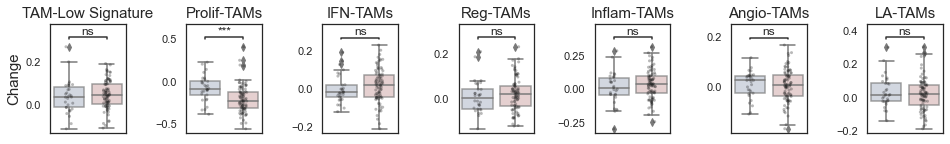

In [17]:
from statannotations.Annotator import Annotator

sns.set(style='white', font_scale=1)
fig, axes = plt.subplots(ncols=7, nrows=1, figsize=(16,2))
plt.subplots_adjust(wspace=.8, hspace=.3)

dfp = mg_pt
group_var = 'response'
sel_cols = ['ma_neg_pred', 'TAM_prolif', 'TAM_IFN', 'TAM_Reg',
           'TAM_Inflam', 'TAM_Angio', 'TAM_LA']


dfp[group_var] = pd.Categorical(dfp[group_var], 
                                categories=['non-responder','responder'],
                                ordered=True)

for i, name in enumerate(sel_cols):
    
    ax = axes.flatten()[i]
    sns.boxplot(data=dfp, x=group_var, y=name,                 
                boxprops=dict(alpha=.7),palette='vlag',
                ax=ax)
    
    sns.stripplot(data=dfp, x=group_var, y=name,                  
                ax=ax, color='k', size=3, alpha=.3)
    
    pairs = [('non-responder','responder') ]
    annotator = Annotator(ax, pairs, data=dfp, x=group_var, y=name, 
                          comparisons_correction='fdr_bh')
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
    annotator.apply_and_annotate()
    
    ylabel = 'Change' if i==0 else ''
    ax.set_ylabel(ylabel, fontsize=15)#(name, fontsize=15)
    ax.set_xlabel('')
    ax.set_xticklabels('')#(ax.get_xticklabels(), fontsize=15)
    ax.set_title(name_keys[name], fontsize=15)
    

### Not corrected

In [3]:
meta = pd.read_csv('../data/clinical/peotic_meta.csv', index_col=0)
meta.head(3)

patient_ID histology treatment ER status HER2 status  \
sample_ID                                                          
GSM2827814  Treated.27    Ductal  Baseline  Positive    Negative   
GSM2827971  Treated.27    Ductal   Surgery  Positive    Negative   
GSM2827815  Treated.28   Lobular  Baseline  Positive    Negative   

            Baseline.Ki67  Surgery.Ki67  Change.Ki67   response  
sample_ID                                                        
GSM2827814       8.117249      0.000000  -100.000000  responder  
GSM2827971       8.117249      0.000000  -100.000000  responder  
GSM2827815      14.459556      0.118483   -99.180587  responder

In [4]:
gsva = pd.read_csv('../data/deconv/deconvolute_tams_poetic.csv', index_col=0).T #('../data/gsva/peotic_Macrophages.gmt.ssgsea.csv', index_col=0).T
gsva = gsva[[c for c in gsva.columns if c not in ['M1_modified','M2_modified','M1/M2']]]
gsva

ma_neg_pred   TAM_IFN   TAM_Reg  TAM_Inflam  TAM_Angio    TAM_LA  \
GSM2827814     0.108517  0.108464 -0.090022   -0.065789   0.295032  0.378808   
GSM2827815     0.143497  0.271216  0.105724   -0.009917   0.279513  0.404360   
GSM2827816     0.082061  0.476503  0.173360   -0.020366   0.292718  0.416642   
GSM2827817     0.259257  0.205099  0.171913   -0.040974   0.270382  0.476113   
GSM2827818     0.063248  0.211592  0.050611   -0.068535   0.221840  0.362041   
...                 ...       ...       ...         ...        ...       ...   
GSM2828101     0.270758  0.431255  0.240412    0.159454   0.383657  0.616608   
GSM2828102     0.203302  0.496343  0.318806    0.203071   0.407151  0.582427   
GSM2828103     0.117555  0.601401  0.260531    0.102018   0.337364  0.484603   
GSM2828104     0.087900  0.520802  0.186484    0.017839   0.297543  0.435287   
GSM2828105     0.239975  0.353632  0.161745   -0.045569   0.239355  0.410950   

            TAM_prolif  
GSM2827814    0.196391  
GSM2827815    0.343932  
GSM2827816    0.454508  
GSM2827817    0.156499  
GSM2827818    0.263278  
...                ...  
GSM2828101    0.161833  
GSM2828102    0.311269  
GSM2828103    0.048211  
GSM2828104    0.063995  
GSM2828105    0.206745  

[262 rows x 7 columns]

In [5]:
mg = meta.join(gsva)
mg

patient_ID histology treatment ER status HER2 status  \
sample_ID                                                           
GSM2827814   Treated.27    Ductal  Baseline  Positive    Negative   
GSM2827971   Treated.27    Ductal   Surgery  Positive    Negative   
GSM2827815   Treated.28   Lobular  Baseline  Positive    Negative   
GSM2827972   Treated.28   Lobular   Surgery  Positive    Negative   
GSM2827816   Treated.30    Ductal  Baseline  Positive    Negative   
...                 ...       ...       ...       ...         ...   
GSM2828103  Treated.196    Ductal   Surgery  Positive    Negative   
GSM2827947  Treated.197    Ductal  Baseline  Positive    Negative   
GSM2828104  Treated.197    Ductal   Surgery  Positive    Negative   
GSM2827948  Treated.198    Ductal  Baseline  Positive    Negative   
GSM2828105  Treated.198    Ductal   Surgery  Positive    Negative   

            Baseline.Ki67  Surgery.Ki67  Change.Ki67   response  ma_neg_pred  \
sample_ID                                                                      
GSM2827814       8.117249      0.000000  -100.000000  responder     0.108517   
GSM2827971       8.117249      0.000000  -100.000000  responder     0.101314   
GSM2827815      14.459556      0.118483   -99.180587  responder     0.143497   
GSM2827972      14.459556      0.118483   -99.180587  responder     0.158058   
GSM2827816      47.796474      1.282051   -97.317687  responder     0.082061   
...                   ...           ...          ...        ...          ...   
GSM2828103            NaN           NaN          NaN        NaN     0.117555   
GSM2827947            NaN           NaN          NaN        NaN     0.025563   
GSM2828104            NaN           NaN          NaN        NaN     0.087900   
GSM2827948            NaN           NaN          NaN        NaN     0.193890   
GSM2828105            NaN           NaN          NaN        NaN     0.239975   

             TAM_IFN   TAM_Reg  TAM_Inflam  TAM_Angio    TAM_LA  TAM_prolif  
sample_ID                                                                    
GSM2827814  0.108464 -0.090022   -0.065789   0.295032  0.378808    0.196391  
GSM2827971  0.172799 -0.050768   -0.092162   0.297860  0.417172   -0.064903  
GSM2827815  0.271216  0.105724   -0.009917   0.279513  0.404360    0.343932  
GSM2827972  0.423765  0.212907    0.067804   0.324580  0.459944   -0.082715  
GSM2827816  0.476503  0.173360   -0.020366   0.292718  0.416642    0.454508  
...              ...       ...         ...        ...       ...         ...  
GSM2828103  0.601401  0.260531    0.102018   0.337364  0.484603    0.048211  
GSM2827947  0.569761  0.237743    0.062561   0.332420  0.448383    0.591551  
GSM2828104  0.520802  0.186484    0.017839   0.297543  0.435287    0.063995  
GSM2827948  0.268975  0.085743   -0.114380   0.184970  0.337085    0.482479  
GSM2828105  0.353632  0.161745   -0.045569   0.239355  0.410950    0.206745  

[262 rows x 16 columns]

In [6]:
name_keys = {
    'ma_neg_pred':'TAM-Low Signature',
    'M1_modified':'M1','M2_modified':'M2','M1/M2':'M1/M2 ratio',
    'TAM_IFN':'IFN-TAMs','TAM_Reg':'Reg-TAMs','TAM_Inflam':'Inflam-TAMs',
    'TAM_Angio':'Angio-TAMs','TAM_LA':'LA-TAMs','TAM_prolif':'Prolif-TAMs'
}

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non-responder vs. responder: Mann-Whitney-Wilcoxon test two-sided, P_val:2.493e-01 U_stat=4.589e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non-responder vs. responder: Mann-Whitney-Wilcoxon test two-sided, P_val:2.554e-05 U_stat=6.966e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non-responder vs. responder: Mann-Whitney-Wilcoxon test two-sided, P_val:8.878e-03 U_stat=6.260e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1

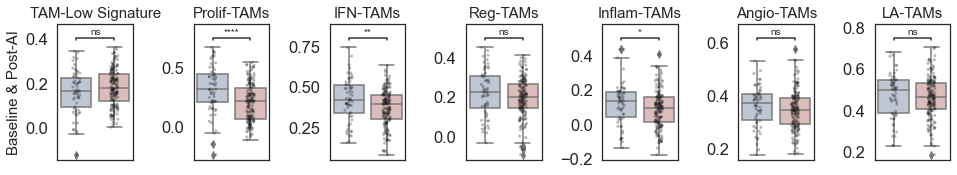

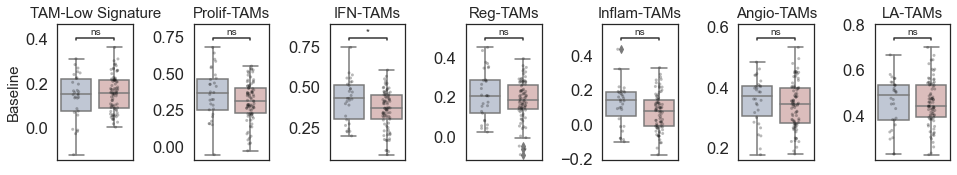

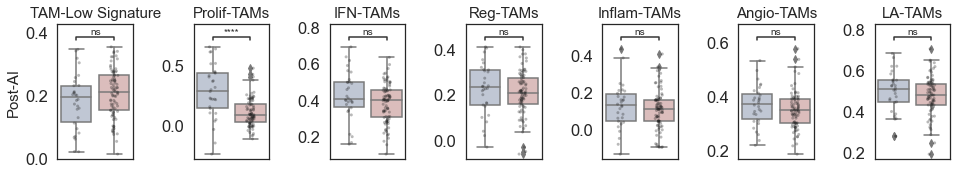

In [9]:
from statannotations.Annotator import Annotator

sns.set(style='white', font_scale=1.5)

for title in ['All','Baseline','Surgery']:
    
    fig, axes = plt.subplots(ncols=7, nrows=1, figsize=(16,2.5))
    plt.subplots_adjust(wspace=.8, hspace=.3)

    
    dfp = mg.copy() if title=='All' \
    else mg[mg['treatment']=='Baseline'] if title=='Baseline' \
    else mg[mg['treatment']=='Surgery']
    

    group_var = 'response'
    sel_cols = ['ma_neg_pred', 'TAM_prolif', 'TAM_IFN', 'TAM_Reg',
           'TAM_Inflam', 'TAM_Angio', 'TAM_LA']

    dfp[group_var] = pd.Categorical(dfp[group_var], 
                                    categories=['non-responder','responder'],
                                    ordered=True)

    for i, name in enumerate(sel_cols):

        ax = axes.flatten()[i]
        sns.boxplot(data=dfp, x=group_var, y=name,                 
                    palette='vlag',
                    ax=ax)

        sns.stripplot(data=dfp, x=group_var, y=name,                  
                    ax=ax, color='k', size=3, alpha=.3)

        pairs = [('non-responder','responder') ]
        annotator = Annotator(ax, pairs, data=dfp, x=group_var, y=name, 
                              comparisons_correction=None)
        annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
        annotator.apply_and_annotate()

        title = 'Baseline & Post-AI' if title=='All' else 'Baseline' if title=='Baseline' else 'Post-AI'
        ylabel = f'{title}' if i==0 else ''
#         ylabel = f'Score' if i==0 else ''
        ax.set_ylabel(ylabel, fontsize=15)#(name, fontsize=15)
        ax.set_xlabel('')
        ax.set_xticklabels('')#(ax.get_xticklabels(), fontsize=15)
        ax.set_title(name_keys[name], fontsize=15)
    
#     plt.suptitle(title)


In [10]:
cols = gsva.columns  # Replace with your columns

df = mg
df_surgery = df[df['treatment'] == 'Surgery'].set_index('patient_ID')[cols]
df_baseline = df[df['treatment'] == 'Baseline'].set_index('patient_ID')[cols]

delta_df = df_surgery - df_baseline
delta_df.reset_index(inplace=True)

delta_df

patient_ID  ma_neg_pred   TAM_IFN   TAM_Reg  TAM_Inflam  TAM_Angio  \
0     Treated.27    -0.007203  0.064335  0.039253   -0.026373   0.002828   
1     Treated.28     0.014561  0.152549  0.107183    0.077721   0.045067   
2     Treated.30     0.155335  0.022799  0.074538    0.273301   0.097693   
3     Treated.31     0.018327  0.136858  0.012001    0.082936   0.017428   
4     Treated.32     0.031926  0.097010  0.041389   -0.011137  -0.005432   
..           ...          ...       ...       ...         ...        ...   
126  Treated.194     0.050110  0.002619  0.061847   -0.067494  -0.028962   
127  Treated.195    -0.011597  0.129393  0.027121    0.060604   0.039136   
128  Treated.196    -0.091880  0.263577  0.080193    0.036367   0.024875   
129  Treated.197     0.062337 -0.048959 -0.051259   -0.044722  -0.034876   
130  Treated.198     0.046085  0.084657  0.076002    0.068811   0.054386   

       TAM_LA  TAM_prolif  
0    0.038364   -0.261294  
1    0.055585   -0.426647  
2    0.157945   -0.388658  
3    0.040537   -0.059624  
4    0.021935   -0.302657  
..        ...         ...  
126  0.031863   -0.116848  
127  0.040878    0.094472  
128 -0.029144   -0.230333  
129 -0.013096   -0.527556  
130  0.073865   -0.275734  

[131 rows x 8 columns]

In [11]:
meta_pt = meta[['patient_ID','histology','response','Change.Ki67']].reset_index(drop=True).drop_duplicates()
meta_pt

patient_ID histology   response  Change.Ki67
0     Treated.27    Ductal  responder  -100.000000
2     Treated.28   Lobular  responder   -99.180587
4     Treated.30    Ductal  responder   -97.317687
6     Treated.31   Lobular  responder   -96.523297
8     Treated.32    Ductal  responder   -96.387305
..           ...       ...        ...          ...
252  Treated.194    Ductal        NaN          NaN
254  Treated.195    Ductal        NaN          NaN
256  Treated.196    Ductal        NaN          NaN
258  Treated.197    Ductal        NaN          NaN
260  Treated.198    Ductal        NaN          NaN

[131 rows x 4 columns]

In [12]:
mg_pt = pd.merge(delta_df, meta_pt, on='patient_ID')
mg_pt

patient_ID  ma_neg_pred   TAM_IFN   TAM_Reg  TAM_Inflam  TAM_Angio  \
0     Treated.27    -0.007203  0.064335  0.039253   -0.026373   0.002828   
1     Treated.28     0.014561  0.152549  0.107183    0.077721   0.045067   
2     Treated.30     0.155335  0.022799  0.074538    0.273301   0.097693   
3     Treated.31     0.018327  0.136858  0.012001    0.082936   0.017428   
4     Treated.32     0.031926  0.097010  0.041389   -0.011137  -0.005432   
..           ...          ...       ...       ...         ...        ...   
126  Treated.194     0.050110  0.002619  0.061847   -0.067494  -0.028962   
127  Treated.195    -0.011597  0.129393  0.027121    0.060604   0.039136   
128  Treated.196    -0.091880  0.263577  0.080193    0.036367   0.024875   
129  Treated.197     0.062337 -0.048959 -0.051259   -0.044722  -0.034876   
130  Treated.198     0.046085  0.084657  0.076002    0.068811   0.054386   

       TAM_LA  TAM_prolif histology   response  Change.Ki67  
0    0.038364   -0.261294    Ductal  responder  -100.000000  
1    0.055585   -0.426647   Lobular  responder   -99.180587  
2    0.157945   -0.388658    Ductal  responder   -97.317687  
3    0.040537   -0.059624   Lobular  responder   -96.523297  
4    0.021935   -0.302657    Ductal  responder   -96.387305  
..        ...         ...       ...        ...          ...  
126  0.031863   -0.116848    Ductal        NaN          NaN  
127  0.040878    0.094472    Ductal        NaN          NaN  
128 -0.029144   -0.230333    Ductal        NaN          NaN  
129 -0.013096   -0.527556    Ductal        NaN          NaN  
130  0.073865   -0.275734    Ductal        NaN          NaN  

[131 rows x 11 columns]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non-responder vs. responder: Mann-Whitney-Wilcoxon test two-sided, P_val:3.314e-01 U_stat=1.122e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non-responder vs. responder: Mann-Whitney-Wilcoxon test two-sided, P_val:1.528e-04 U_stat=1.870e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

non-responder vs. responder: Mann-Whitney-Wilcoxon test two-sided, P_val:1.660e-01 U_stat=1.057e+03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1

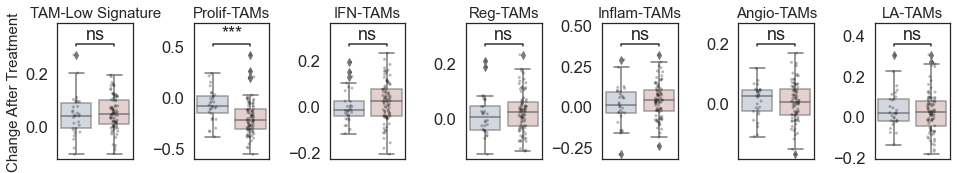

In [13]:
from statannotations.Annotator import Annotator

sns.set(style='white', font_scale=1.5)
fig, axes = plt.subplots(ncols=7, nrows=1, figsize=(16,2.5))
plt.subplots_adjust(wspace=.8, hspace=.3)

dfp = mg_pt
group_var = 'response'
sel_cols = ['ma_neg_pred', 'TAM_prolif', 'TAM_IFN', 'TAM_Reg',
           'TAM_Inflam', 'TAM_Angio', 'TAM_LA']


dfp[group_var] = pd.Categorical(dfp[group_var], 
                                categories=['non-responder','responder'],
                                ordered=True)

for i, name in enumerate(sel_cols):
    
    ax = axes.flatten()[i]
    sns.boxplot(data=dfp, x=group_var, y=name,                 
                boxprops=dict(alpha=.7),palette='vlag',
                ax=ax)
    
    sns.stripplot(data=dfp, x=group_var, y=name,                  
                ax=ax, color='k', size=3, alpha=.3)
    
    pairs = [('non-responder','responder') ]
    annotator = Annotator(ax, pairs, data=dfp, x=group_var, y=name, 
                          comparisons_correction=None)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
    annotator.apply_and_annotate()
    
    ylabel = 'Change After Treatment' if i==0 else ''
    ax.set_ylabel(ylabel, fontsize=15)#(name, fontsize=15)
    ax.set_xlabel('')
    ax.set_xticklabels('')#(ax.get_xticklabels(), fontsize=15)
    ax.set_title(name_keys[name], fontsize=15)
    

# Export

In [54]:
! rm ../images/Figure2_3/*
! junix -f "Fig2-3. Immune Pred.ipynb" -o ../images/Figure2_3